In [1]:
require(openxlsx)
require(data.table)
require(ggplot2)
require(GGally)
require(fable)
require(lubridate)
require(forecast)
require(skimr)
require(repr)
require(MLmetrics)
require(rpart)
require(rattle)
require(ggcorrplot)
require(dplyr)
require(tibble)
require(ggridges)
options(repr.plot.width=12, repr.plot.height=8)



Zorunlu paket yükleniyor: openxlsx

Zorunlu paket yükleniyor: data.table

Zorunlu paket yükleniyor: ggplot2

Zorunlu paket yükleniyor: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Zorunlu paket yükleniyor: fable

Zorunlu paket yükleniyor: fabletools

Zorunlu paket yükleniyor: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Zorunlu paket yükleniyor: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Zorunlu paket yükleniyor: skimr

Zorunlu paket yükleniyor: repr

Zorunlu paket yükleniyor: MLmetrics


Attaching package: 'MLmetrics'


The following objects are masked from 'package:fabletools':

    MAE, MAPE, MSE, RMSE


The following object is masked from

In [2]:
data_path <- 'output1.xlsx'
dt <- as.data.table(read.xlsx(data_path))
dt[, date := as.Date(date, origin = "1899-12-30")]
dt <- na.omit(dt)

In [3]:
#reporting accuracy
accu=function(actual,forecast){
  n=length(actual)
  error=actual-forecast
  mean=mean(actual)
  sd=sd(actual)
  CV=sd/mean
  FBias=sum(error)/sum(actual)
  MAPE=sum(abs(error/actual))/n
  RMSE=sqrt(sum(error^2)/n)
  MAD=sum(abs(error))/n
  MADP=sum(abs(error))/sum(abs(actual))
  WMAPE=MAD/mean
  l=data.frame(n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE)
  return(l)
}

## MODEL 1

# LINEER REGRESSION

## Hours 8, 9, 10, 11, 12, 13, 14, 15

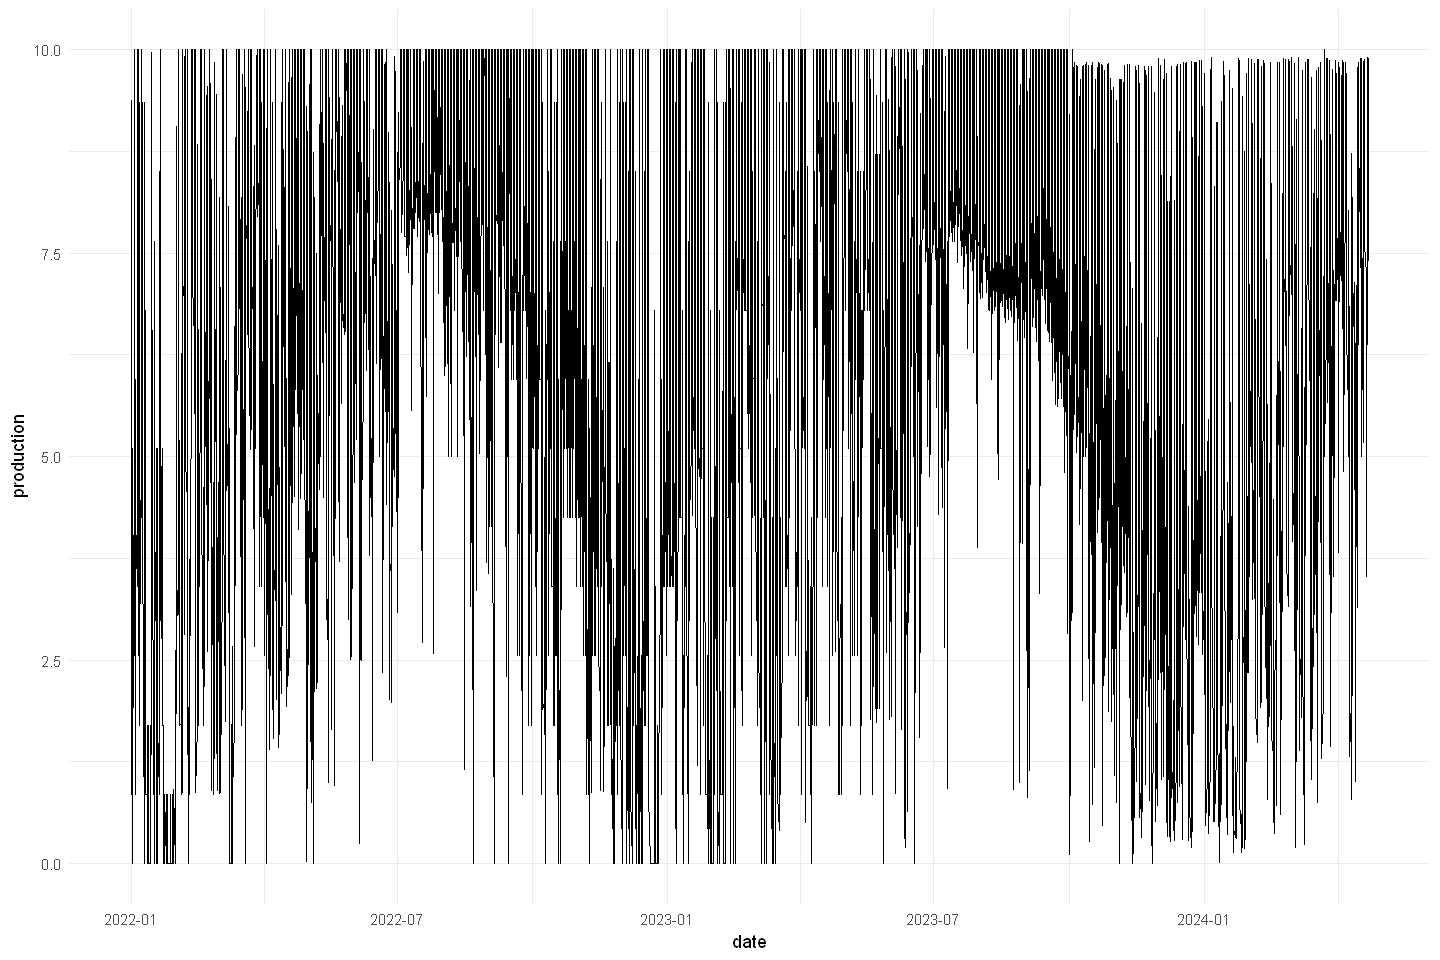

In [4]:
# Filter data
filtered_dt <- dt[hour>=8 & hour<=15]

filtered_dt[production > 10, production := 10]

# Visualize production over time
ggplot(filtered_dt, aes(x = date, y = production)) + 
  geom_line() + 
  theme_minimal()

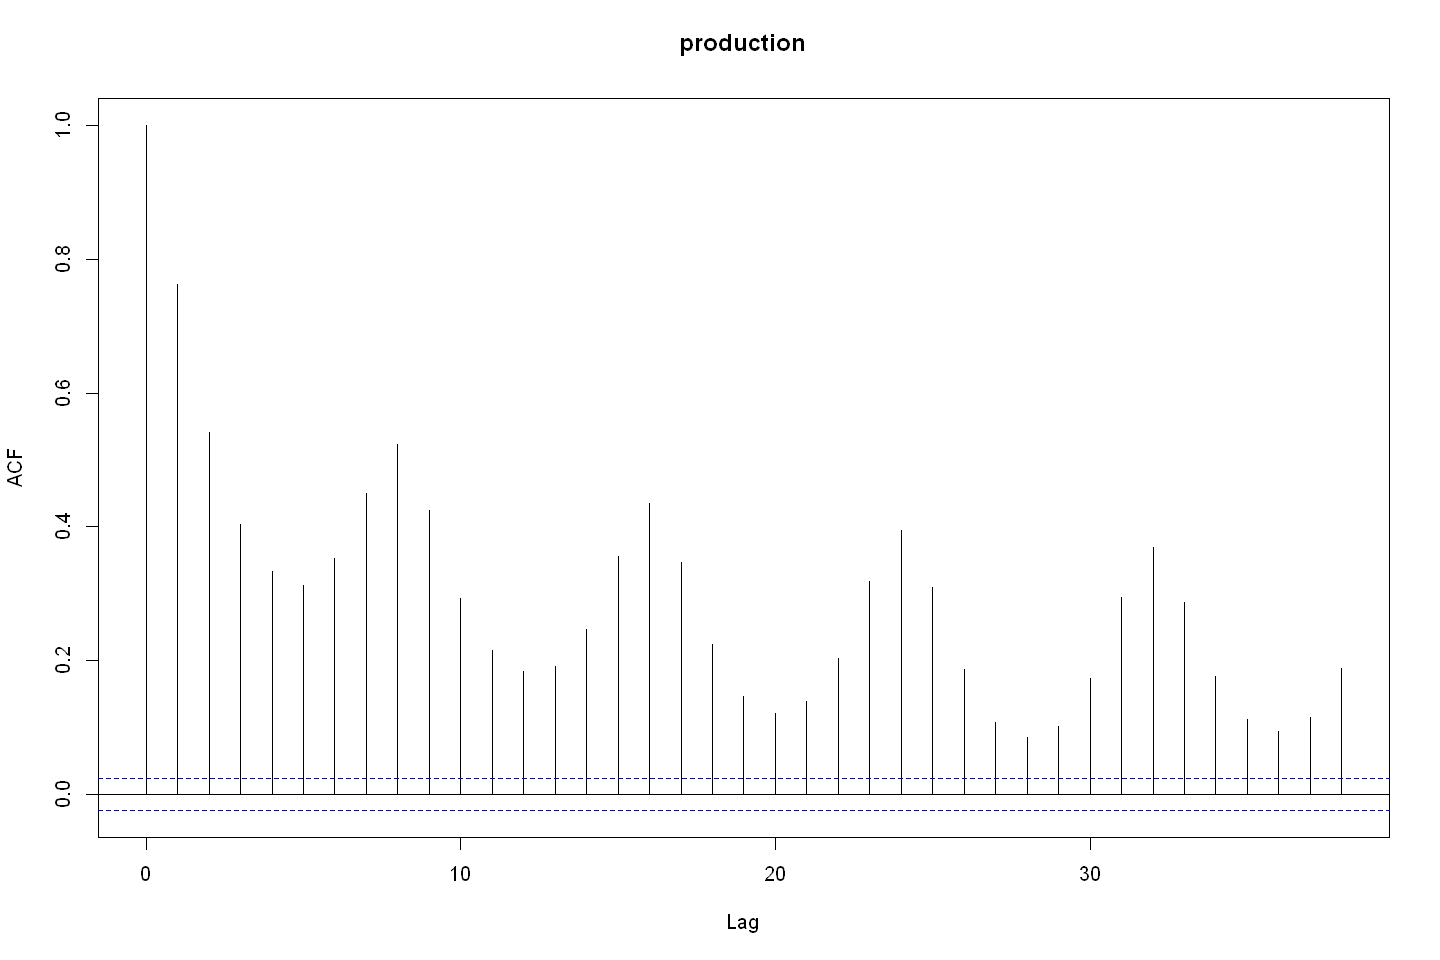

In [5]:
acf(filtered_dt[,'production'])

In [6]:
lr_model <- lm(production ~ . -production -date -hour, data = filtered_dt)
summary(lr_model)


Call:
lm(formula = production ~ . - production - date - hour, data = filtered_dt)

Residuals:
   Min     1Q Median     3Q    Max 
-8.754 -1.170  0.280  1.377  7.287 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -3.703e+01  2.401e+00 -15.424  < 2e-16 ***
CSNOW_surface_37.75_34.5             7.577e-01  2.603e-01   2.911 0.003620 ** 
CSNOW_surface_37.75_34.75           -1.126e-01  2.107e-01  -0.534 0.593067    
CSNOW_surface_37.75_35.0             1.527e-01  1.780e-01   0.858 0.391059    
CSNOW_surface_37.75_35.25           -4.023e-02  1.544e-01  -0.261 0.794451    
CSNOW_surface_37.75_35.5            -1.336e-02  2.235e-01  -0.060 0.952345    
CSNOW_surface_38.0_34.5             -4.439e-01  2.022e-01  -2.196 0.028134 *  
CSNOW_surface_38.0_34.75            -5.363e-02  2.352e-01  -0.228 0.819637    
CSNOW_surface_38.0_35.0              1.268e-01  2.037e-01   0.622 0.533818    
CSNOW_surface_38.0_35.25    

In [7]:
#checkresiduals(lr_model)

In [8]:
filtered_dt[, categorical_hour := as.factor(hour)]

lr_model_with_hour <- lm(production ~ . -production -date -hour, data = filtered_dt)
summary(lr_model_with_hour)


Call:
lm(formula = production ~ . - production - date - hour, data = filtered_dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1860 -0.9837  0.1836  1.1839  7.1170 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -2.101e+01  2.406e+00  -8.735  < 2e-16 ***
CSNOW_surface_37.75_34.5             8.307e-01  2.375e-01   3.497 0.000473 ***
CSNOW_surface_37.75_34.75           -4.990e-02  1.924e-01  -0.259 0.795354    
CSNOW_surface_37.75_35.0             2.110e-01  1.624e-01   1.299 0.193884    
CSNOW_surface_37.75_35.25            5.312e-02  1.410e-01   0.377 0.706275    
CSNOW_surface_37.75_35.5             6.616e-02  2.040e-01   0.324 0.745721    
CSNOW_surface_38.0_34.5             -4.945e-01  1.844e-01  -2.681 0.007352 ** 
CSNOW_surface_38.0_34.75            -1.697e-02  2.146e-01  -0.079 0.936960    
CSNOW_surface_38.0_35.0              2.803e-02  1.859e-01   0.151 0.880166    
CSNOW_surface_38.0

In [9]:
#checkresiduals(lr_model_with_hour)

In [10]:
filtered_dt[, categorical_month := as.character(month(date, label = TRUE))]
lr_model_with_hour_month <- lm(production ~ . -production -date -hour, data = filtered_dt)
summary(lr_model_with_hour_month)


Call:
lm(formula = production ~ . - production - date - hour, data = filtered_dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9901 -0.9427  0.1776  1.1490  7.3079 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -2.060e+01  3.327e+00  -6.192 6.29e-10 ***
CSNOW_surface_37.75_34.5             7.877e-01  2.346e-01   3.358 0.000790 ***
CSNOW_surface_37.75_34.75           -7.939e-02  1.901e-01  -0.418 0.676300    
CSNOW_surface_37.75_35.0             1.755e-01  1.603e-01   1.095 0.273727    
CSNOW_surface_37.75_35.25           -4.820e-02  1.400e-01  -0.344 0.730587    
CSNOW_surface_37.75_35.5             9.600e-02  2.024e-01   0.474 0.635286    
CSNOW_surface_38.0_34.5             -5.125e-01  1.822e-01  -2.812 0.004933 ** 
CSNOW_surface_38.0_34.75            -3.905e-02  2.117e-01  -0.184 0.853681    
CSNOW_surface_38.0_35.0             -5.766e-02  1.835e-01  -0.314 0.753375    
CSNOW_surface_38.0

In [11]:
#checkresiduals(lr_model_with_hour_month)

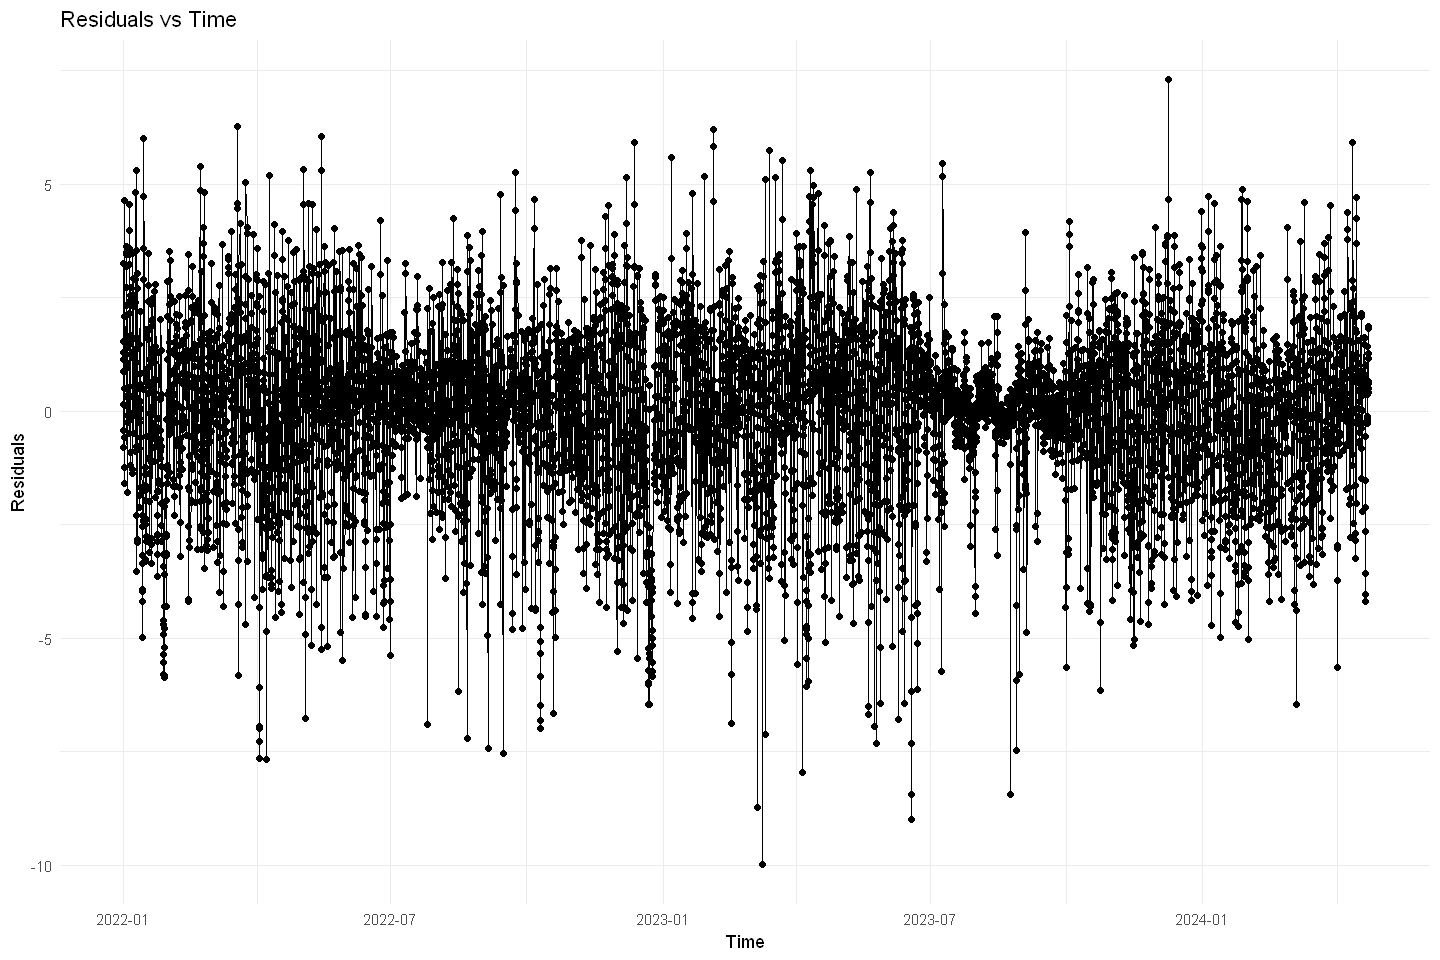

In [12]:
filtered_dt$residuals <- residuals(lr_model_with_hour_month)
ggplot(filtered_dt, aes(x = date, y = residuals)) +
  geom_point() +
  geom_line() +
  labs(title = "Residuals vs Time", x = "Time", y = "Residuals") +
  theme_minimal()

In [13]:
AIC(lr_model_with_hour_month)
sum(abs(residuals(lr_model_with_hour_month)))/length(residuals(lr_model_with_hour_month))

[1] 28227.05

[1] 1.410495

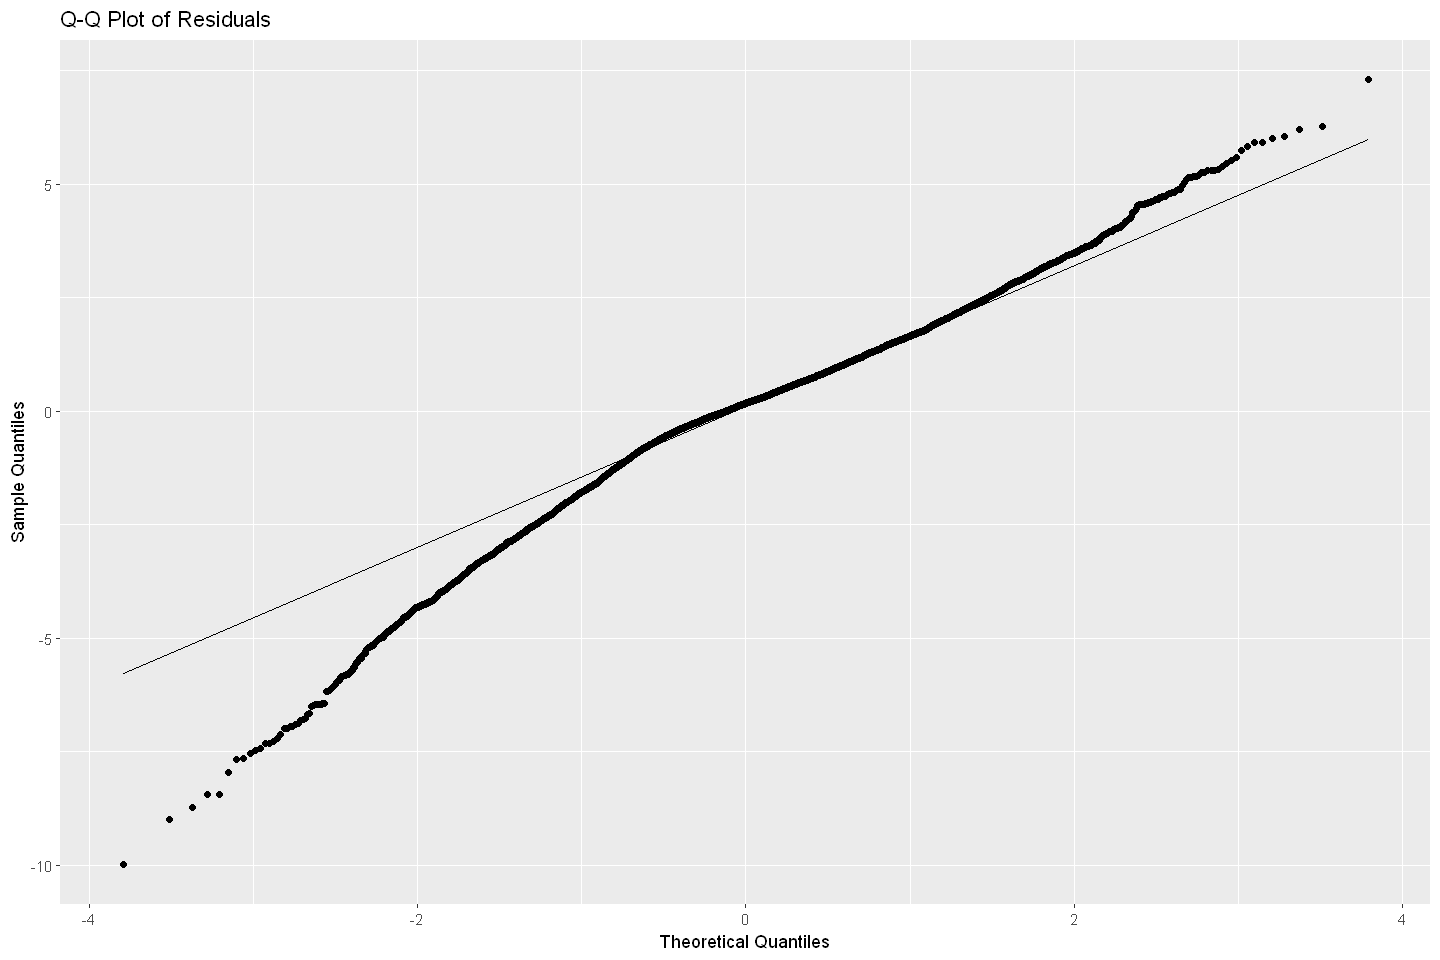

In [14]:
# Get the actual vs predicted values
actual_values <- filtered_dt$production
predicted_values <- predict(lr_model_with_hour_month)

# Calculate residuals
residuals <- actual_values - predicted_values

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

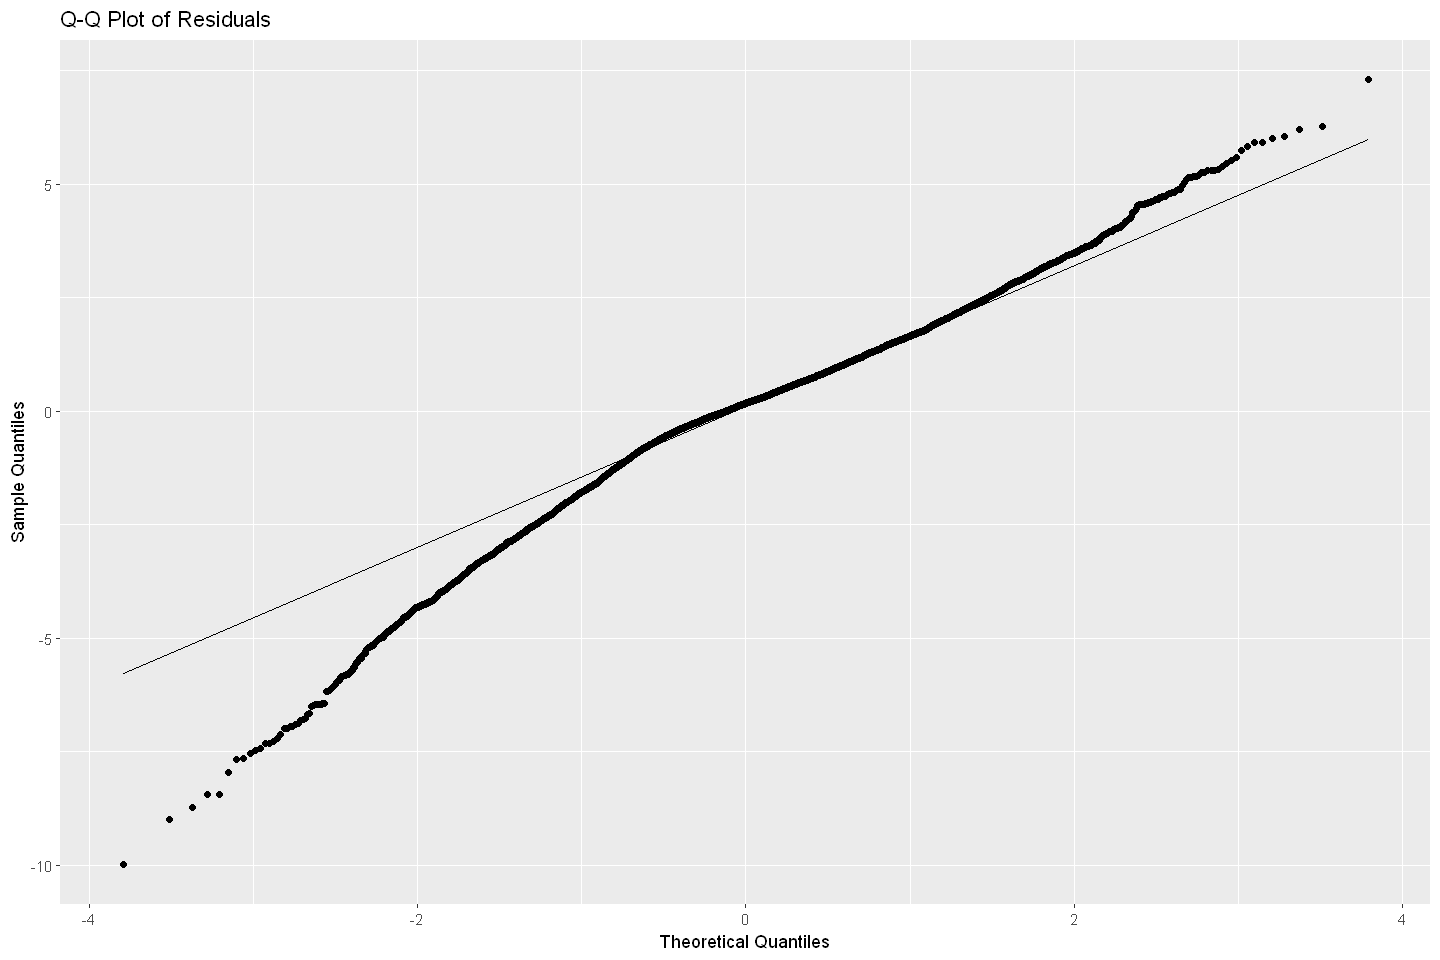

In [15]:
# Get the actual vs predicted values
actual_values <- filtered_dt$production
predicted_values <- predict(lr_model_with_hour_month)

# Calculate residuals
residuals <- actual_values - predicted_values

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

In [16]:
data <- filtered_dt %>% na.omit()

# Define the start and end dates for the test set
train_start = as.Date('2022-01-01')
test_start = as.Date('2023-11-01')
test_end = as.Date('2024-05-12')

# Filter the data for the test dates
test_dates <- filtered_dt %>%
  filter(date >= test_start & date <= test_end) %>%
  pull(date)


In [17]:

test_dates <- unique(test_dates)

# Create a tibble with all combinations of test dates and hours
all_results <- expand.grid(date = test_dates, hour = 8:15) %>% as_tibble()

# Add the actual production values for the corresponding date and hour
all_results <- all_results %>%
  left_join(filtered_dt, by = c("date", "hour")) %>%
  rename(actual = production)


all_results <- all_results %>%
  select(date, hour, actual) %>%
  distinct()

In [18]:

test_dates <- unique(test_dates)

# Create a tibble with all combinations of test dates and hours
all_results <- expand.grid(date = test_dates, hour = 8:15) %>% as_tibble()

# Add the actual production values for the corresponding date and hour
all_results <- all_results %>%
  left_join(filtered_dt, by = c("date", "hour")) %>%
  rename(actual = production)


all_results <- all_results %>%
  select(date, hour, actual) %>%
  distinct()

forecast_ahead <- 1

results <- data.frame()
preds <- c()

i = 1
for (i in 1:length(test_dates)){
    for (j in 8:15){
        current_date <- test_dates[i] + (-forecast_ahead)
        train_data <- data %>% filter(date <= current_date)
        test_data <- data %>% filter(date == test_dates[i] & hour==j)
        model <- lm(production ~ . -production -date -hour, data = train_data)
        pred <- model %>% predict(test_data)
        preds <- c(preds,pred)
        result <- cbind(
            date=test_dates[i],
            actual=test_data$production,
            pred=pred
        )
        results <- rbind(results,result)
}}
results <- results %>% tibble()
all_results <- all_results %>% mutate(M1 = preds)
performance <- cbind(model="M1",accu(results$actual,results$production))

all_results %>% head()
performance

## Hours 4, 5

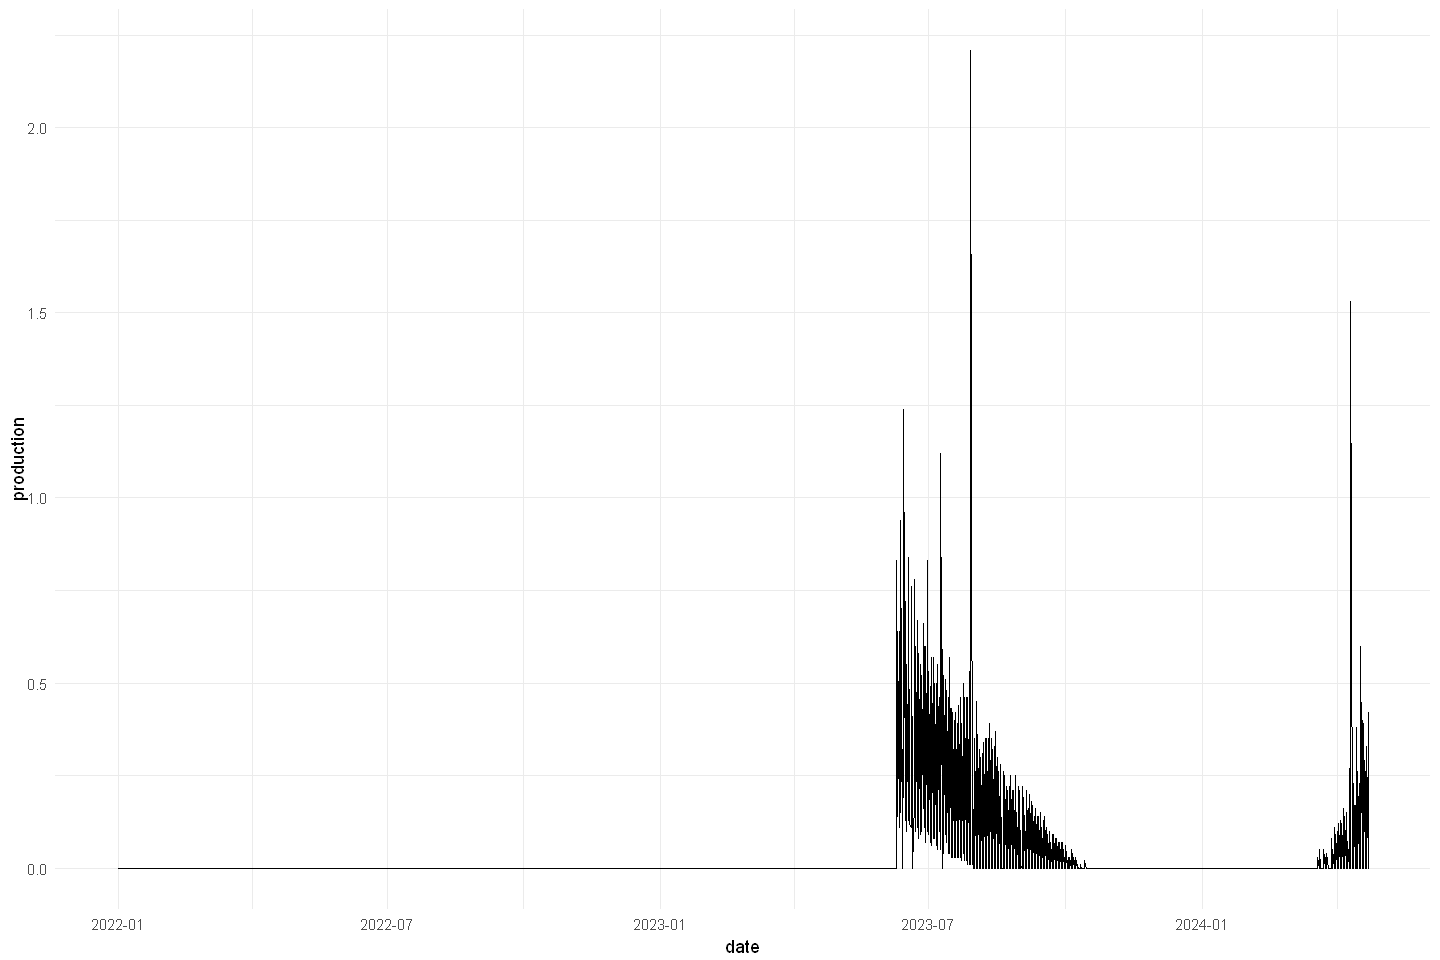

In [19]:
# Filter data
filtered_dt2 <- dt[hour >= 4 & hour <= 5]

# Visualize production over time
ggplot(filtered_dt2, aes(x = date, y = production)) + 
  geom_line() + 
  theme_minimal()

In [20]:
# Find the first nonzero observation in the 'production' column
first_nonzero_index <- which(filtered_dt2$production != 0)[1]

# Truncate the data table from the first nonzero observation onwards
truncated_dt <- filtered_dt2[first_nonzero_index:.N]

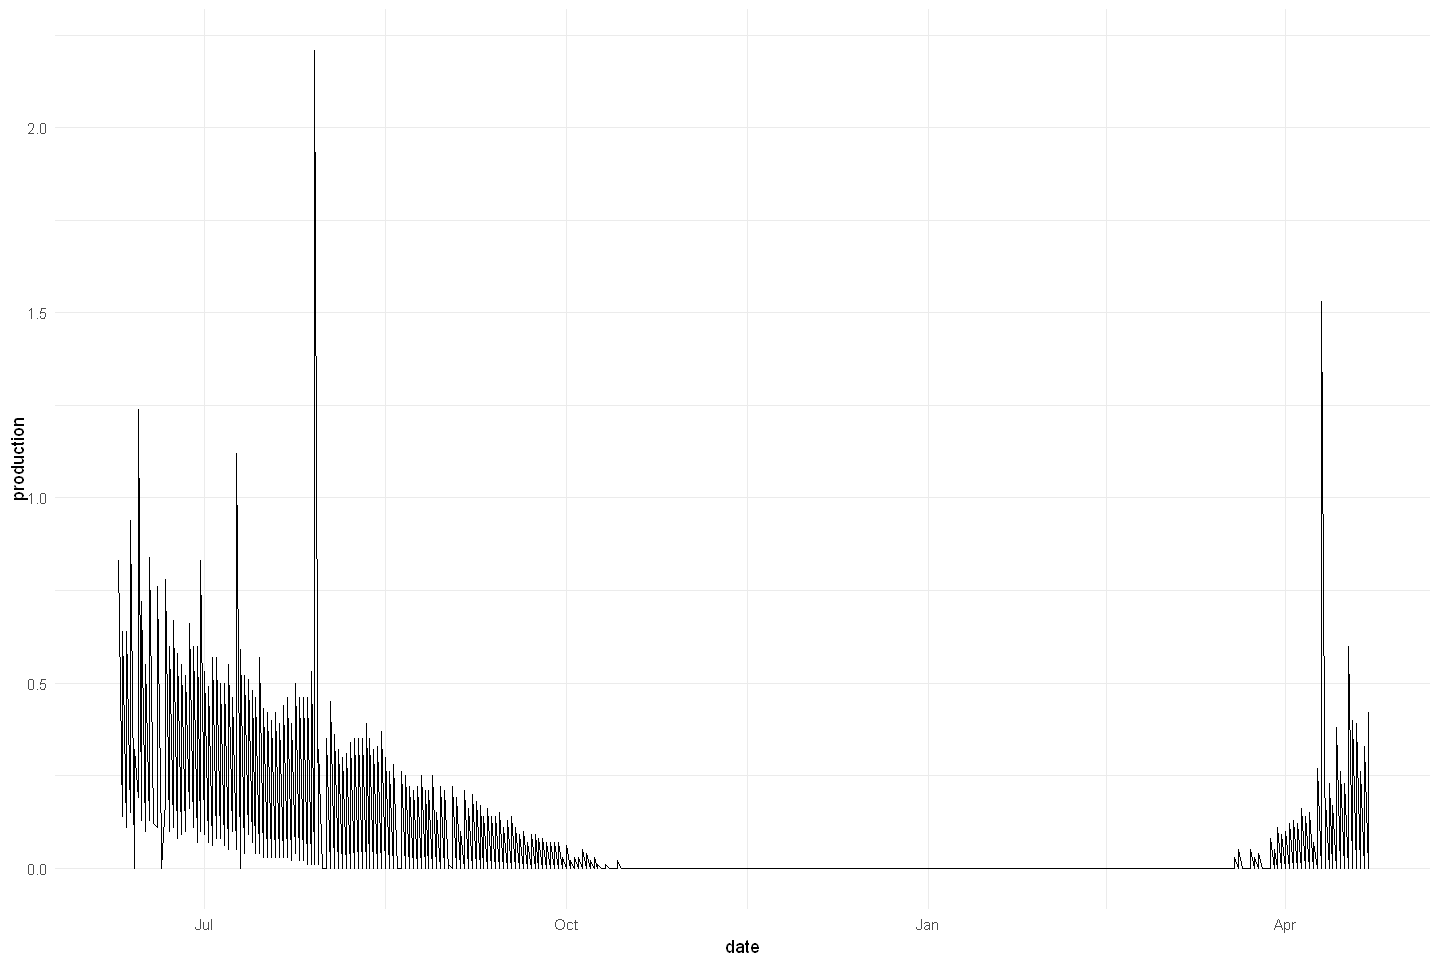

In [21]:
# Visualize production over time
ggplot(truncated_dt, aes(x = date, y = production)) + 
  geom_line() + 
  theme_minimal()

In [22]:
truncated_dt[, categorical_hour := as.factor(hour)]
truncated_dt[, categorical_month := as.character(month(date, label = TRUE))]
lr_model_with_hour_month <- lm(production ~ . -production -date -hour, data = truncated_dt)
summary(lr_model_with_hour_month)


Call:
lm(formula = production ~ . - production - date - hour, data = truncated_dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40101 -0.07392 -0.00284  0.06471  1.70741 

Coefficients: (75 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -1.961e+00  2.759e+00  -0.711  0.47770    
CSNOW_surface_37.75_34.5             2.571e-01  2.156e-01   1.193  0.23366    
CSNOW_surface_37.75_34.75           -4.682e-02  7.446e-02  -0.629  0.52978    
CSNOW_surface_37.75_35.0            -1.089e-02  7.373e-02  -0.148  0.88269    
CSNOW_surface_37.75_35.25           -3.384e-03  6.760e-02  -0.050  0.96010    
CSNOW_surface_37.75_35.5            -5.170e-02  1.306e-01  -0.396  0.69249    
CSNOW_surface_38.0_34.5              2.600e-02  9.172e-02   0.283  0.77695    
CSNOW_surface_38.0_34.75            -3.297e-02  1.238e-01  -0.266  0.79012    
CSNOW_surface_38.0_35.0              3.697e-

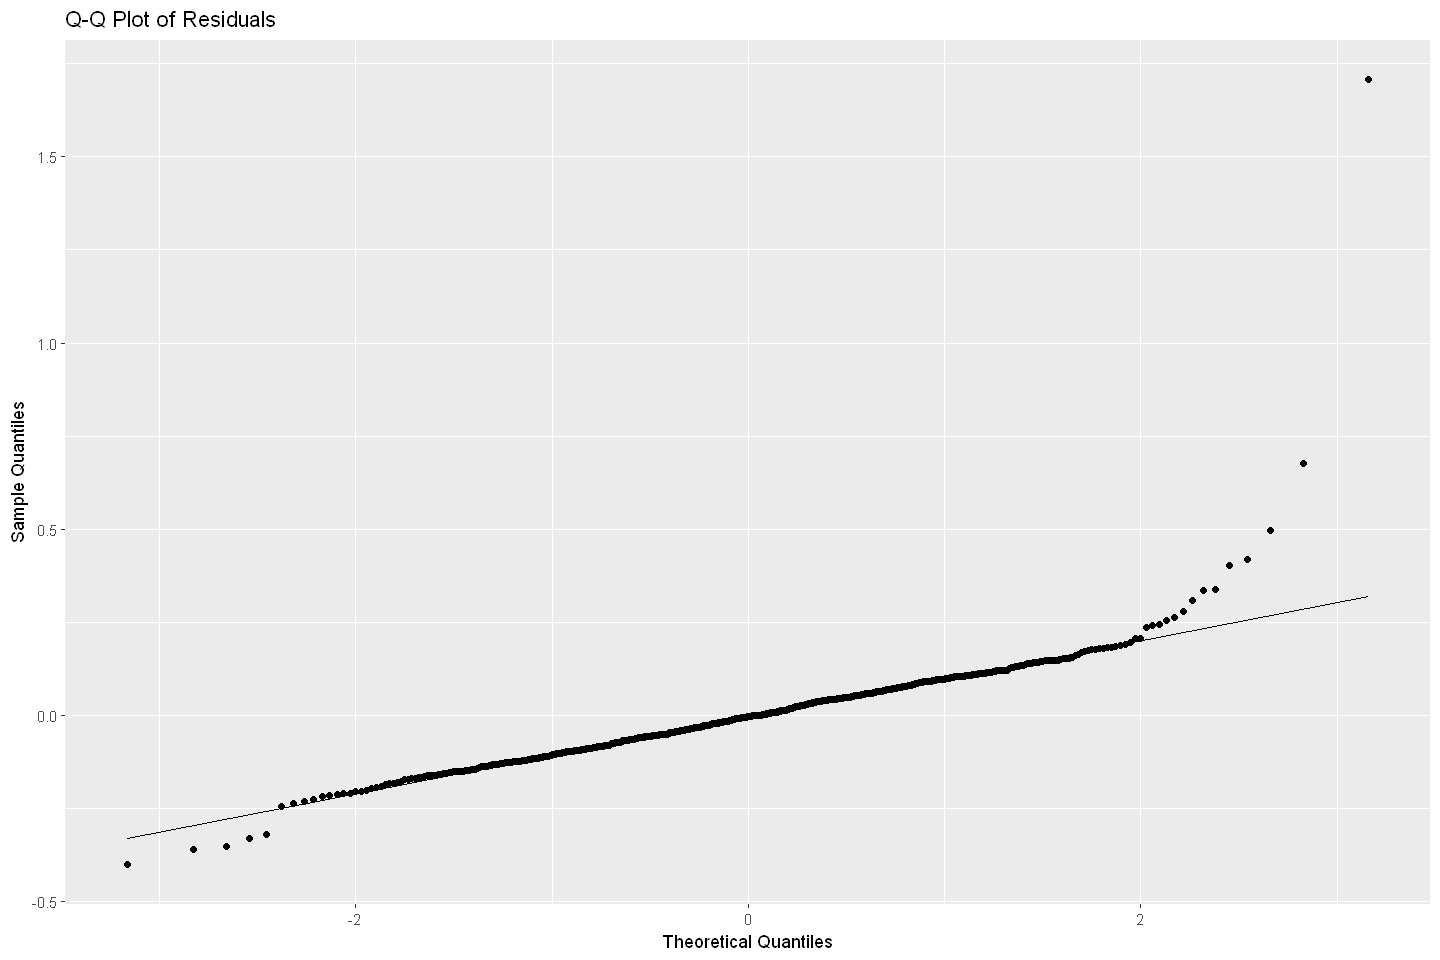

In [23]:
# Get the actual vs predicted values
actual_values <- truncated_dt$production
predicted_values <- predict(lr_model_with_hour_month)

# Calculate residuals
residuals <- actual_values - predicted_values

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

## Hours 6, 7, 16, 17, 18

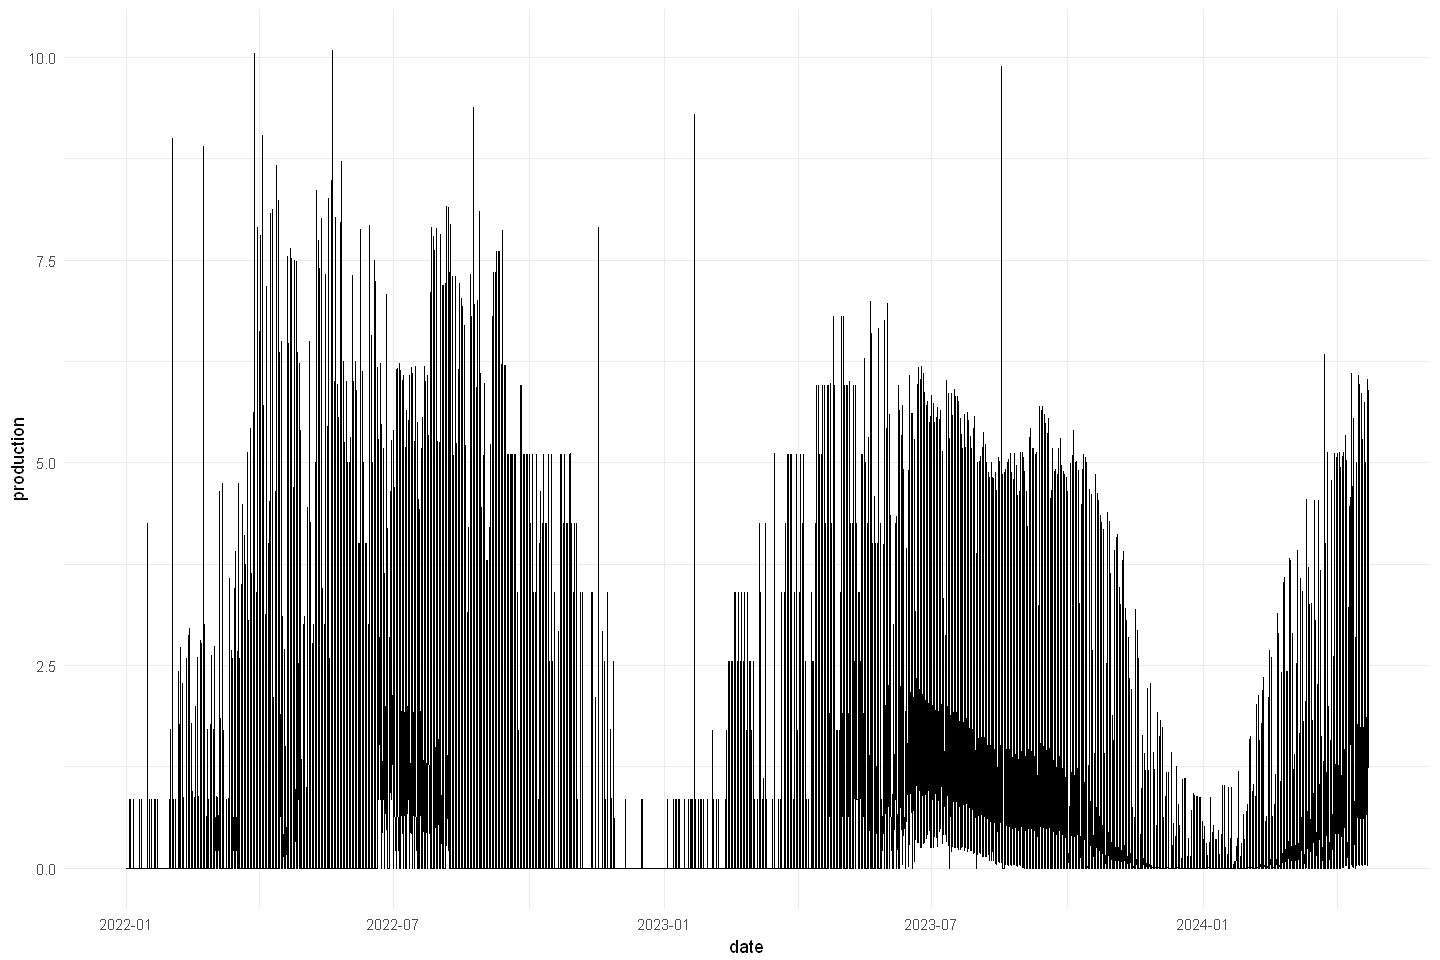

In [25]:
# Filter data
filtered_dt3 <- dt[hour >= 16 & hour <= 18 | hour >= 6 & hour <= 7]

# Visualize production over time
ggplot(filtered_dt3, aes(x = date, y = production)) + 
  geom_line() + 
  theme_minimal()

In [26]:
filtered_dt3[, categorical_hour := as.factor(hour)]
filtered_dt3[, categorical_month := as.character(month(date, label = TRUE))]
lr_model_with_hour_month <- lm(production ~ . -production -date -hour, data = filtered_dt3)
summary(lr_model_with_hour_month)


Call:
lm(formula = production ~ . - production - date - hour, data = filtered_dt3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3330 -0.8458 -0.0054  0.7254  7.2706 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -2.545e+01  3.499e+00  -7.275 4.15e-13 ***
CSNOW_surface_37.75_34.5            -2.676e-01  1.880e-01  -1.423 0.154684    
CSNOW_surface_37.75_34.75           -2.313e-01  1.442e-01  -1.604 0.108772    
CSNOW_surface_37.75_35.0             2.456e-02  1.211e-01   0.203 0.839287    
CSNOW_surface_37.75_35.25           -3.527e-02  1.070e-01  -0.330 0.741714    
CSNOW_surface_37.75_35.5             3.936e-01  1.488e-01   2.645 0.008203 ** 
CSNOW_surface_38.0_34.5             -1.059e-01  1.404e-01  -0.754 0.450772    
CSNOW_surface_38.0_34.75            -4.204e-02  1.649e-01  -0.255 0.798798    
CSNOW_surface_38.0_35.0             -6.917e-02  1.449e-01  -0.477 0.633035    
CSNOW_surface_38.

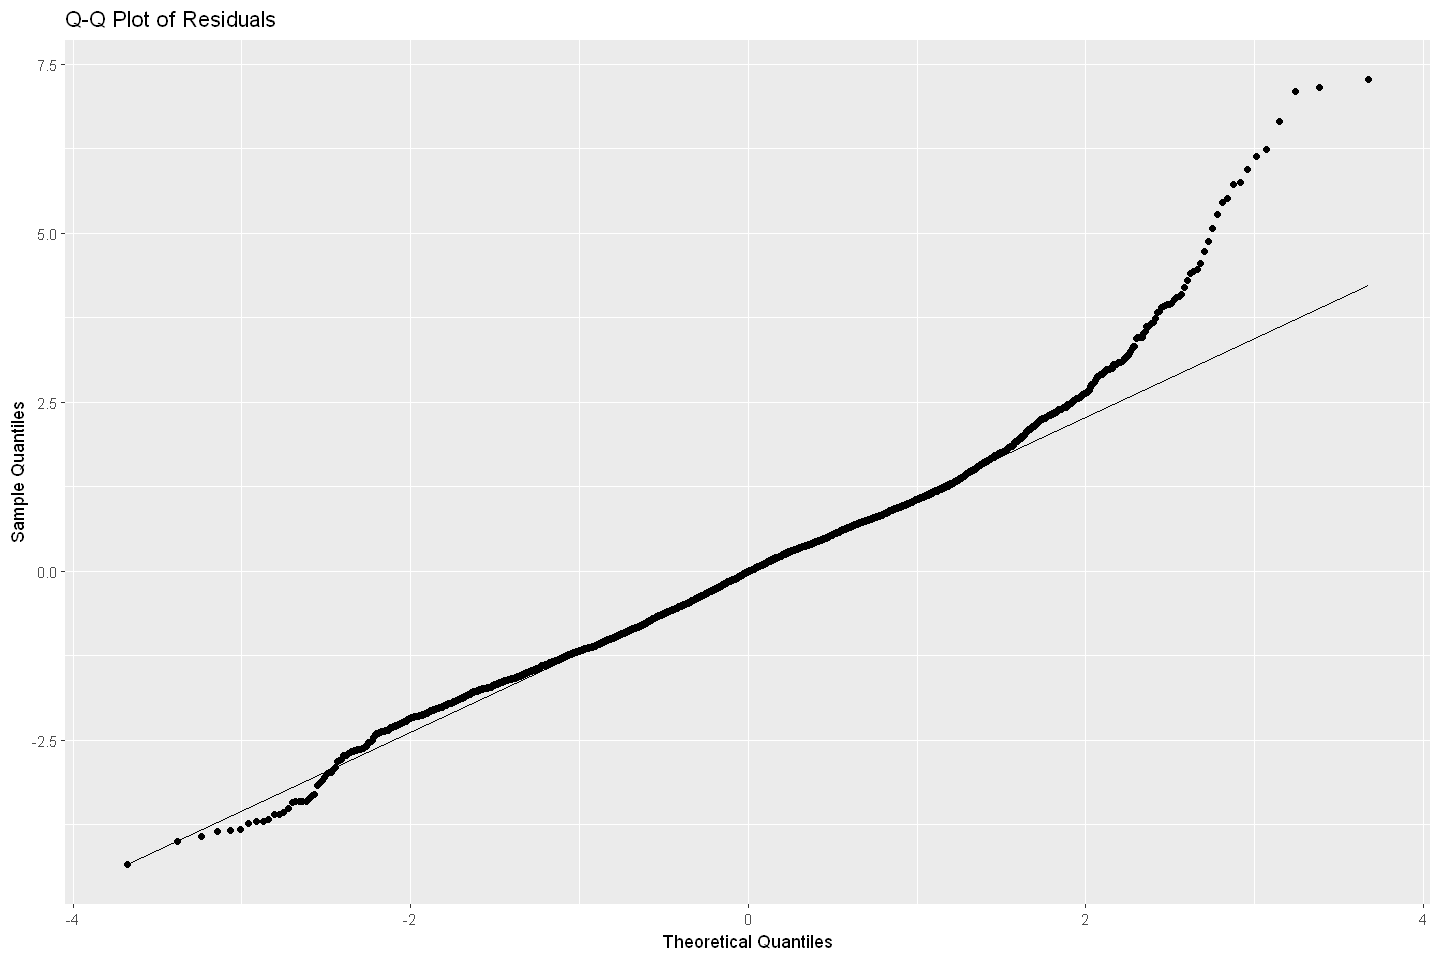

In [27]:
# Get the actual vs predicted values
actual_values <- filtered_dt3$production
predicted_values <- predict(lr_model_with_hour_month)

# Calculate residuals
residuals <- actual_values - predicted_values

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

# MODEL 3

# SARIMA

## Hours 8, 9, 10, 11, 12, 13, 14, 15

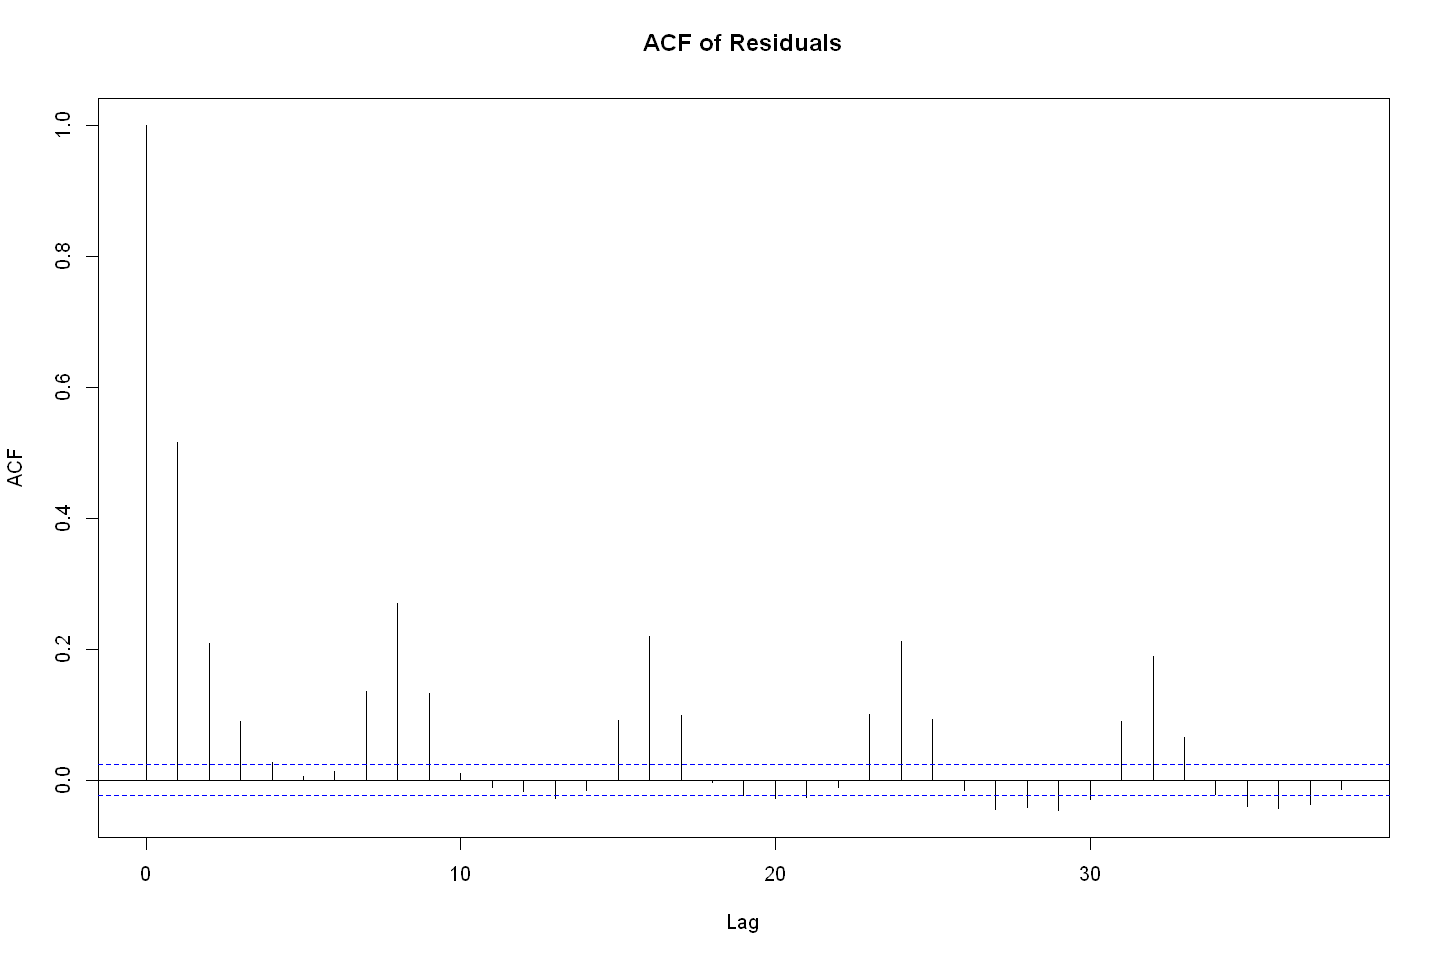

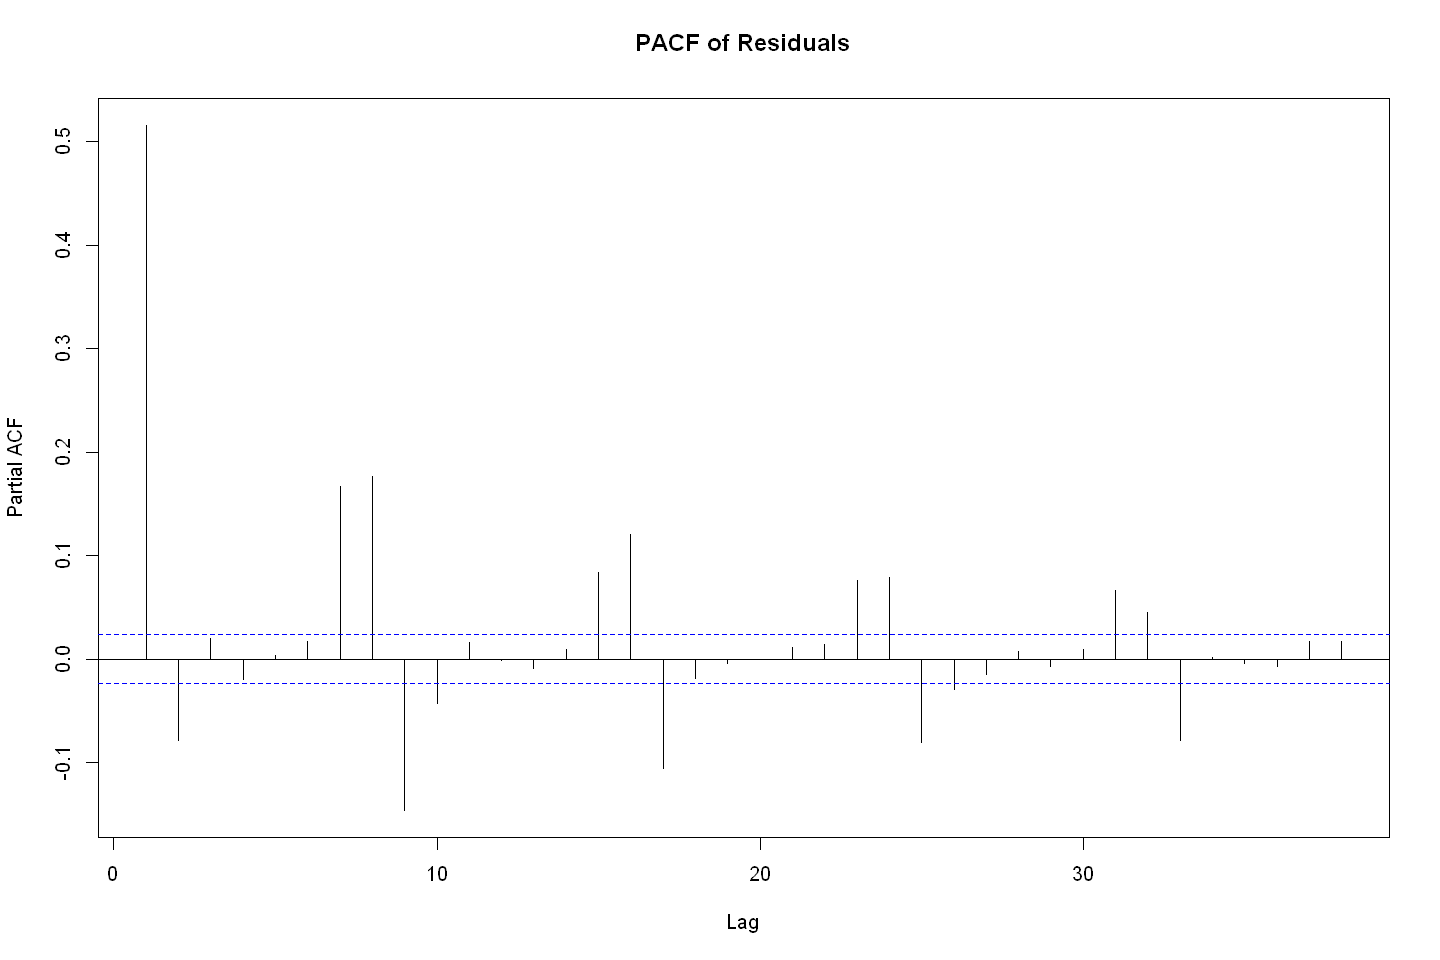

In [29]:
filtered_dt <- dt[hour>=8 & hour<=15]
filtered_dt[production > 10, production := 10]
lr_model <- lm(production ~ . -production -date -hour, data = filtered_dt)

filtered_dt$residuals <- residuals(lr_model)

# Plot ACF
acf(filtered_dt$residuals, main = "ACF of Residuals")

# Plot PACF
pacf(filtered_dt$residuals, main = "PACF of Residuals")


Series: ts_residuals 
ARIMA(1,0,1) with zero mean 

Coefficients:
         ar1     ma1
      0.3977  0.1611
s.e.  0.0217  0.0236

sigma^2 = 3.218:  log likelihood = -13507.77
AIC=27021.55   AICc=27021.55   BIC=27041.99

Training set error measures:
                       ME     RMSE      MAE      MPE     MAPE      MASE
Training set 2.415066e-05 1.793675 1.340367 84.13084 205.6871 0.9270825
                      ACF1
Training set -0.0007277735


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with zero mean
Q* = 537.38, df = 8, p-value < 2.2e-16

Model df: 2.   Total lags used: 10



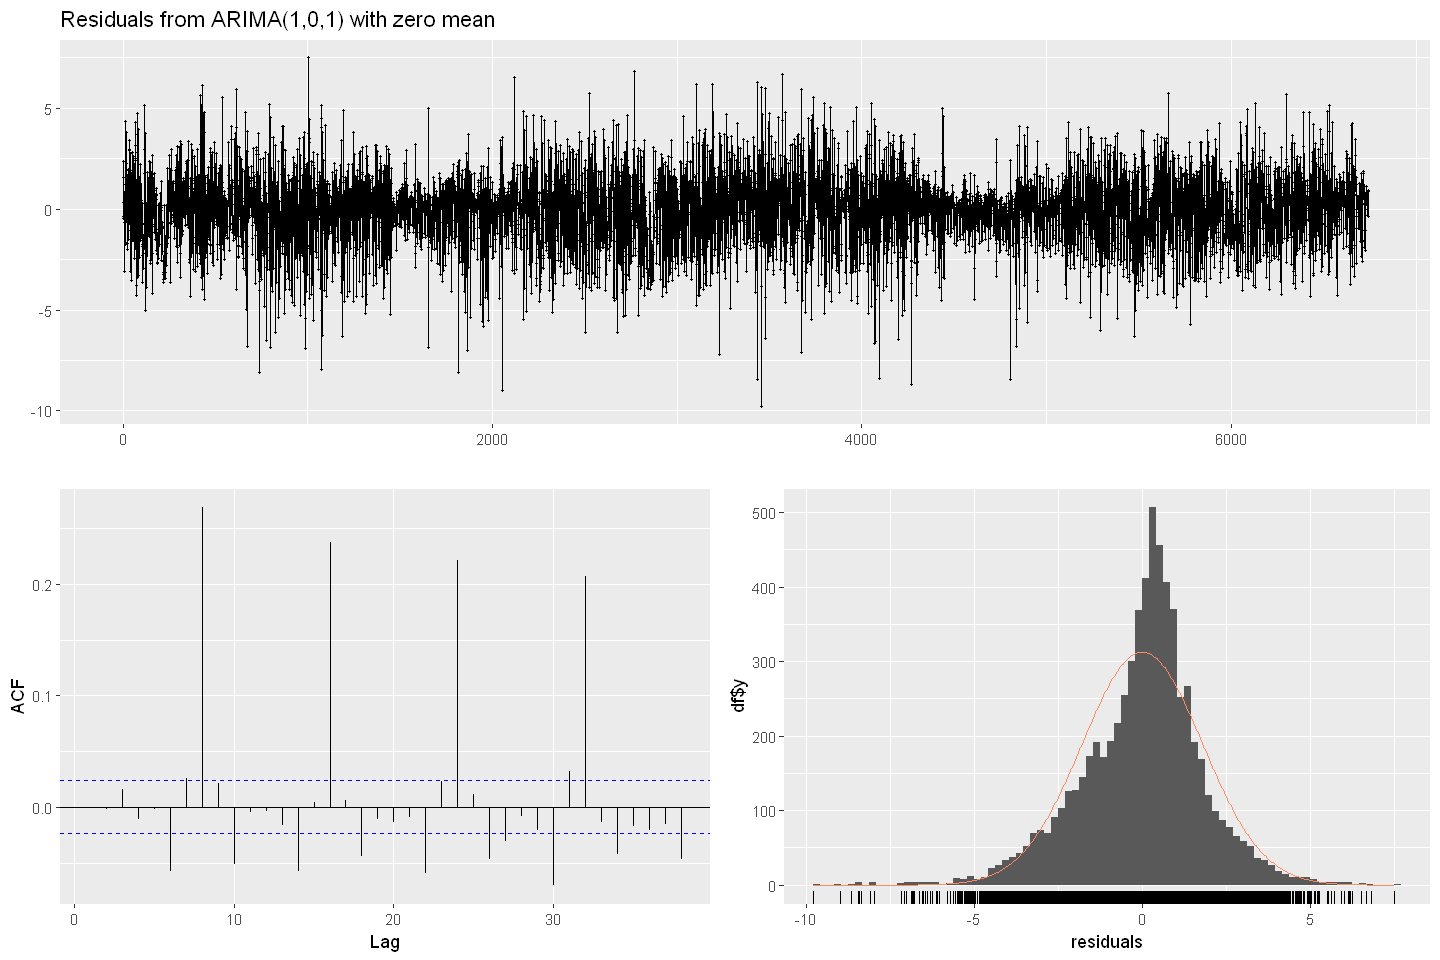

In [30]:
ts_residuals <- ts(filtered_dt$residuals)
auto_arima_model <- auto.arima(ts_residuals)
summary(auto_arima_model)
checkresiduals(auto_arima_model)

Series: ts_residuals 
ARIMA(0,1,0)(0,1,0)[8] 

sigma^2 = 6.146:  log likelihood = -15668.69
AIC=31339.38   AICc=31339.38   BIC=31346.19

Training set error measures:
                       ME     RMSE      MAE      MPE     MAPE      MASE
Training set 3.881206e-05 2.477367 1.711344 28.14602 427.3697 0.9400742
                   ACF1
Training set -0.2332185


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(0,1,0)[8]
Q* = 2312.8, df = 16, p-value < 2.2e-16

Model df: 0.   Total lags used: 16



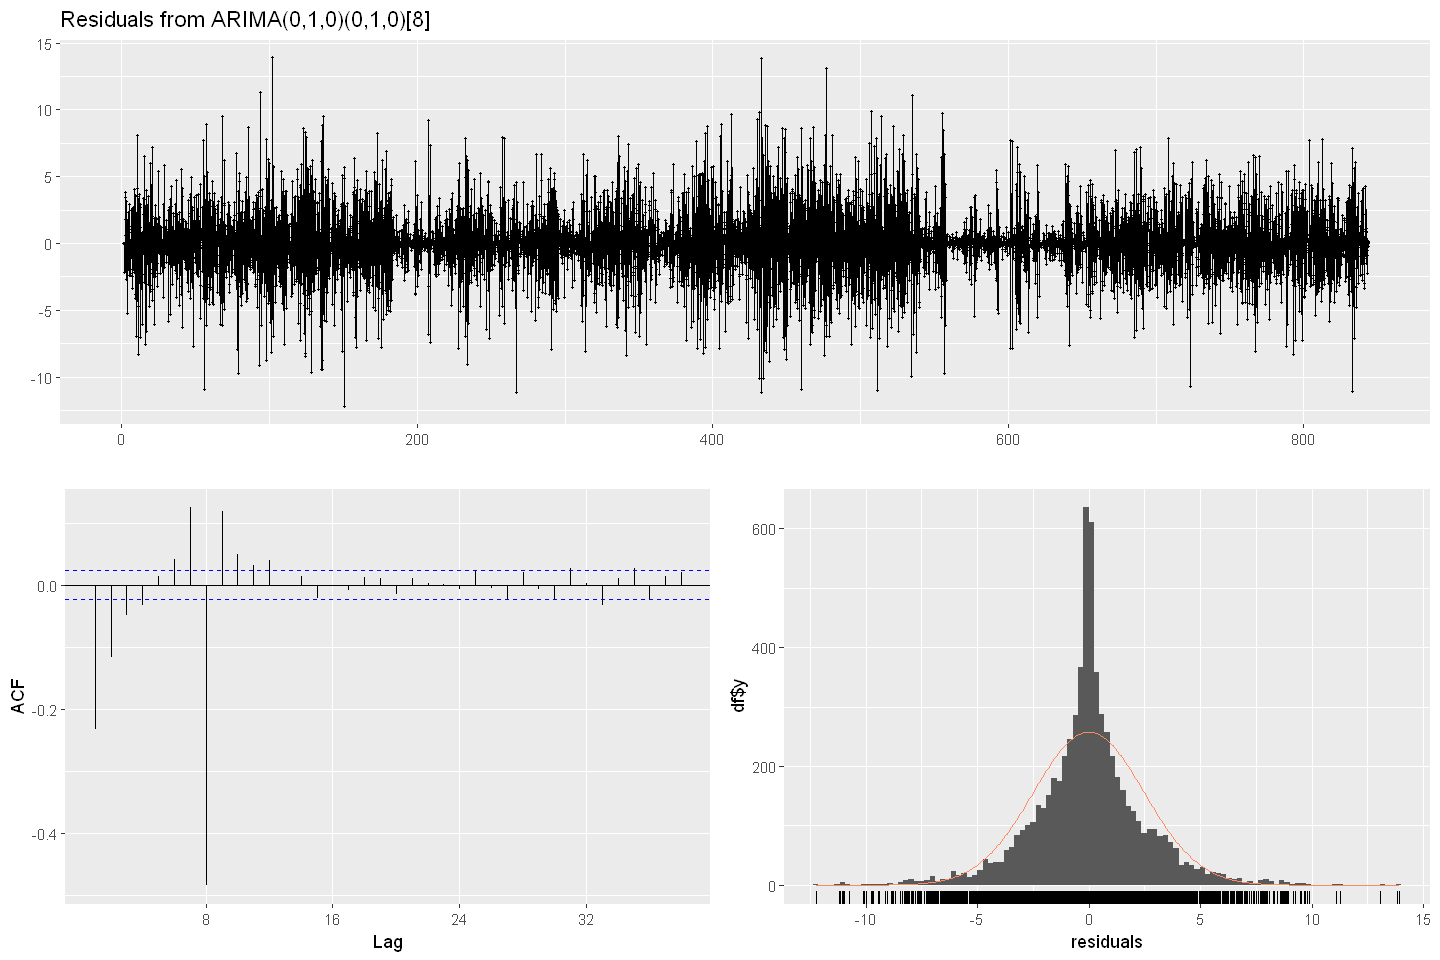

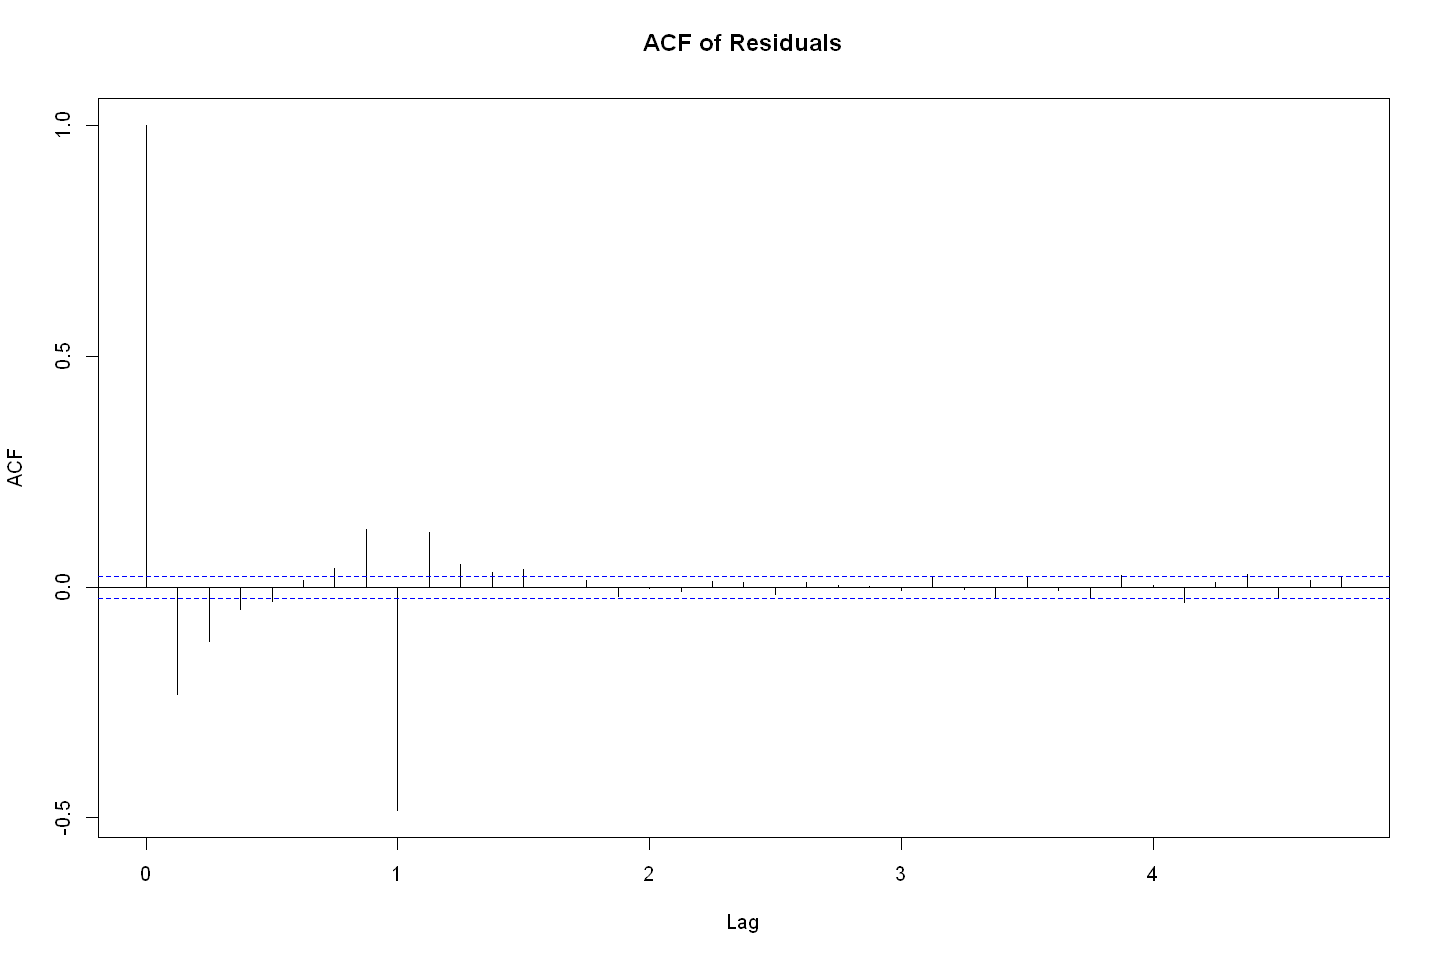

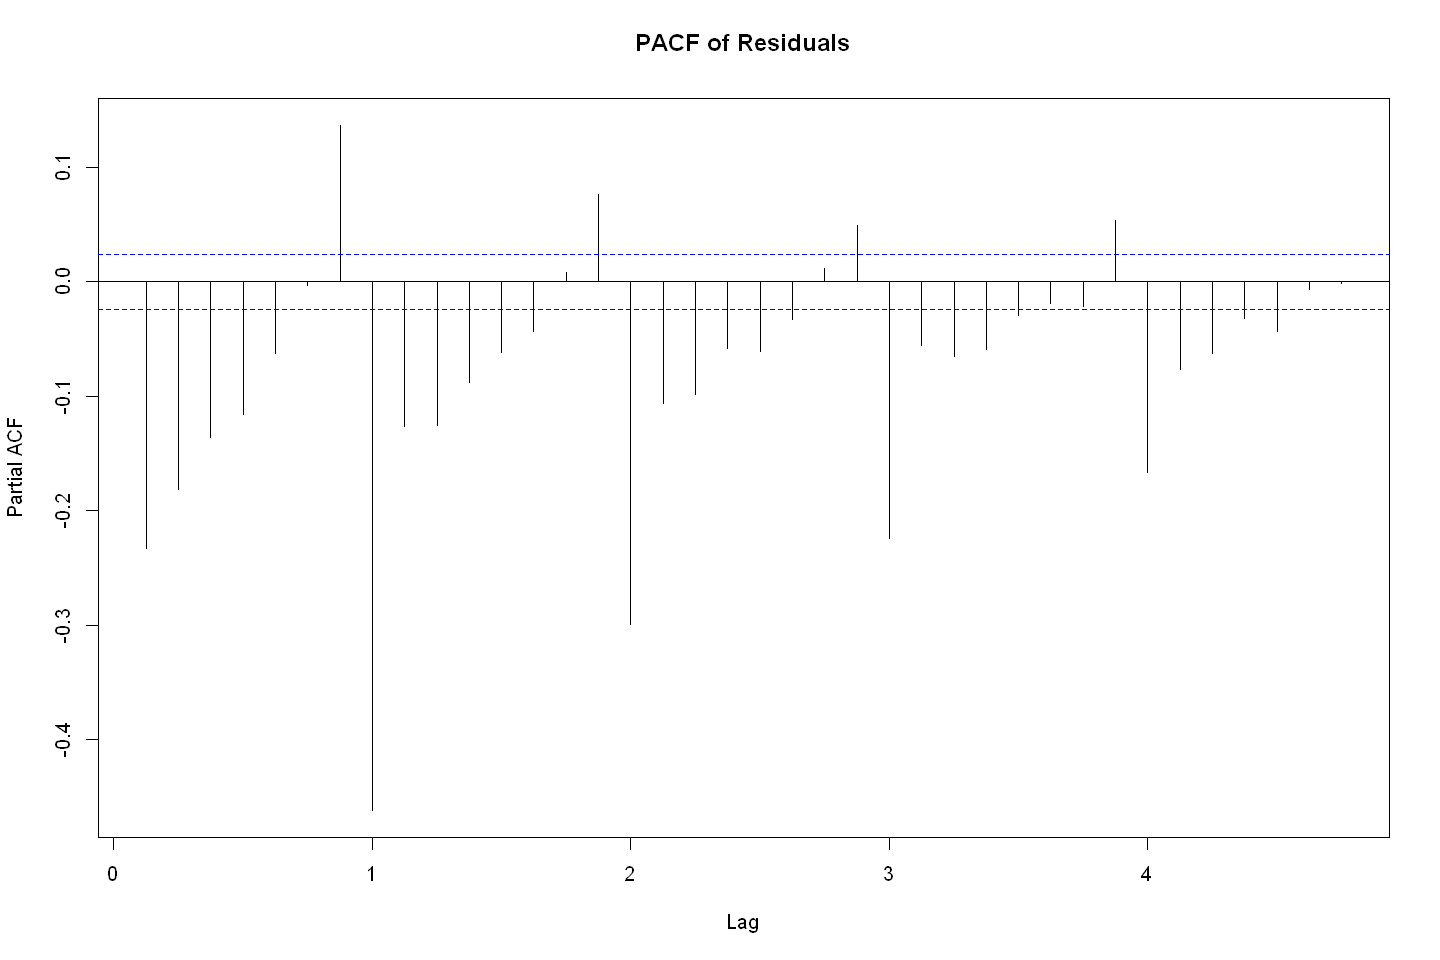

In [31]:
ts_residuals <- ts(filtered_dt$residuals, frequency = 8)
sarima_model <- Arima(ts_residuals, order = c(0, 1, 0), seasonal=c(0,1,0))
summary(sarima_model)
checkresiduals(sarima_model)
# Plot ACF
acf(residuals(sarima_model), main = "ACF of Residuals")

# Plot PACF
pacf(residuals(sarima_model), main = "PACF of Residuals")

Series: ts_residuals 
ARIMA(0,1,0)(0,1,1)[8] 

Coefficients:
         sma1
      -0.9235
s.e.   0.0057

sigma^2 = 3.472:  log likelihood = -13753.35
AIC=27510.71   AICc=27510.71   BIC=27524.34

Training set error measures:
                       ME     RMSE      MAE      MPE     MAPE     MASE
Training set 0.0002672668 1.861962 1.278065 72.41063 331.1116 0.702066
                   ACF1
Training set -0.2249821


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(0,1,1)[8]
Q* = 566.36, df = 15, p-value < 2.2e-16

Model df: 1.   Total lags used: 16



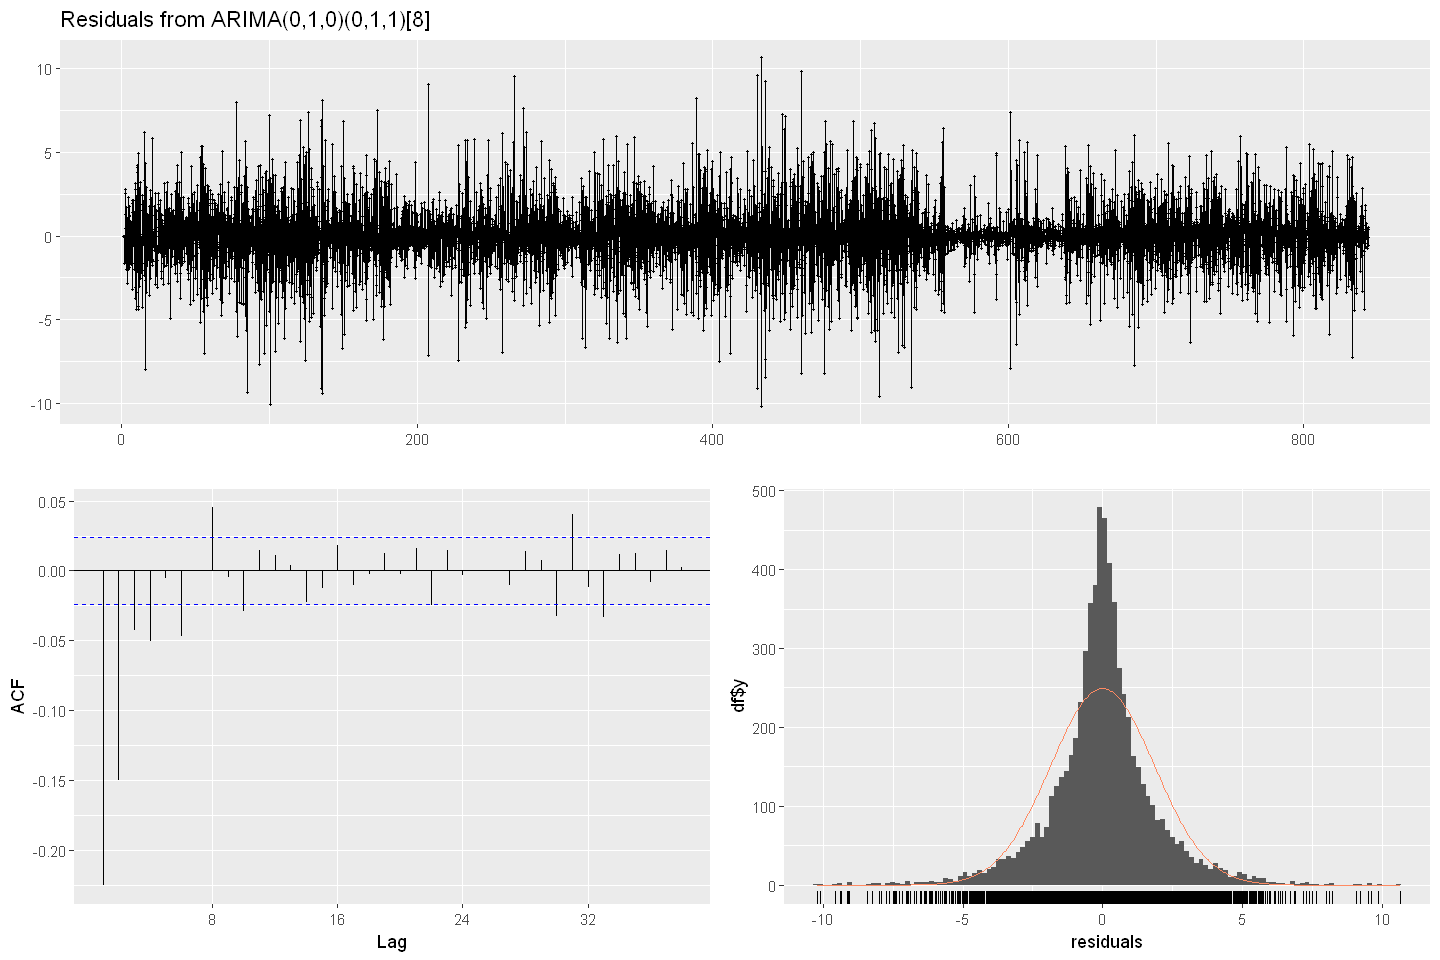

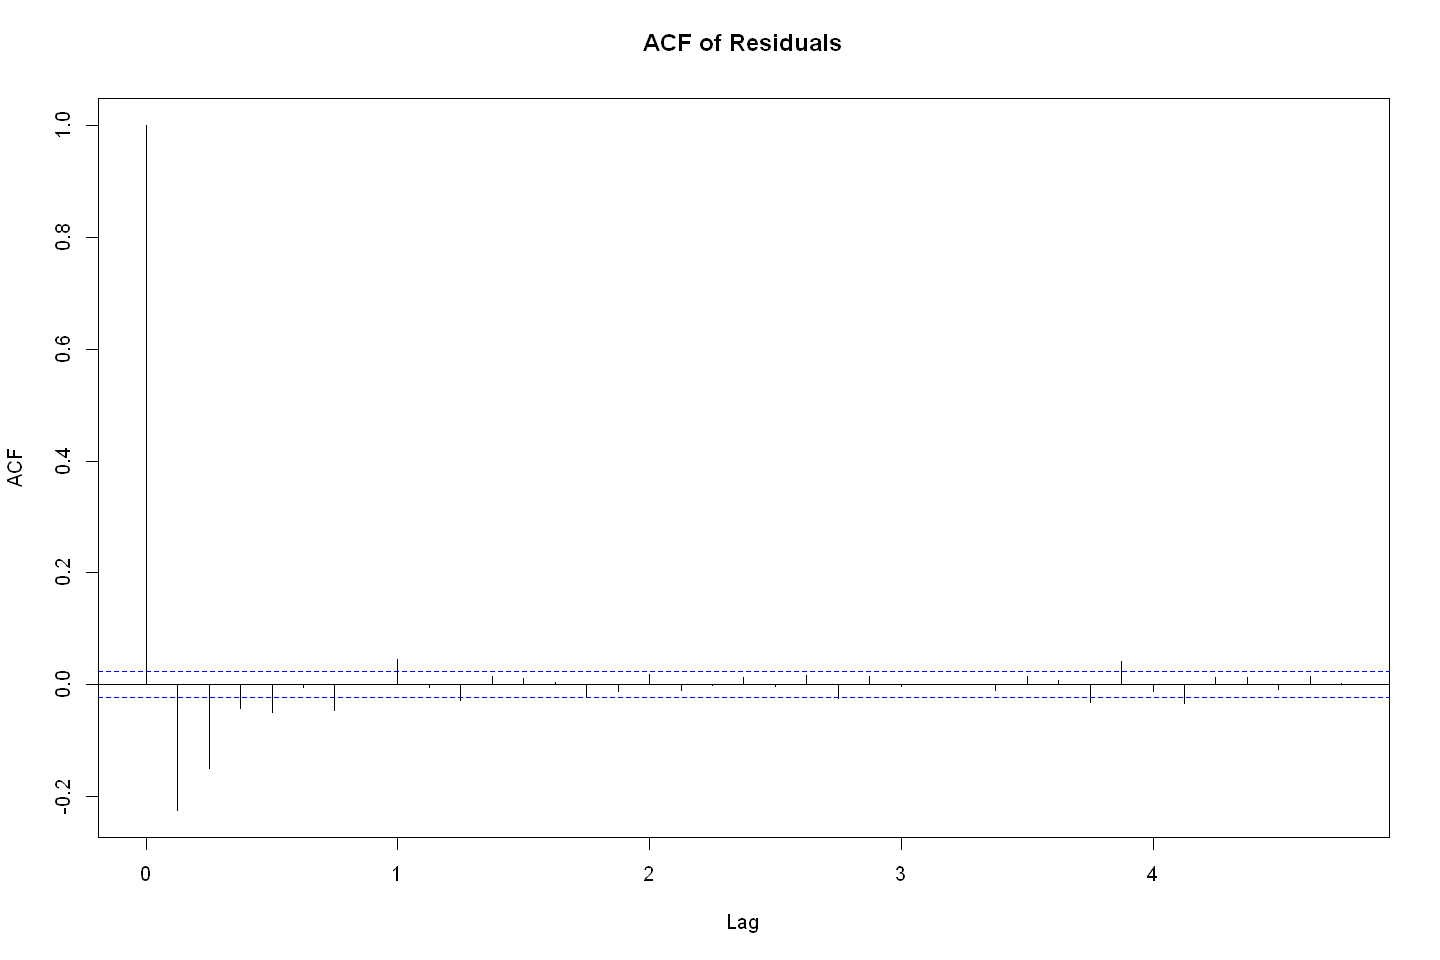

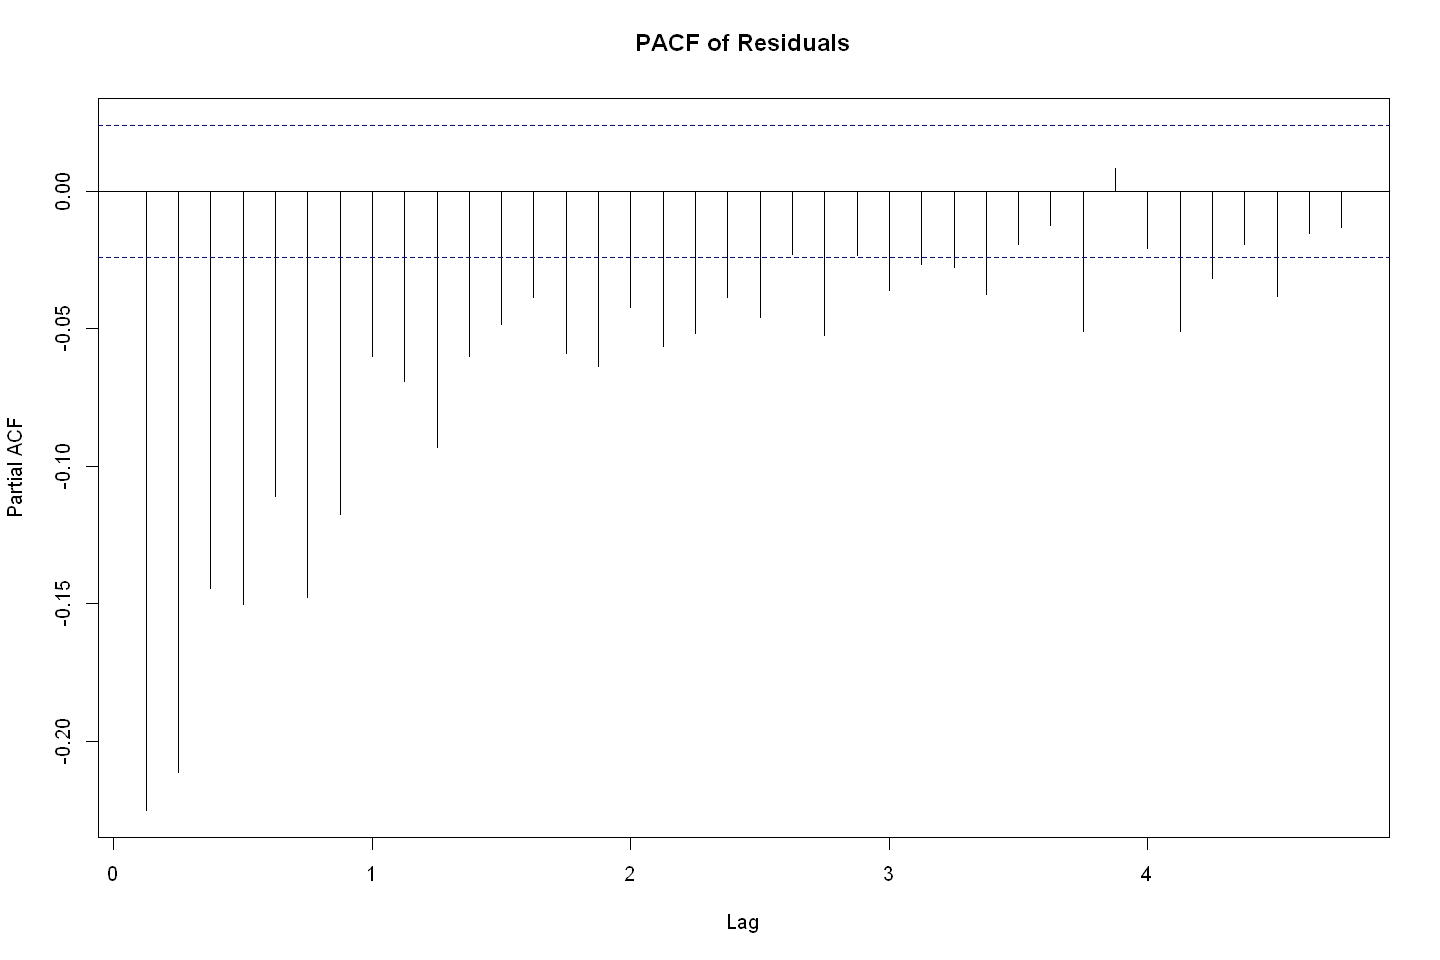

In [32]:
ts_residuals <- ts(filtered_dt$residuals, frequency = 8)
sarima_model <- Arima(ts_residuals, order = c(0, 1, 0), seasonal=c(0,1,1))
summary(sarima_model)
checkresiduals(sarima_model)
# Plot ACF
acf(residuals(sarima_model), main = "ACF of Residuals")

# Plot PACF
pacf(residuals(sarima_model), main = "PACF of Residuals")

MA(2) (q=2)

due to spikes at the ACF graph

Series: ts_residuals 
ARIMA(0,1,2)(0,1,1)[8] 

Coefficients:
          ma1      ma2     sma1
      -0.4900  -0.3972  -0.9433
s.e.   0.0112   0.0124   0.0046

sigma^2 = 2.821:  log likelihood = -13056.08
AIC=26120.16   AICc=26120.16   BIC=26147.42

Training set error measures:
                       ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.0005297602 1.678176 1.209289 65.54262 239.6042 0.6642856
                   ACF1
Training set 0.06619298


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(0,1,1)[8]
Q* = 291.91, df = 13, p-value < 2.2e-16

Model df: 3.   Total lags used: 16



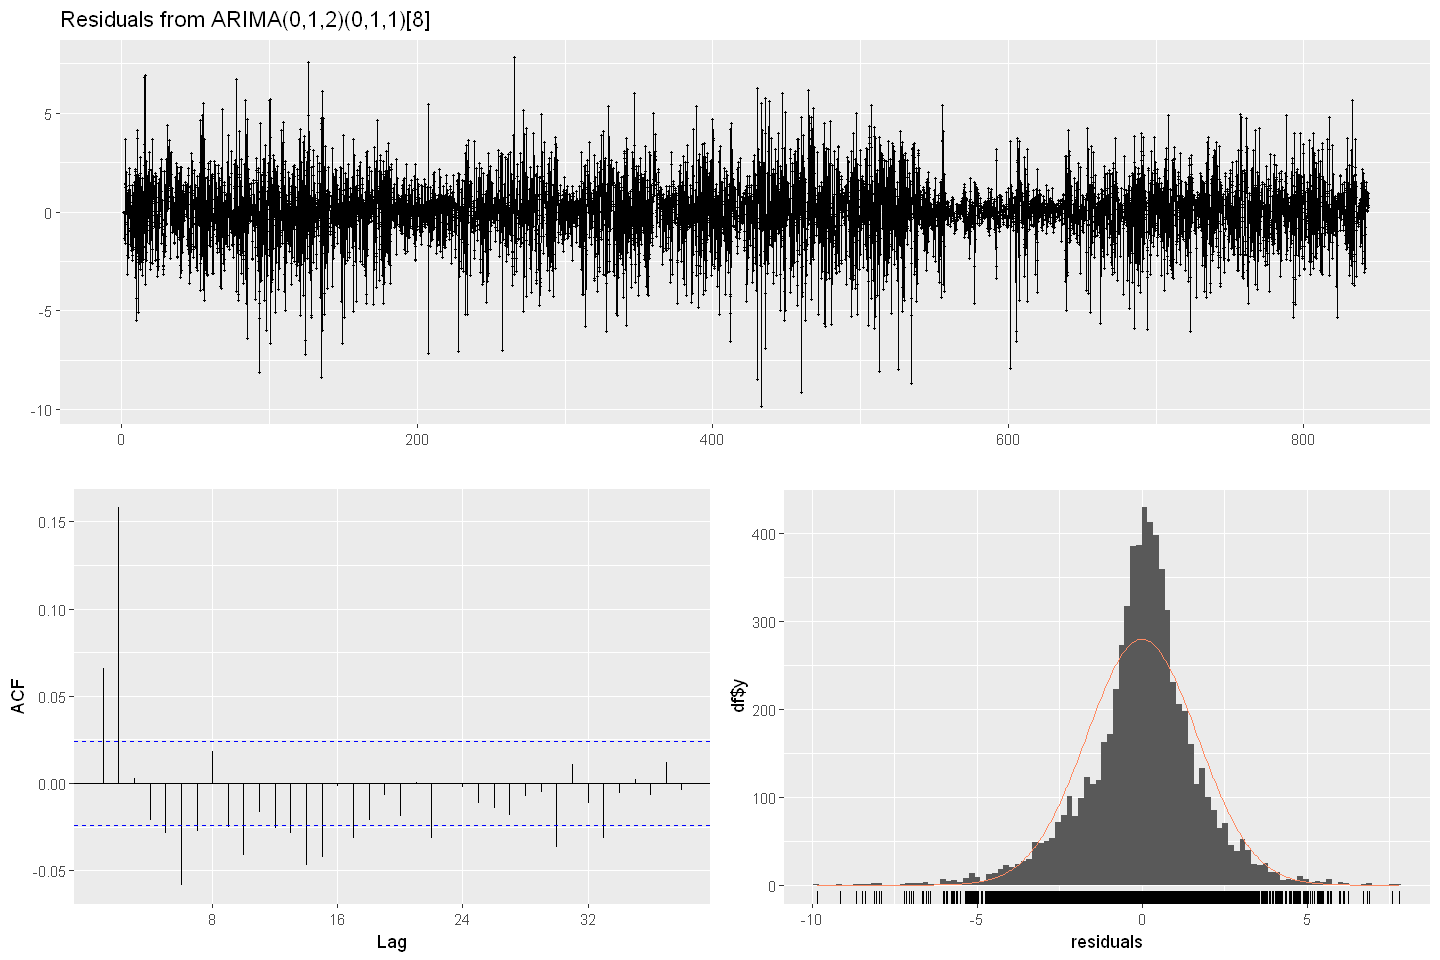

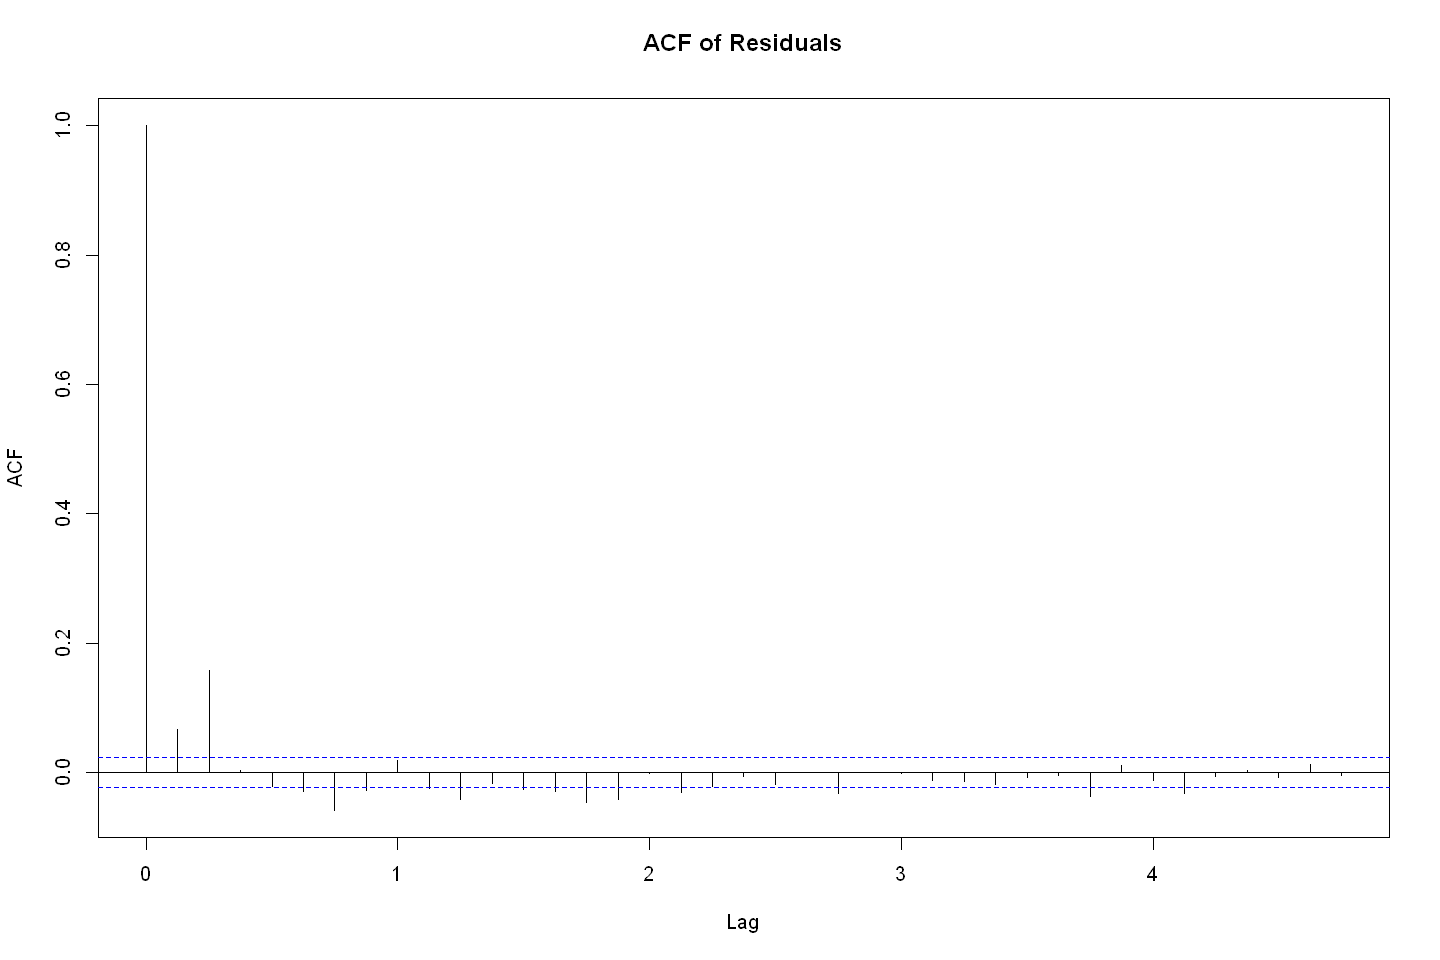

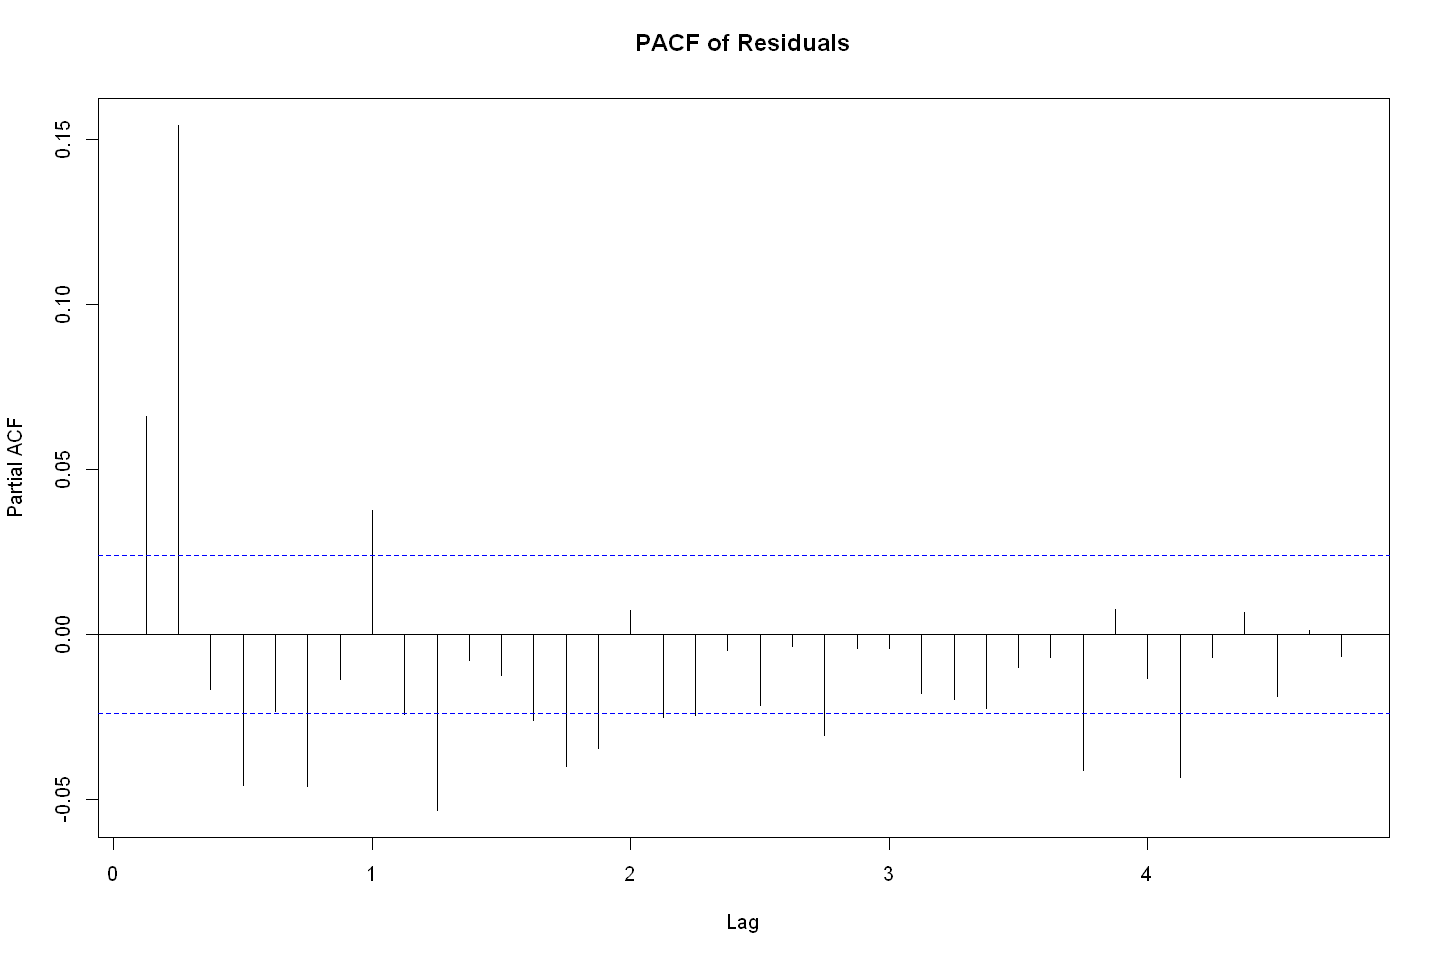

In [33]:
ts_residuals <- ts(filtered_dt$residuals, frequency = 8)
sarima_model <- Arima(ts_residuals, order = c(0, 1, 2), seasonal=c(0,1,1))
summary(sarima_model)
checkresiduals(sarima_model)
# Plot ACF
acf(residuals(sarima_model), main = "ACF of Residuals")

# Plot PACF
pacf(residuals(sarima_model), main = "PACF of Residuals")

AR(2) (p=2)

due to spikes at PACF

Series: ts_residuals 
ARIMA(2,1,2)(0,1,1)[8] 

Coefficients:
         ar1     ar2      ma1      ma2     sma1
      -0.406  0.5012  -0.0479  -0.9521  -0.9210
s.e.   0.039  0.0252   0.0358   0.0358   0.0066

sigma^2 = 2.669:  log likelihood = -12872.42
AIC=25756.84   AICc=25756.85   BIC=25797.73

Training set error measures:
                     ME     RMSE      MAE      MPE    MAPE      MASE
Training set 0.01824403 1.632097 1.167972 78.53812 239.121 0.6415894
                     ACF1
Training set -0.002320167


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)(0,1,1)[8]
Q* = 37.375, df = 11, p-value = 9.969e-05

Model df: 5.   Total lags used: 16



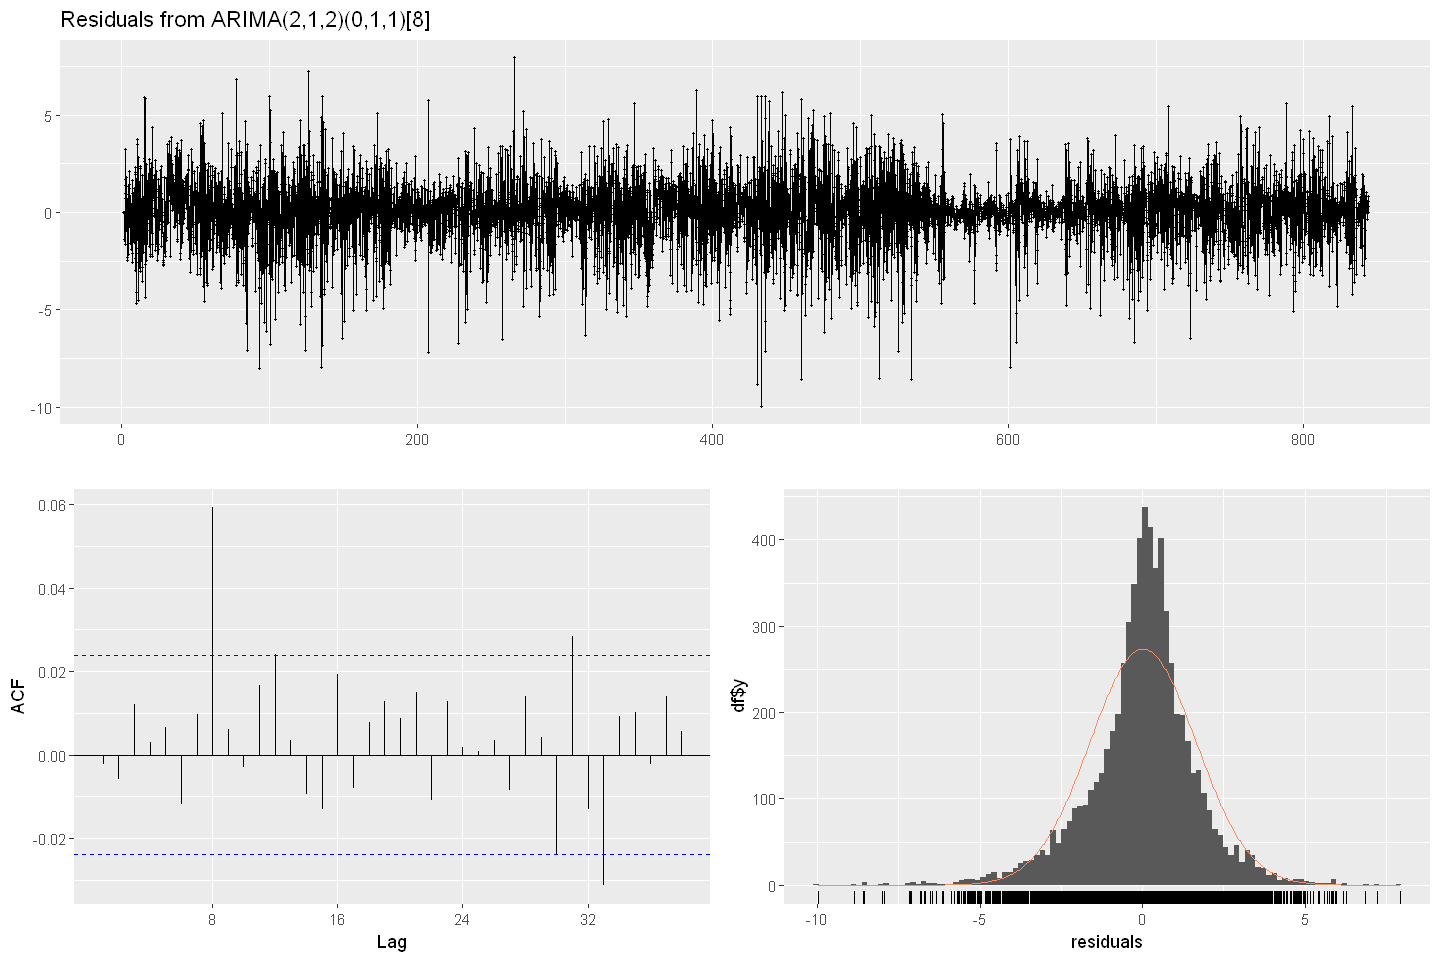

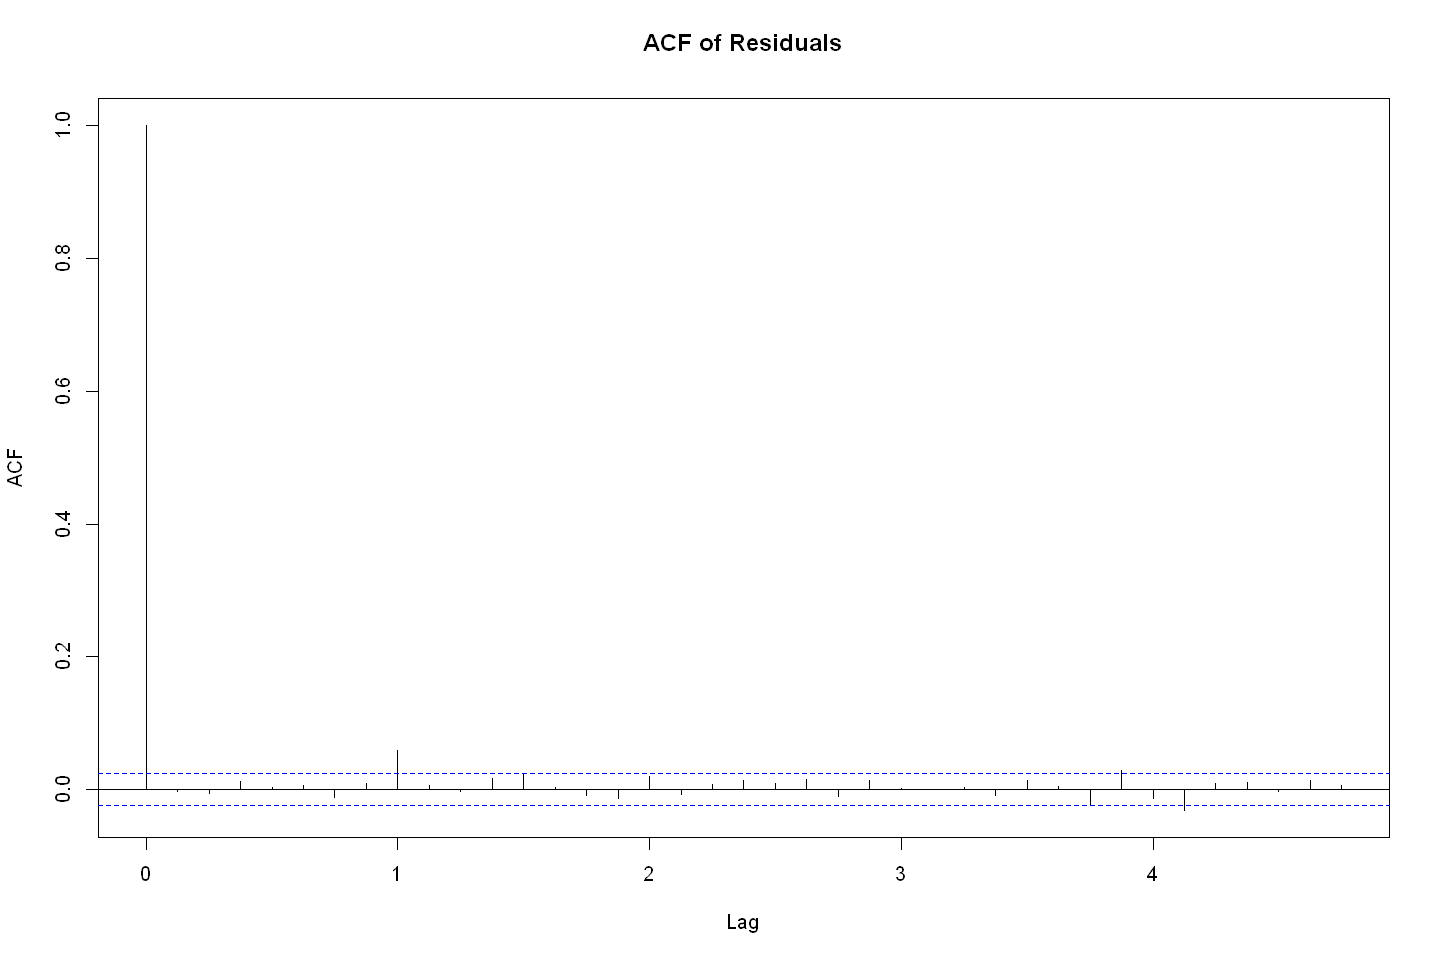

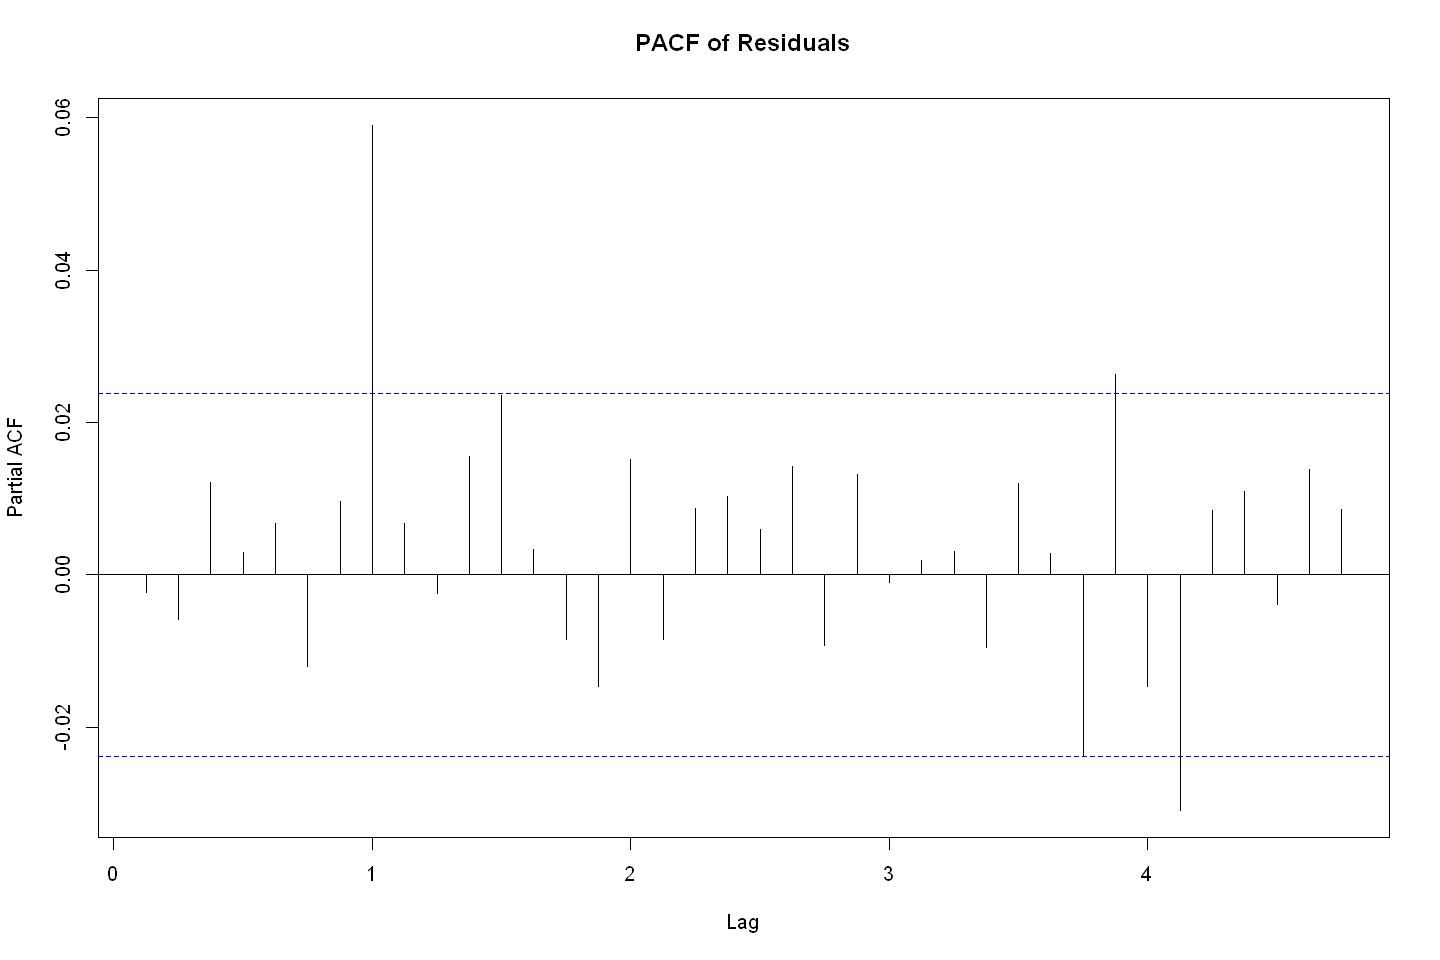

In [34]:
ts_residuals <- ts(filtered_dt$residuals, frequency = 8)
sarima_model <- Arima(ts_residuals, order = c(2, 1, 2), seasonal=c(0,1,1))
summary(sarima_model)
checkresiduals(sarima_model)
# Plot ACF
acf(residuals(sarima_model), main = "ACF of Residuals")

# Plot PACF
pacf(residuals(sarima_model), main = "PACF of Residuals")

Finally determined parameters are given as:

(p=2, d=1, q=2)x(P=0, D=1, Q=1)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


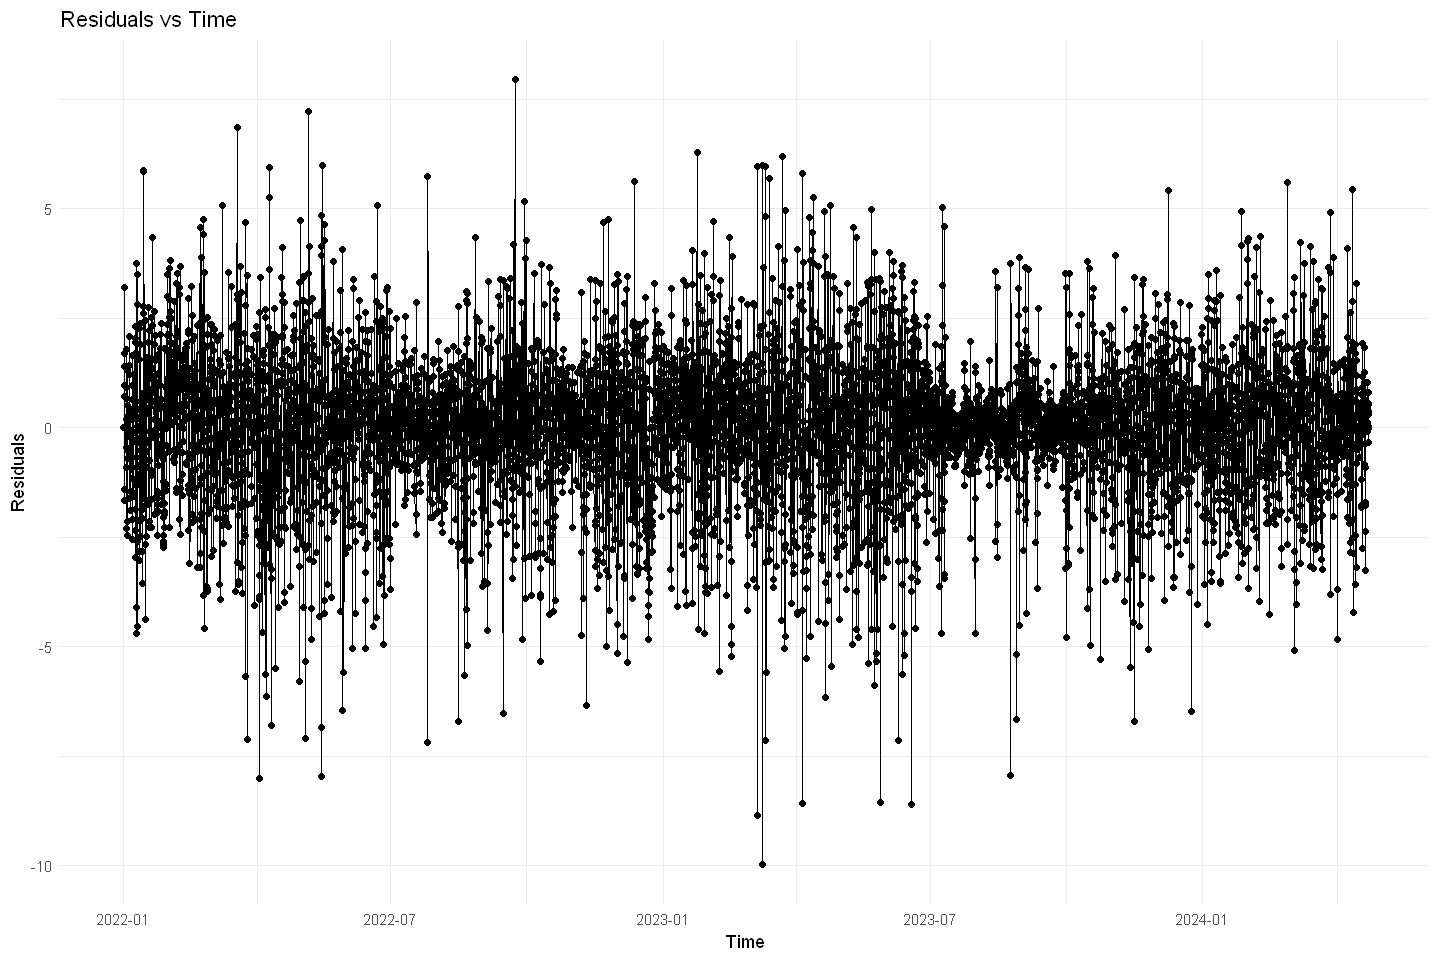

In [35]:
filtered_dt$residuals3 <- residuals(sarima_model)
ggplot(filtered_dt, aes(x = date, y = residuals3)) +
  geom_point() +
  geom_line() +
  labs(title = "Residuals vs Time", x = "Time", y = "Residuals") +
  theme_minimal()

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


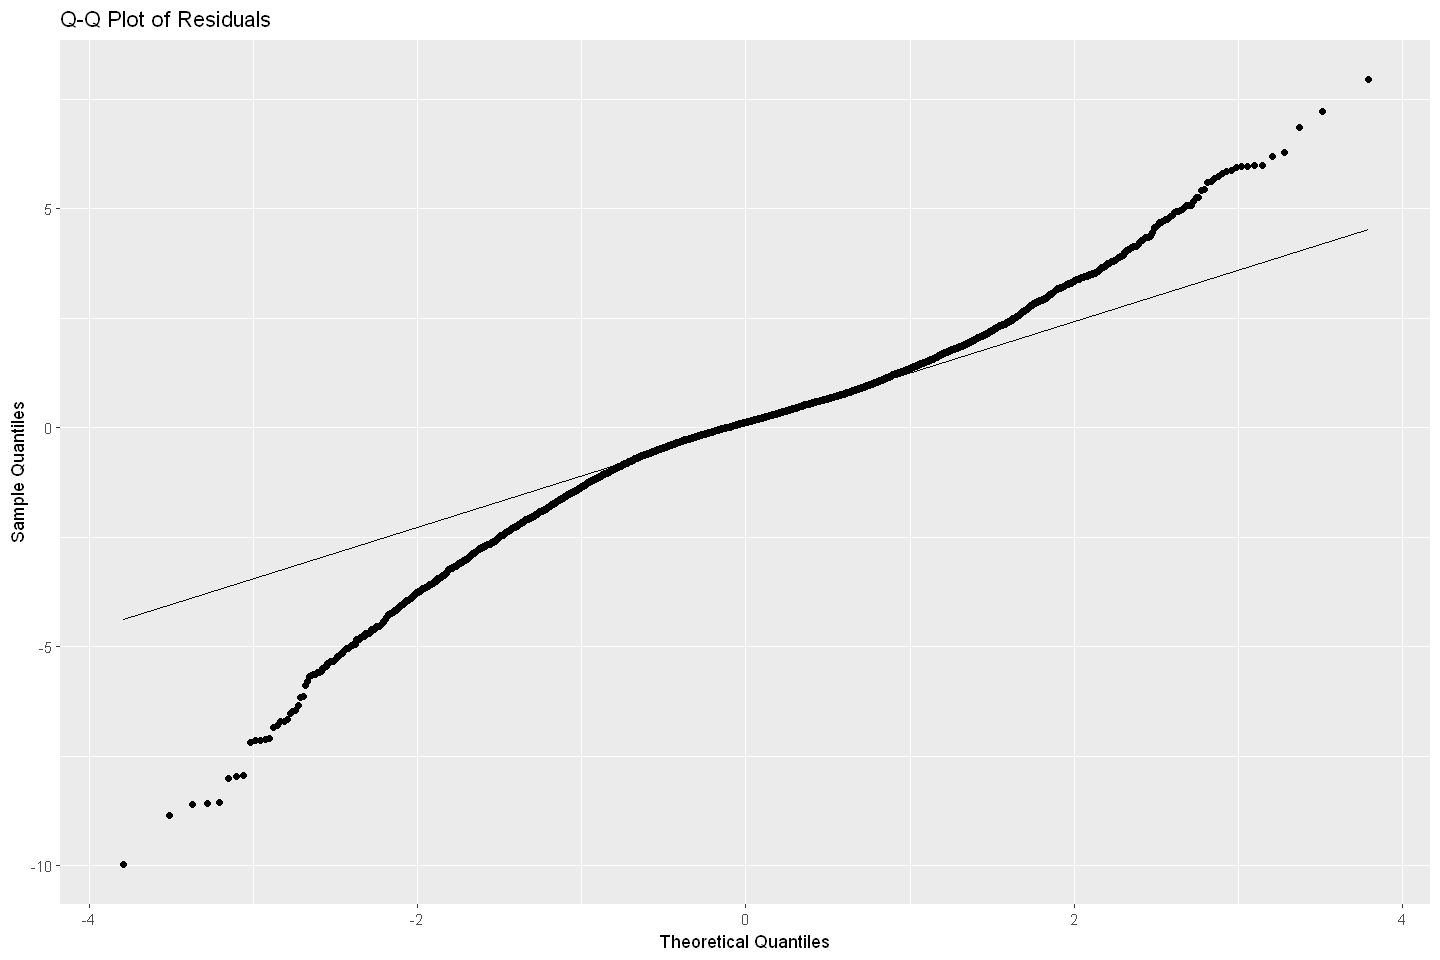

In [36]:
residuals <- residuals(sarima_model)

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

In [39]:

test_dates <- unique(test_dates)

# Create a tibble with all combinations of test dates and hours
all_results <- expand.grid(date = test_dates, hour = 8:15) %>% as_tibble()

# Add the actual production values for the corresponding date and hour
all_results <- all_results %>%
left_join(filtered_dt, by = c("date", "hour")) %>%
rename(actual = production)


all_results <- all_results %>%
select(date, hour, actual) %>%
distinct()

forecast_ahead <- 1

results <- data.frame()
preds <- c()

i = 1
for (i in 1:length(test_dates)){
  for (j in 8:15){
      current_date <- test_dates[i] + (-forecast_ahead)
      train_data <- data %>% filter(date <= current_date)
      test_data <- data %>% filter(date == test_dates[i] & hour==j)
      model <- lm(production ~ . -production -date -hour, data = train_data)
      pred <- model %>% predict(test_data)
      preds <- c(preds,pred)
      train_res <- model %>% residuals() %>% ts(frequency = 8)
      model_res <- Arima(train_res, order = c(2, 1, 2), seasonal=c(0,1,1))
      test_res_pred <- forecast(model_res,h=forecast_ahead)$mean[1]

      pred <- predict(model,test_data) + test_res_pred
      preds <- c(preds,pred)

      result <- cbind(
          date=test_dates[i],
          actual=test_data$Consumption,
          pred=pred
  )
results <- rbind(results,result)
}}
results <- results %>% tibble()
all_results <- all_results %>% mutate(M2 = preds)
performance <- cbind(model="M2",accu(results$actual,results$pred))

all_results %>% head()
performance

## Hours 4, 5

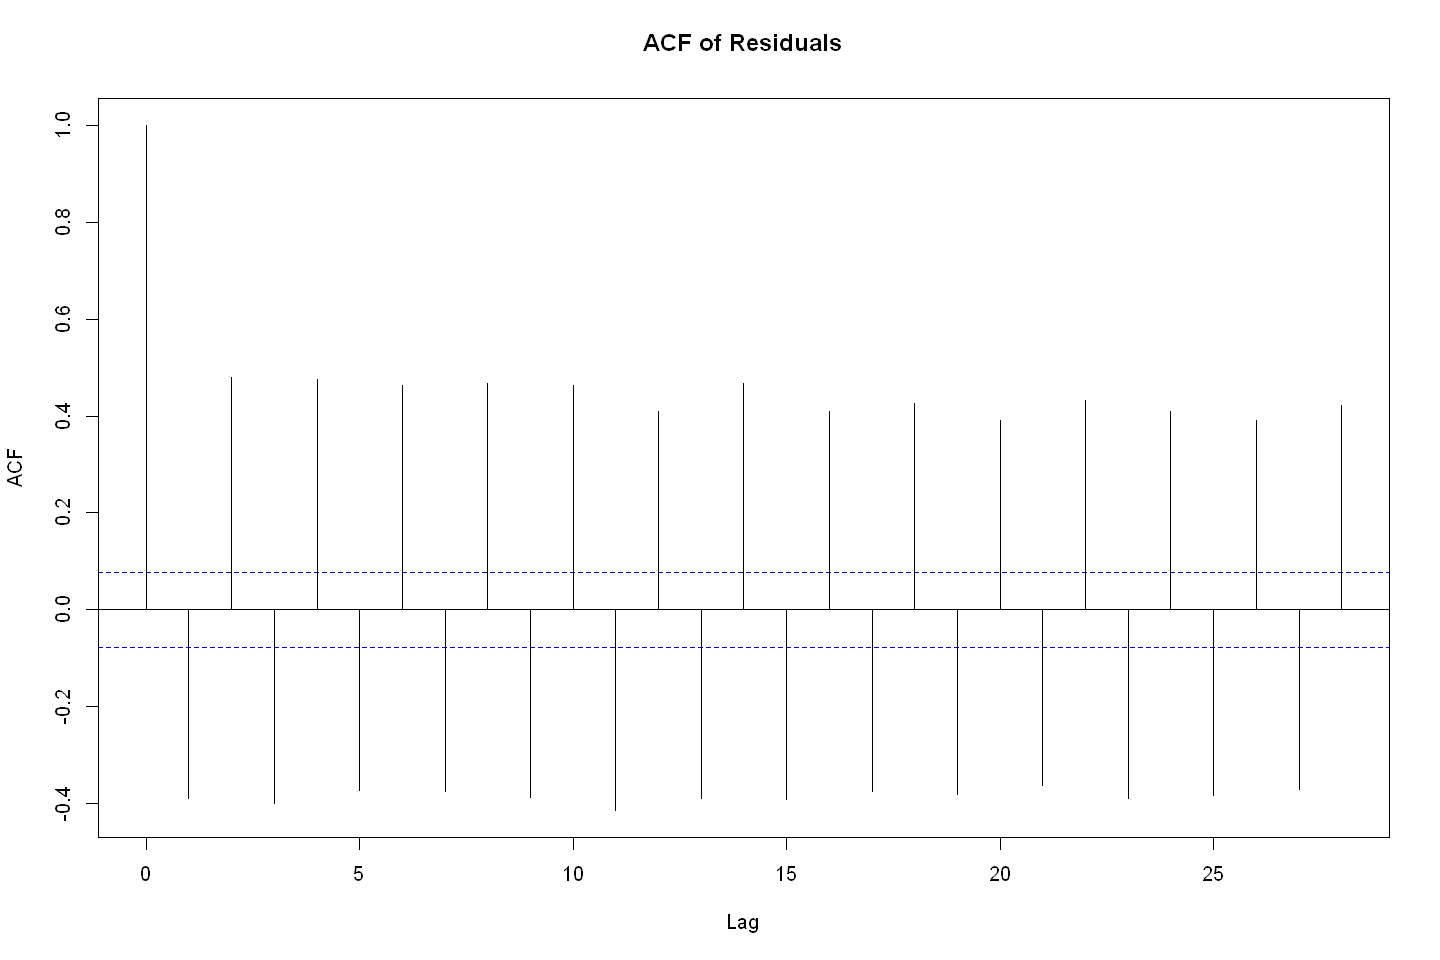

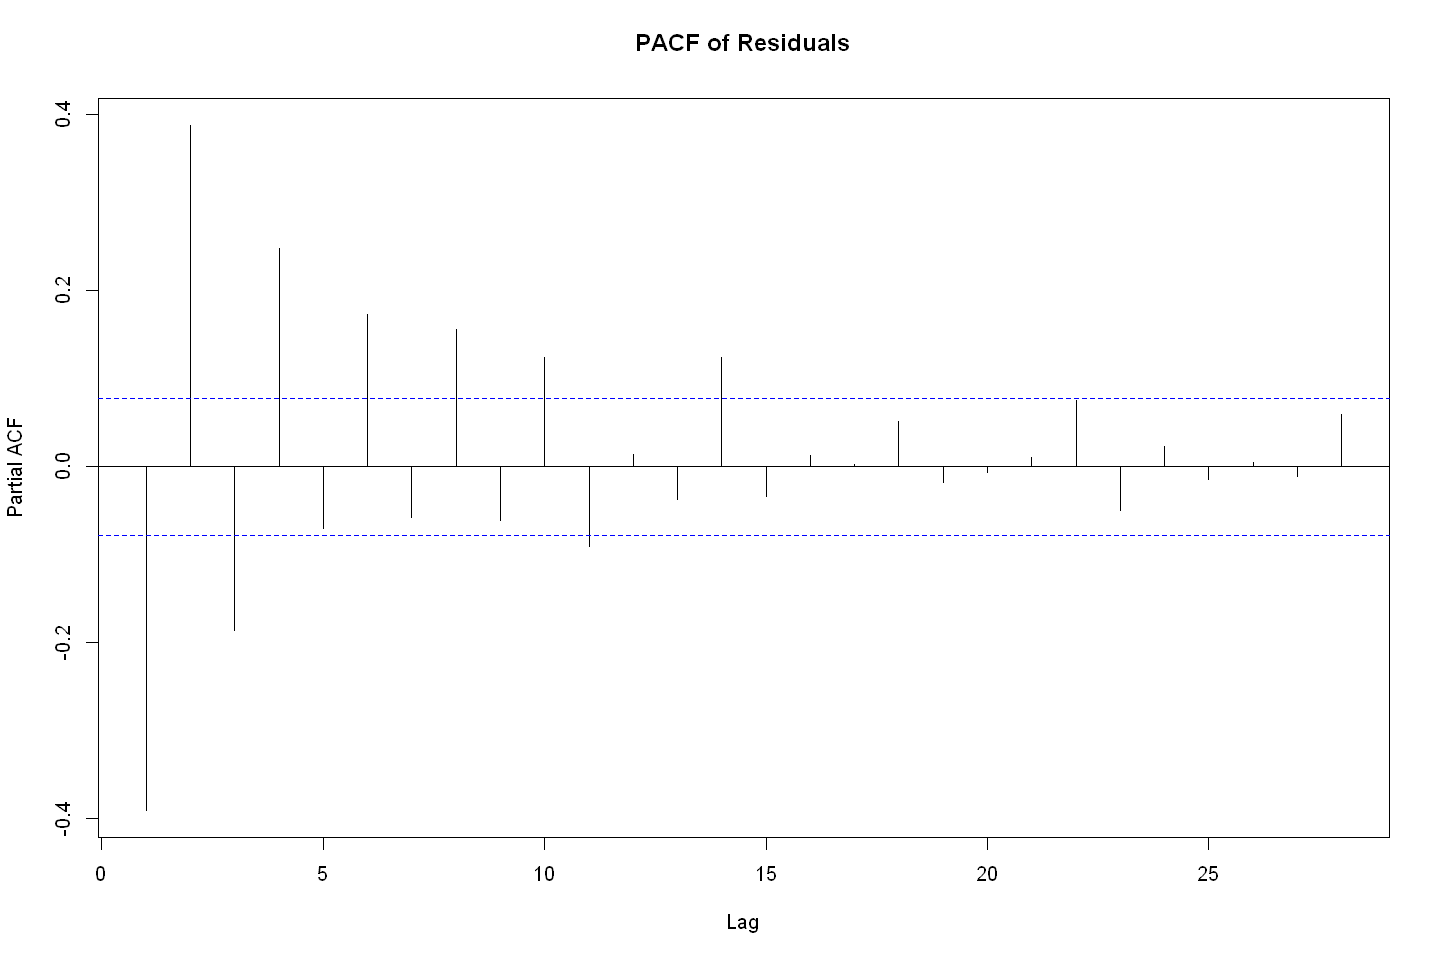

In [ ]:
filtered_dt2 <- dt[hour>=4 & hour<=5]

# Find the first nonzero observation in the 'production' column
first_nonzero_index <- which(filtered_dt2$production != 0)[1]

# Truncate the data table from the first nonzero observation onwards
truncated_dt <- filtered_dt2[first_nonzero_index:.N]
lr_model <- lm(production ~ . -production -date -hour, data = truncated_dt)

truncated_dt$residuals <- residuals(lr_model)

# Plot ACF
acf(truncated_dt$residuals, main = "ACF of Residuals")

# Plot PACF
pacf(truncated_dt$residuals, main = "PACF of Residuals")


Series: ts_residuals 
ARIMA(2,1,2)(0,1,1)[2] 

Coefficients:
          ar1      ar2      ma1      ma2     sma1
      -0.6619  -0.0104  -0.3069  -0.6872  -0.8873
s.e.   0.3420   0.0455   0.3430   0.3431   0.0259

sigma^2 = 0.01432:  log likelihood = 442.78
AIC=-873.57   AICc=-873.43   BIC=-846.86

Training set error measures:
                      ME      RMSE        MAE           MPE         MAPE
Training set 0.006330485 0.1188951 0.06610247 -885799591637 885799591934
                  MASE        ACF1
Training set 0.7423747 -0.00345314


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)(0,1,1)[2]
Q* = 1.206, df = 3, p-value = 0.7516

Model df: 5.   Total lags used: 8



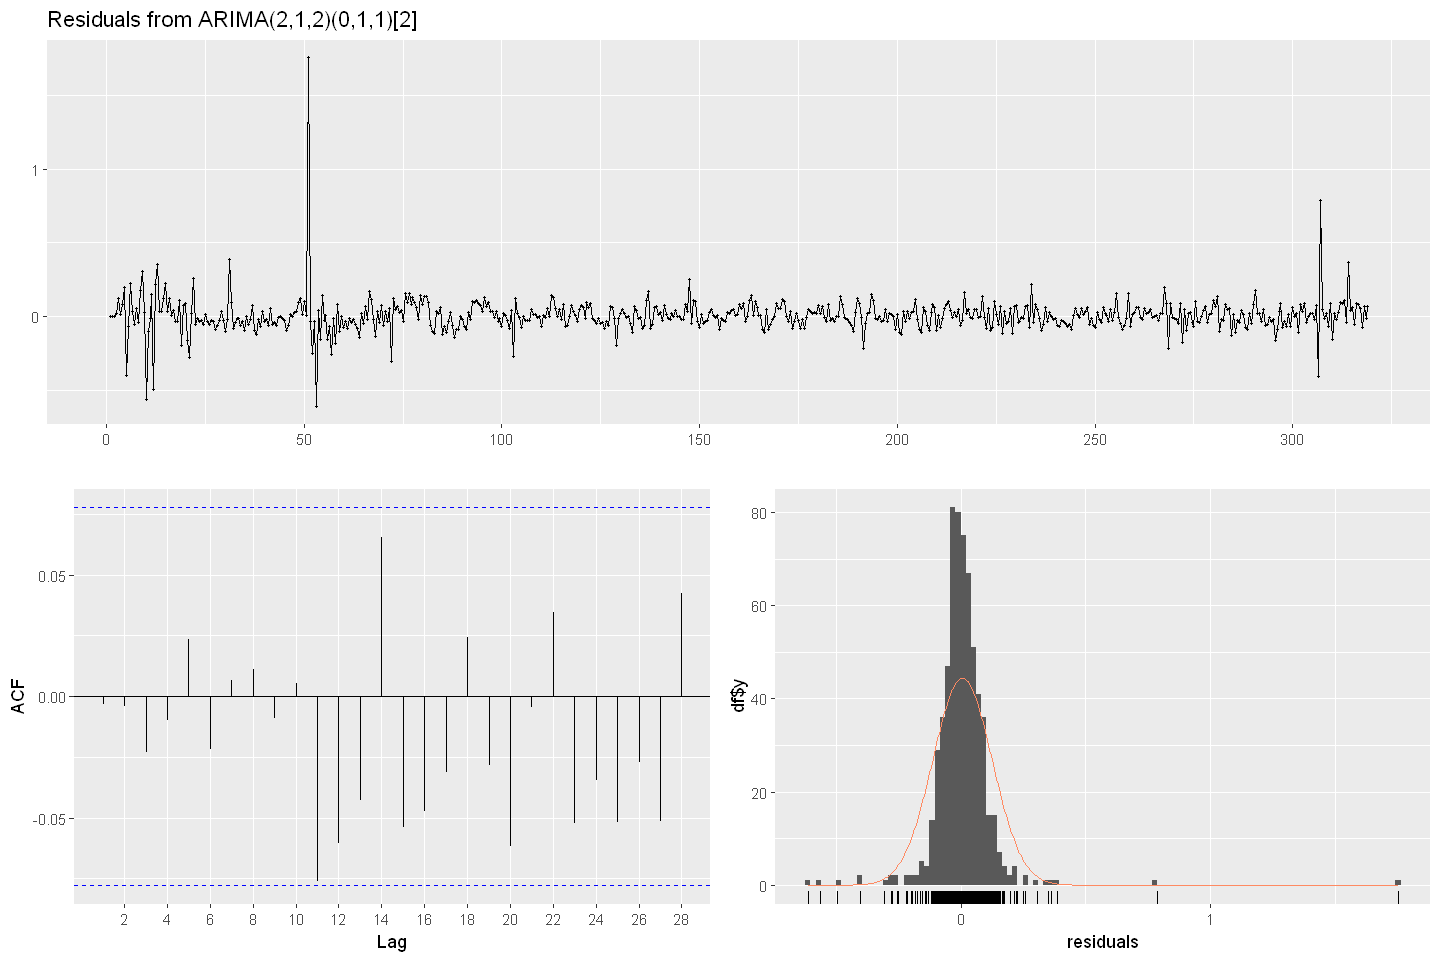

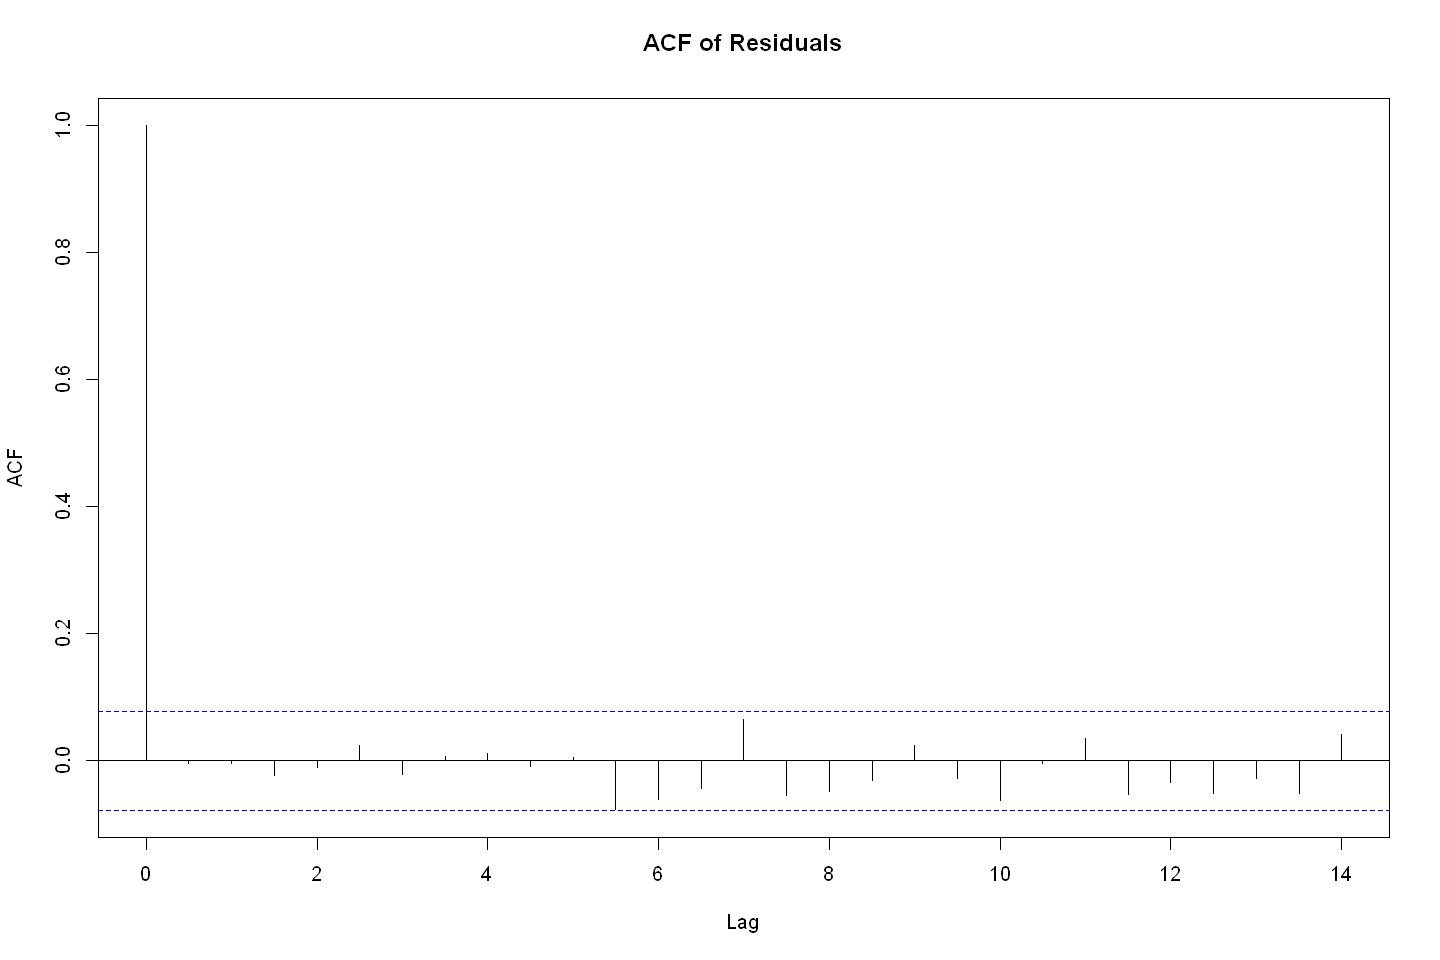

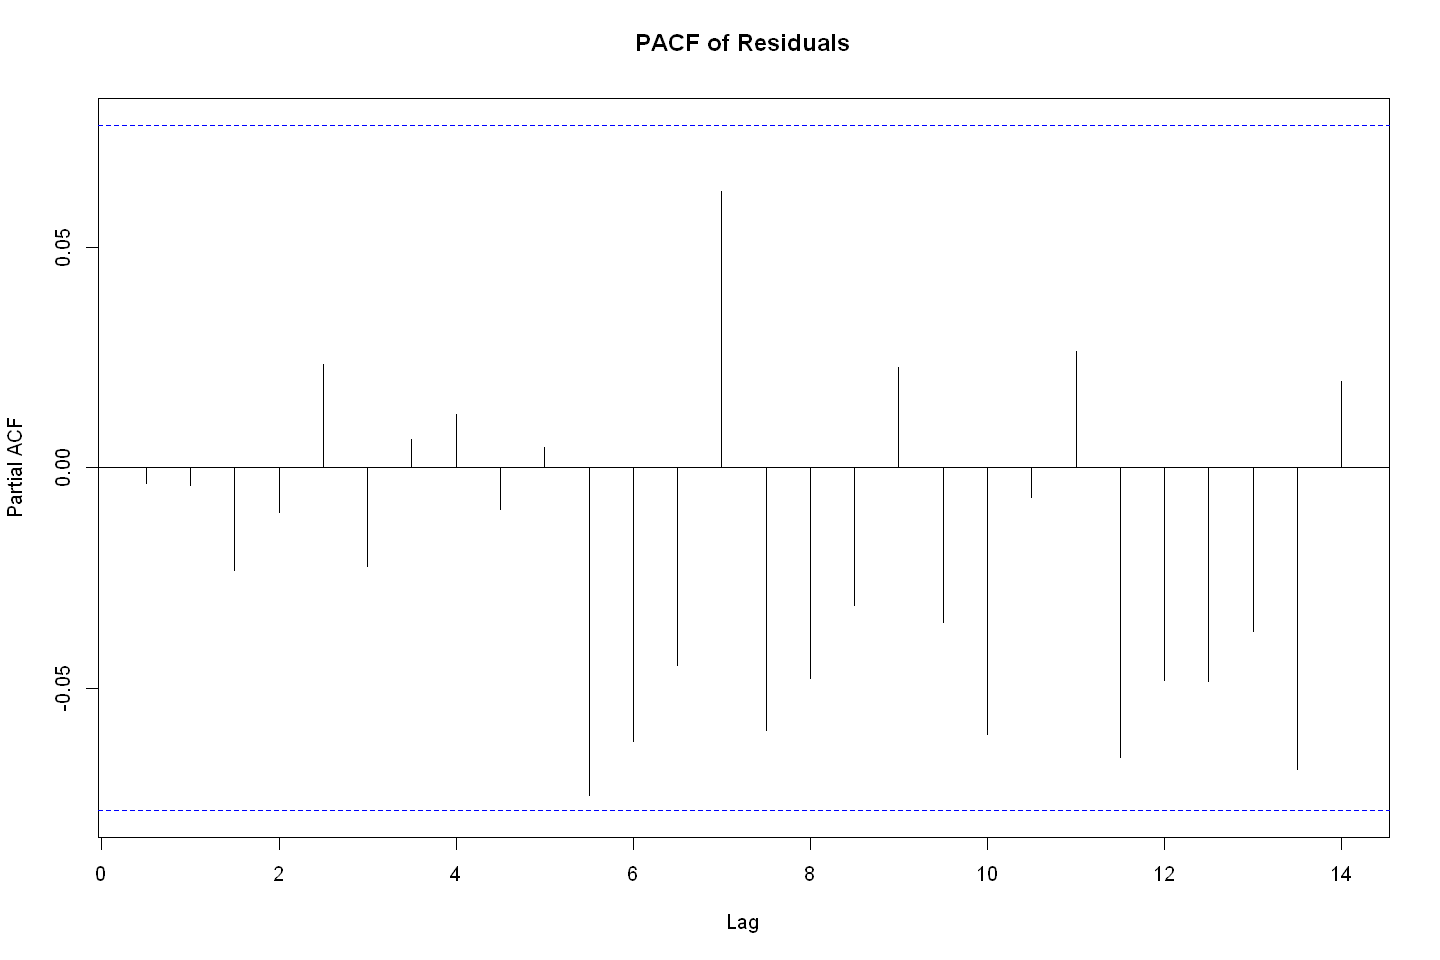

In [ ]:
ts_residuals <- ts(truncated_dt$residuals, frequency = 2)
sarima_model <- Arima(ts_residuals, order = c(2, 1, 2), seasonal=c(0,1,1))
summary(sarima_model)
checkresiduals(sarima_model)
# Plot ACF
acf(residuals(sarima_model), main = "ACF of Residuals")

# Plot PACF
pacf(residuals(sarima_model), main = "PACF of Residuals")

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


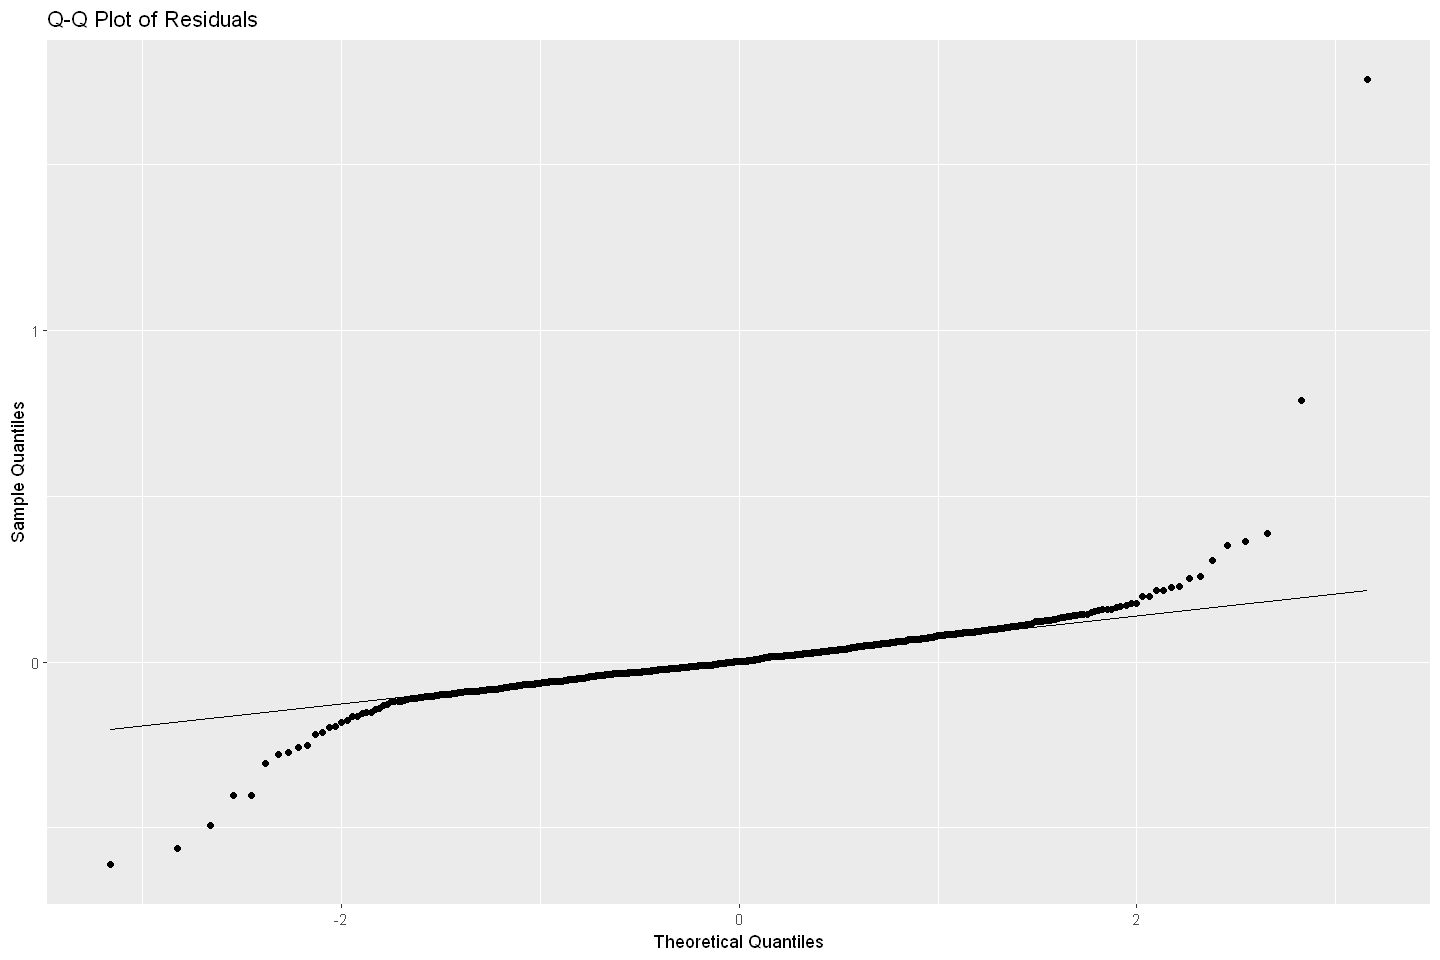

In [ ]:
residuals <- residuals(sarima_model)

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

## Hours 6, 7, 16, 17, 18

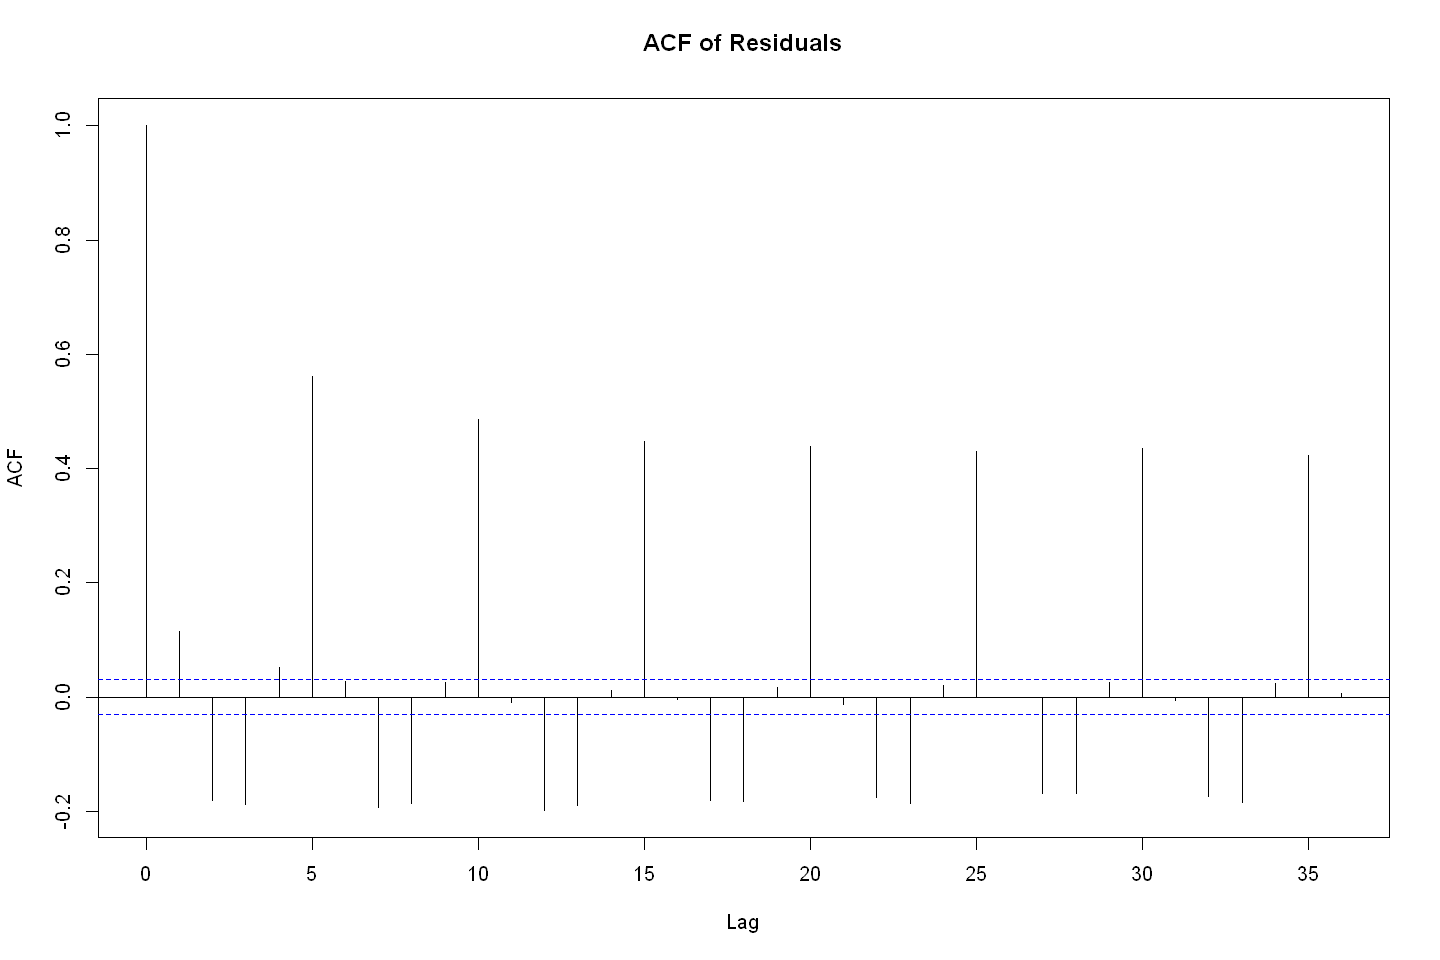

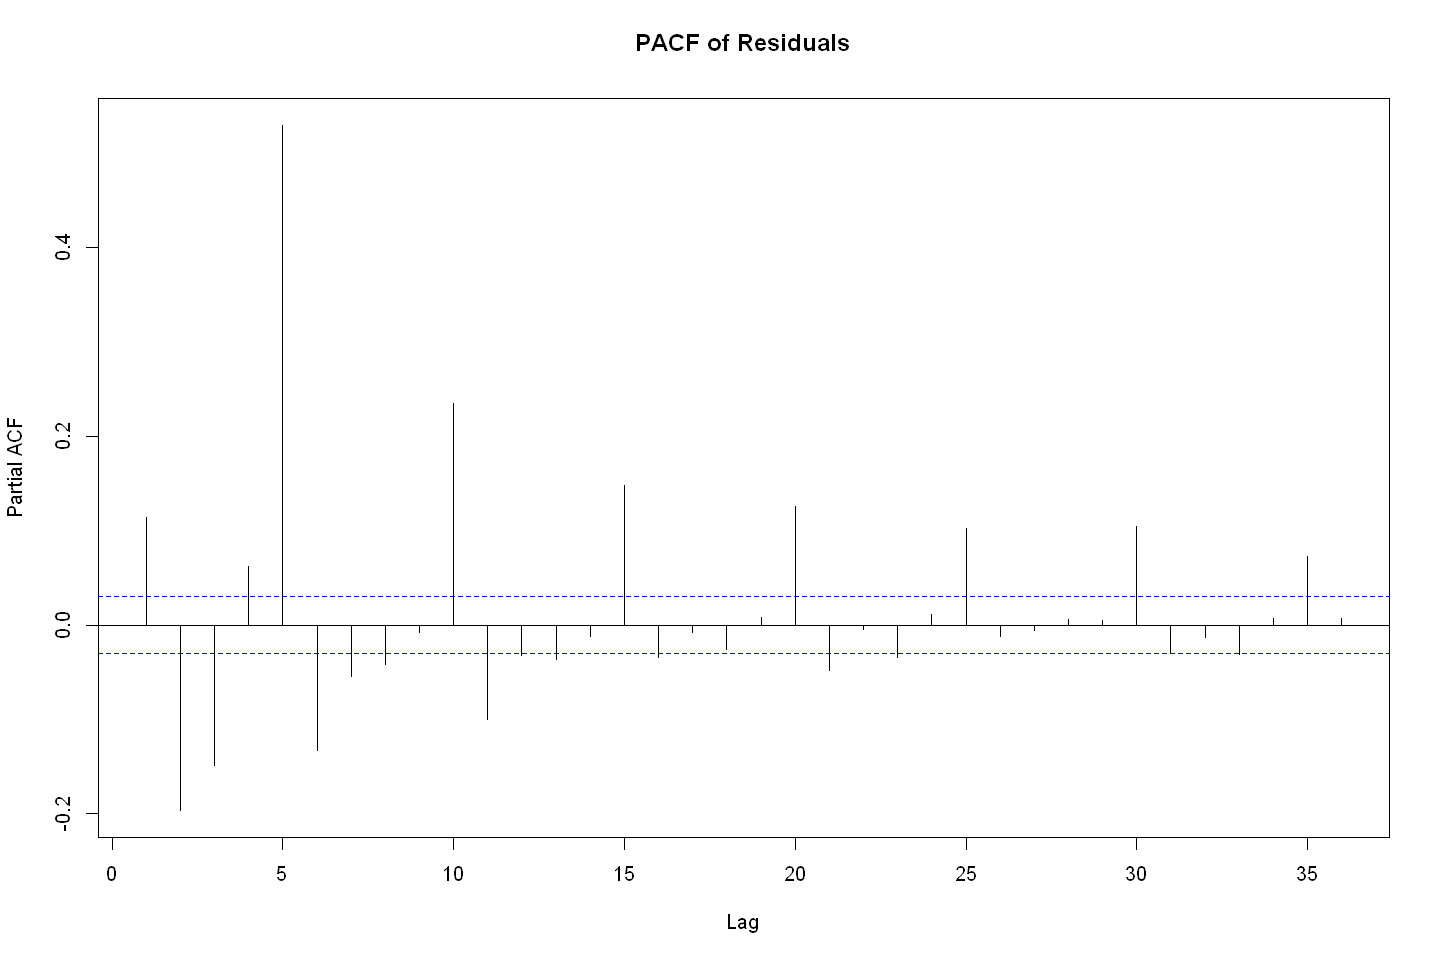

In [ ]:
# Filter data
filtered_dt3 <- dt[hour >= 16 & hour <= 18 | hour >= 6 & hour <= 7]

lr_model <- lm(production ~ . -production -date -hour, data = filtered_dt3)

filtered_dt3$residuals <- residuals(lr_model)

# Plot ACF
acf(filtered_dt3$residuals, main = "ACF of Residuals")

# Plot PACF
pacf(filtered_dt3$residuals, main = "PACF of Residuals")


Series: ts_residuals 
ARIMA(2,1,2)(0,1,1)[5] 

Coefficients:
         ar1      ar2      ma1     ma2     sma1
      0.8134  -0.1082  -1.6318  0.6318  -0.8302
s.e.  0.2289   0.0305   0.2325  0.2325   0.0119

sigma^2 = 1.144:  log likelihood = -6257.88
AIC=12527.77   AICc=12527.79   BIC=12565.83

Training set error measures:
                       ME    RMSE       MAE      MPE     MAPE      MASE
Training set -0.002846315 1.06838 0.7223458 700.0109 877.3963 0.8211095
                    ACF1
Training set 0.005913185


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)(0,1,1)[5]
Q* = 80.577, df = 5, p-value = 6.661e-16

Model df: 5.   Total lags used: 10



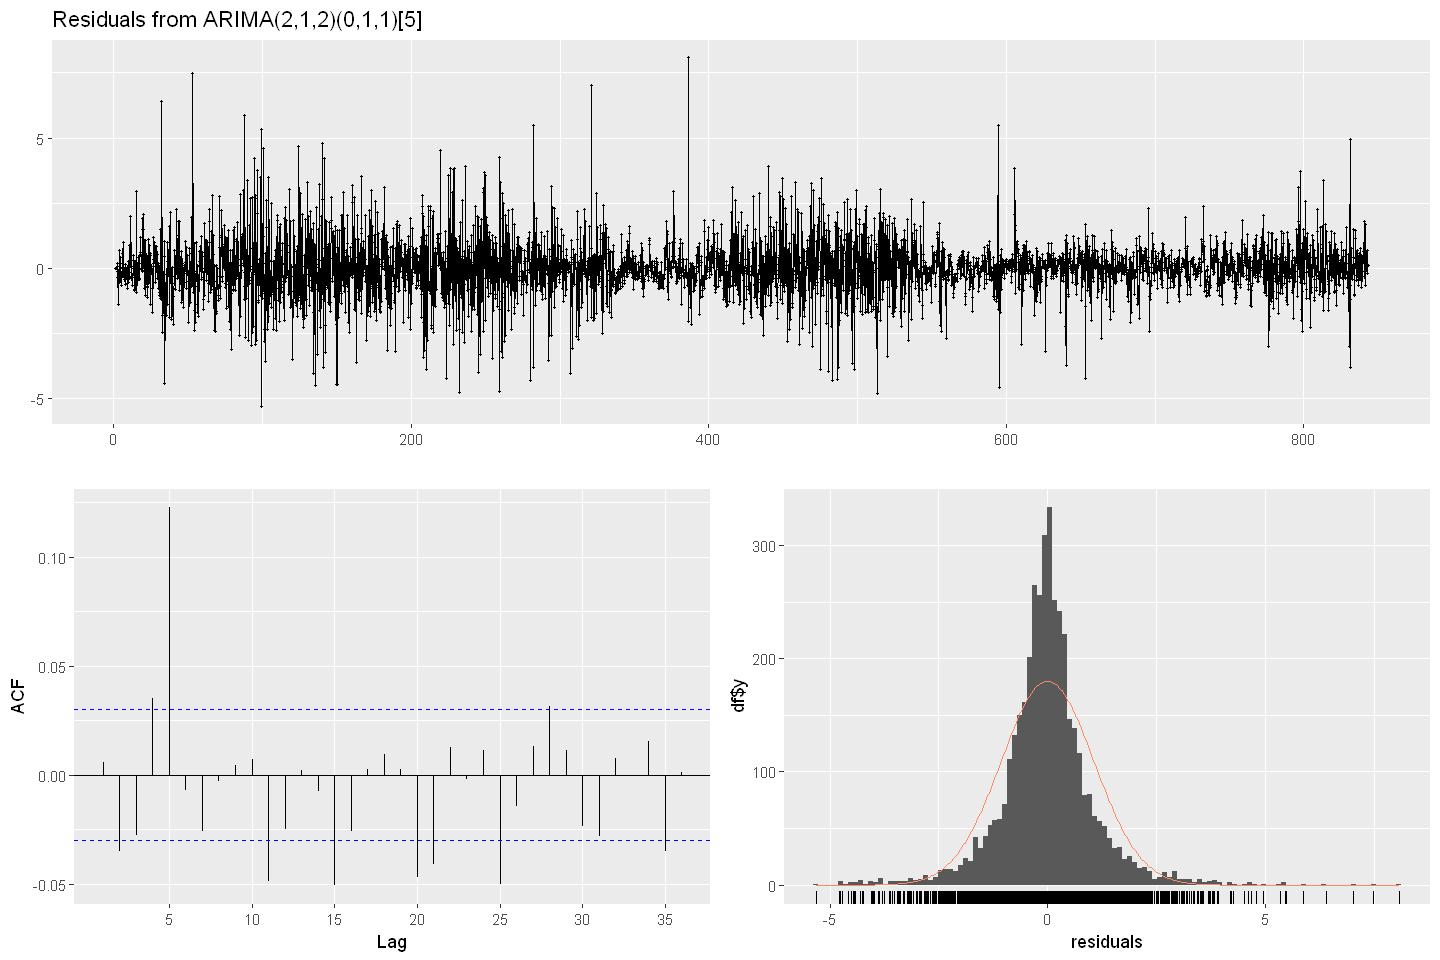

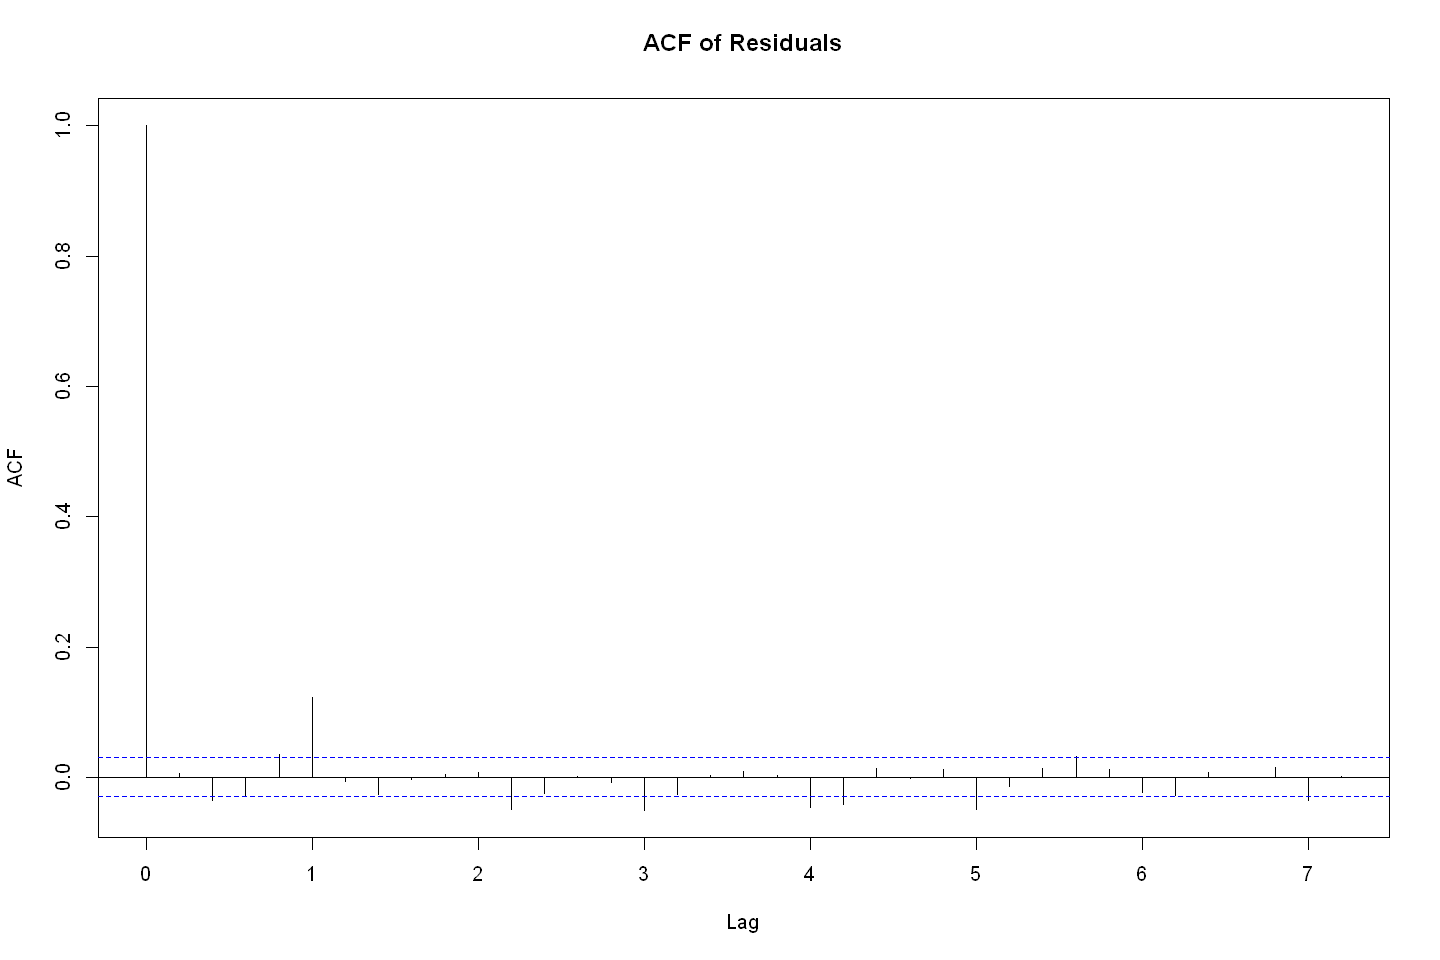

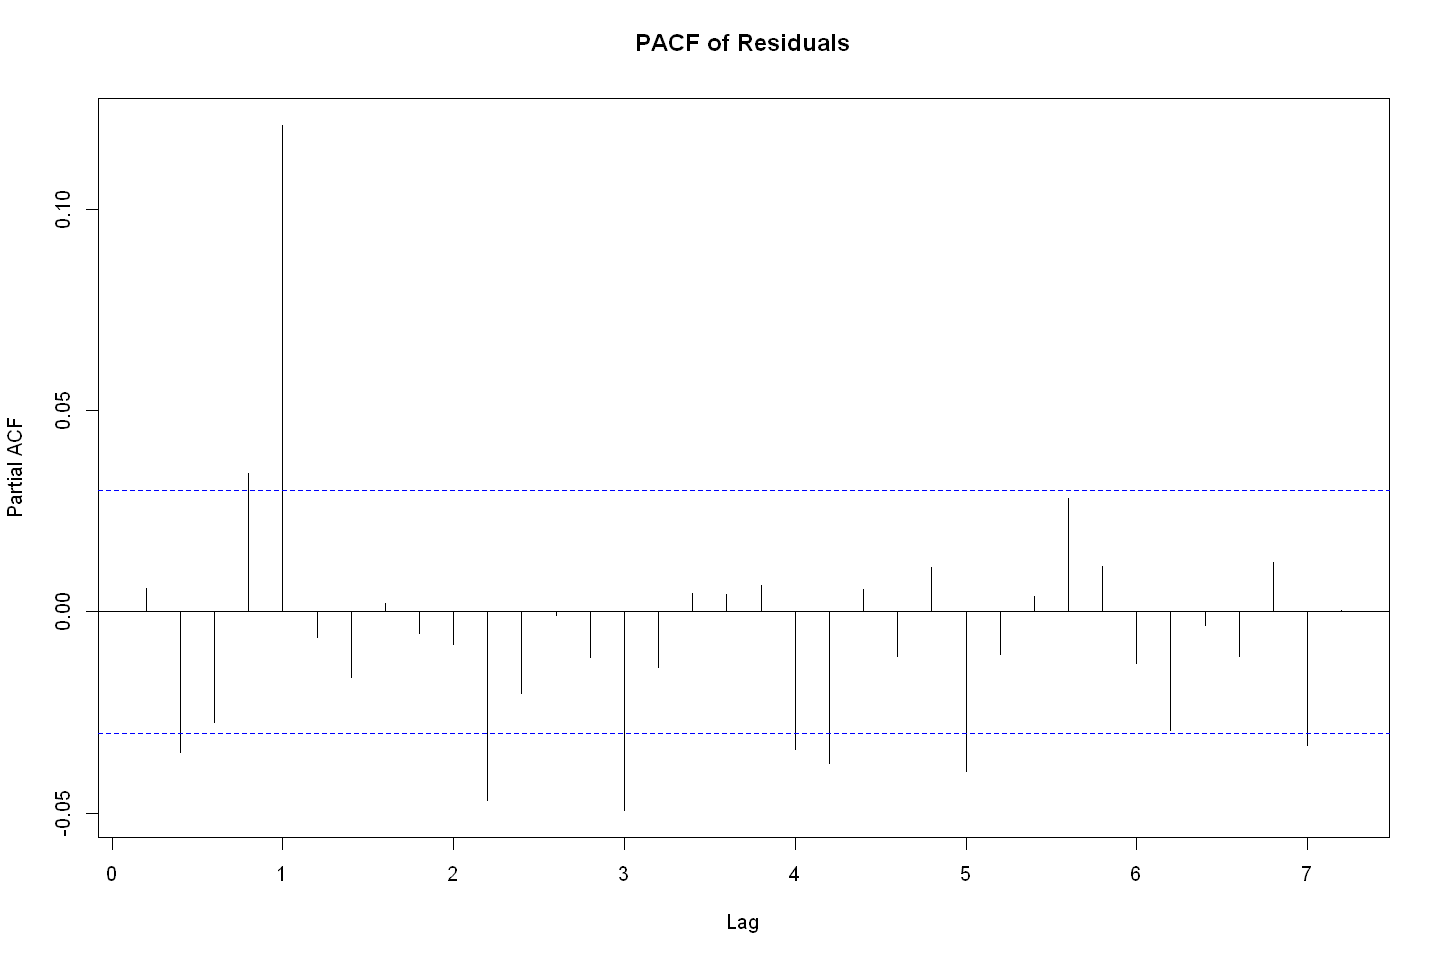

In [ ]:
ts_residuals <- ts(filtered_dt3$residuals, frequency = 5)
sarima_model <- Arima(ts_residuals, order = c(2, 1, 2), seasonal=c(0,1,1))
summary(sarima_model)
checkresiduals(sarima_model)
# Plot ACF
acf(residuals(sarima_model), main = "ACF of Residuals")

# Plot PACF
pacf(residuals(sarima_model), main = "PACF of Residuals")

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


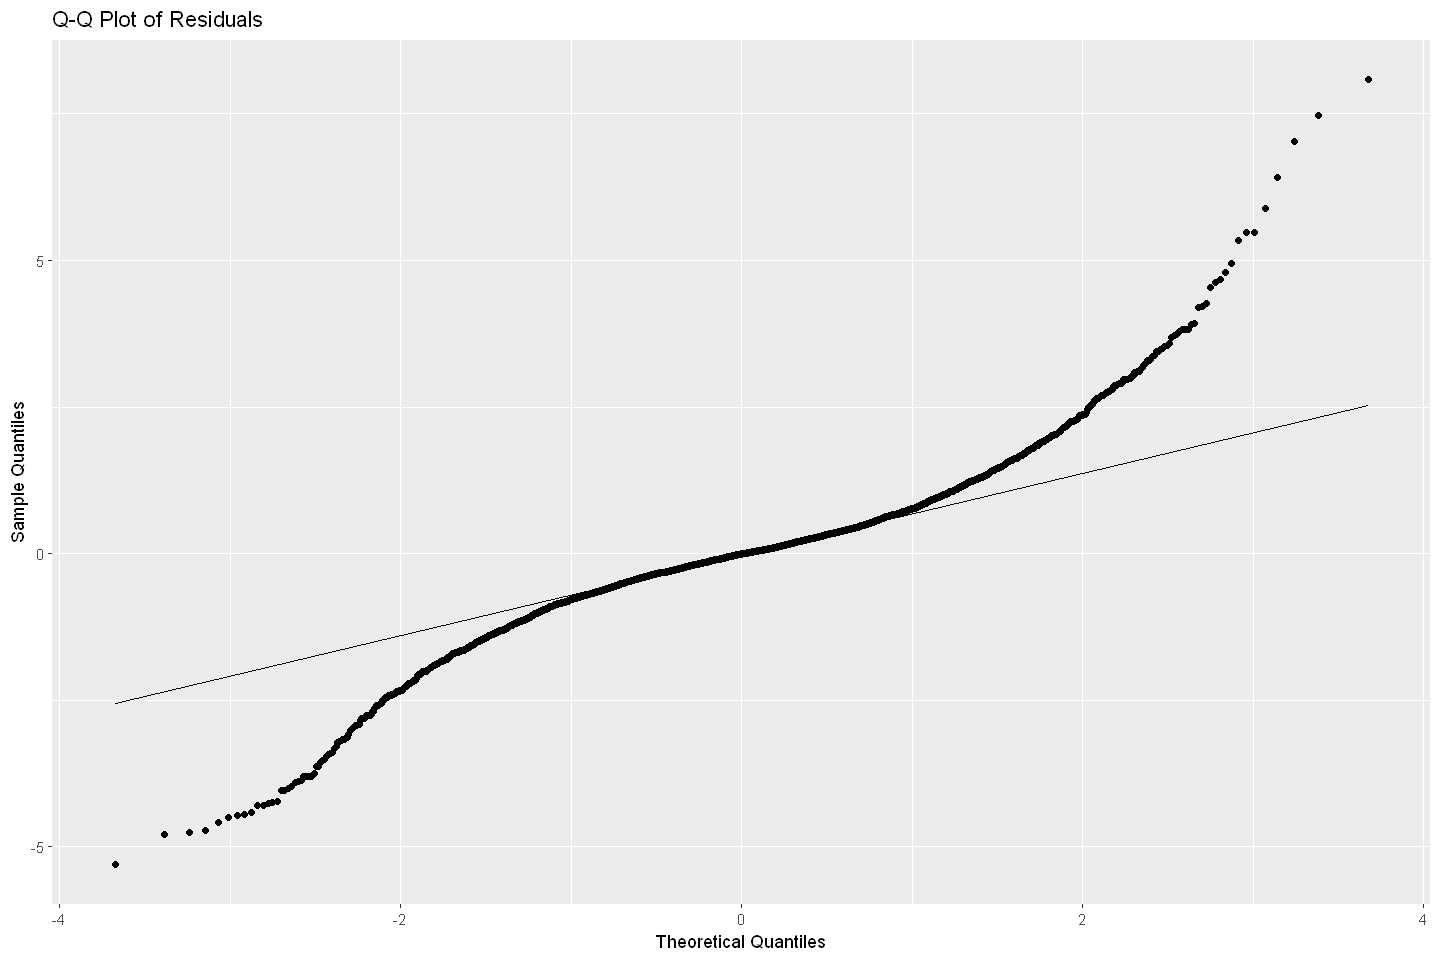

In [ ]:
residuals <- residuals(sarima_model)

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

## Prediction

In [ ]:
specified_date <- '2022-05-25'

data <- filter(filtered_dt3, date == specified_date & hour %in% c(6,7,16,17,18))
pred <- arima_model %>% predict(data)
print(pred)


# MODEL 2

# REGRESSION TREE

## Hours 8, 9, 10 ,11, 12, 13, 14, 15

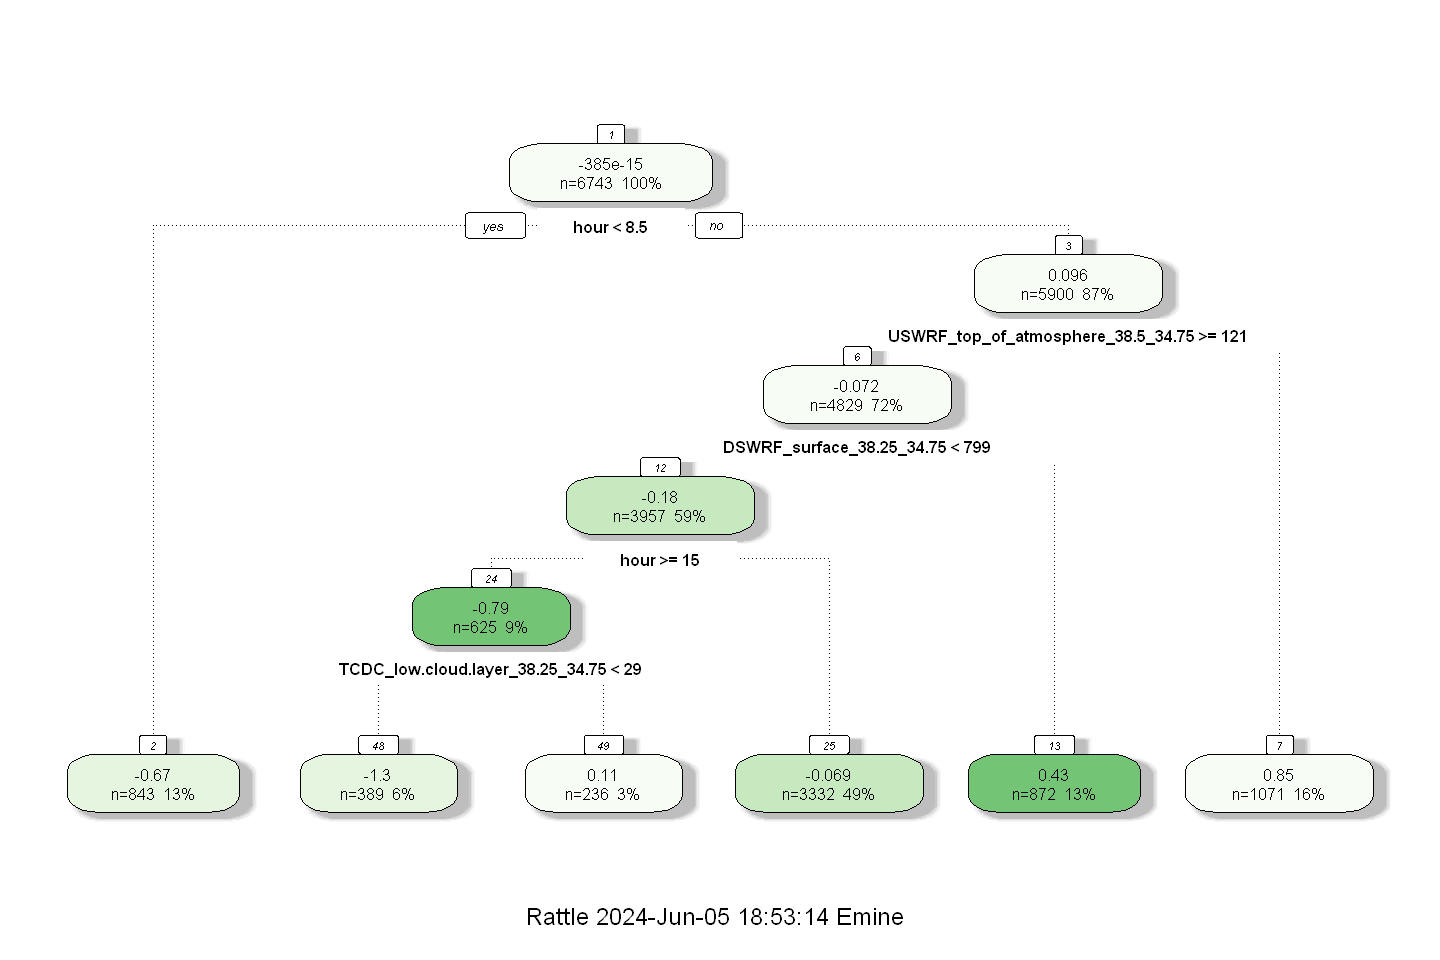

In [ ]:
# Filter data
filtered_dt4 <- dt[hour>=8 & hour<=15]

filtered_dt4[production > 10, production := 10]
filtered_dt4[, categorical_month := as.character(month(date, label = TRUE))]

lr_model_with_hour_month <- lm(production ~ . -production -date , data = filtered_dt4)



# Forecast and calculate residuals
filtered_dt4[, predicted_lm := predict(lr_model_with_hour_month, filtered_dt4)]
filtered_dt4[, residual := production - predicted_lm]

drop_vars <- c('production', 'date', 'predicted_lm')
fit_res_tree <- rpart(residual ~ ., filtered_dt4[,-drop_vars, with = FALSE], method = 'anova', control = rpart.control(cp = 0.01, maxdepth =30))
fancyRpartPlot(fit_res_tree)


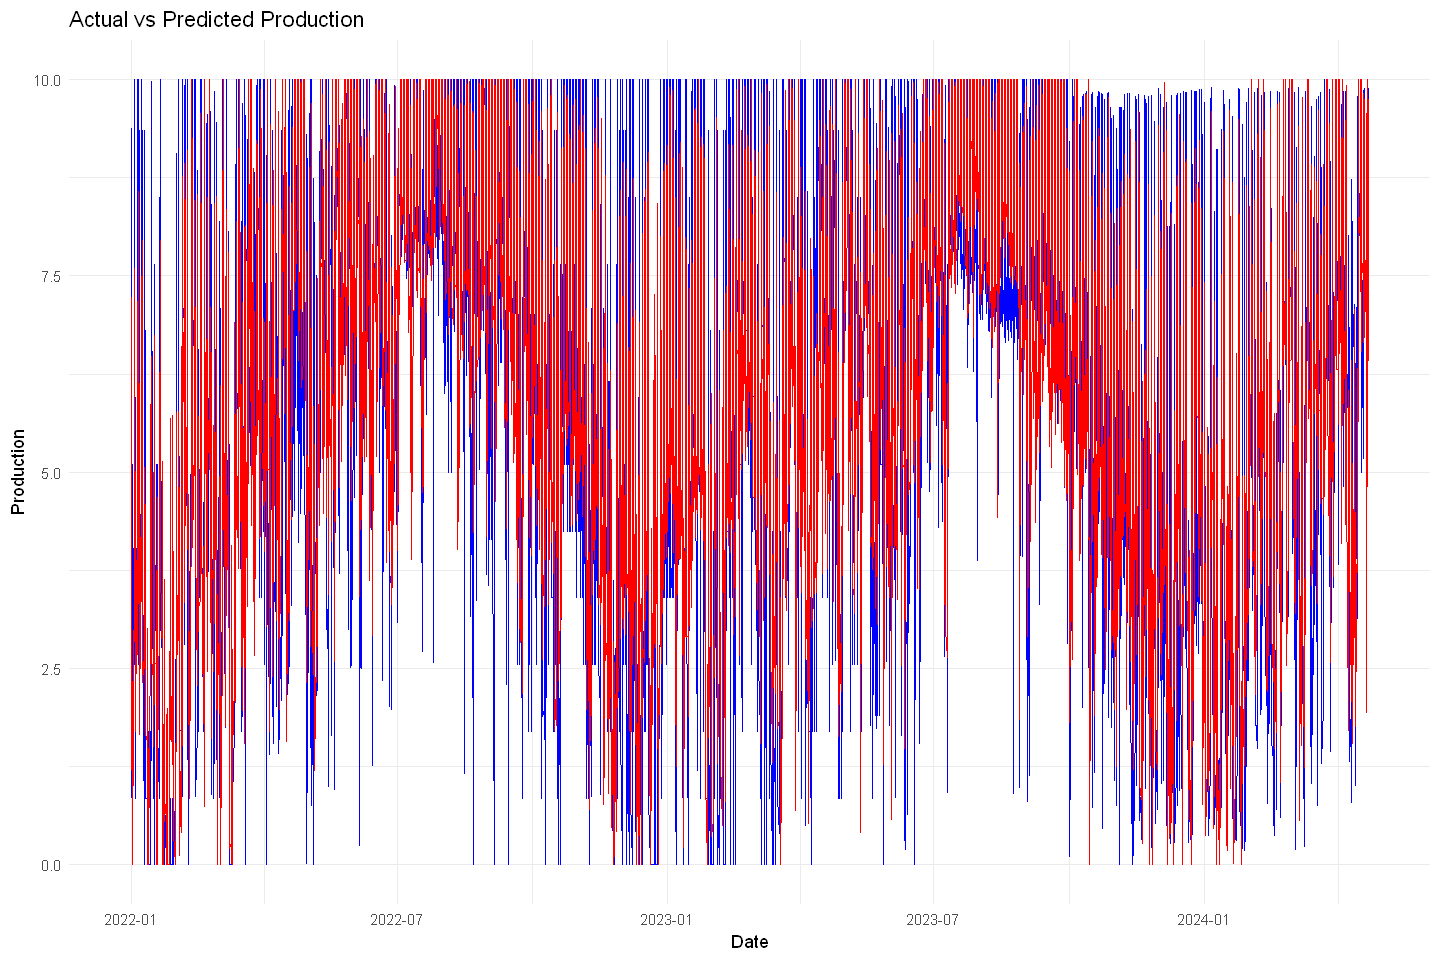

In [ ]:
# Predict the residuals using the decision tree
filtered_dt4[, predicted_tree := predict(fit_res_tree, filtered_dt4)]

# Combine predictions
filtered_dt4[, final_prediction := predicted_lm + predicted_tree]

# Replace negative predictions with zero
filtered_dt4[final_prediction < 0, final_prediction := 0]
filtered_dt4[final_prediction > 10, final_prediction := 10]

# Visualize combined predictions
ggplot(filtered_dt4) +
  geom_line(aes(x = date, y = production), color = 'blue') +
  geom_line(aes(x = date, y = final_prediction), color = 'red') +
  theme_minimal() +
  labs(title = "Actual vs Predicted Production", x = "Date", y = "Production")

In [ ]:
# Calculate and print evaluation metrics for combined model
rmse_value <- RMSE(filtered_dt4$production, filtered_dt4$final_prediction)
mae_value <- MAE(filtered_dt4$production, filtered_dt4$final_prediction)

print(rmse_value)
print(mae_value)


[1] 1.847873
[1] 1.348743


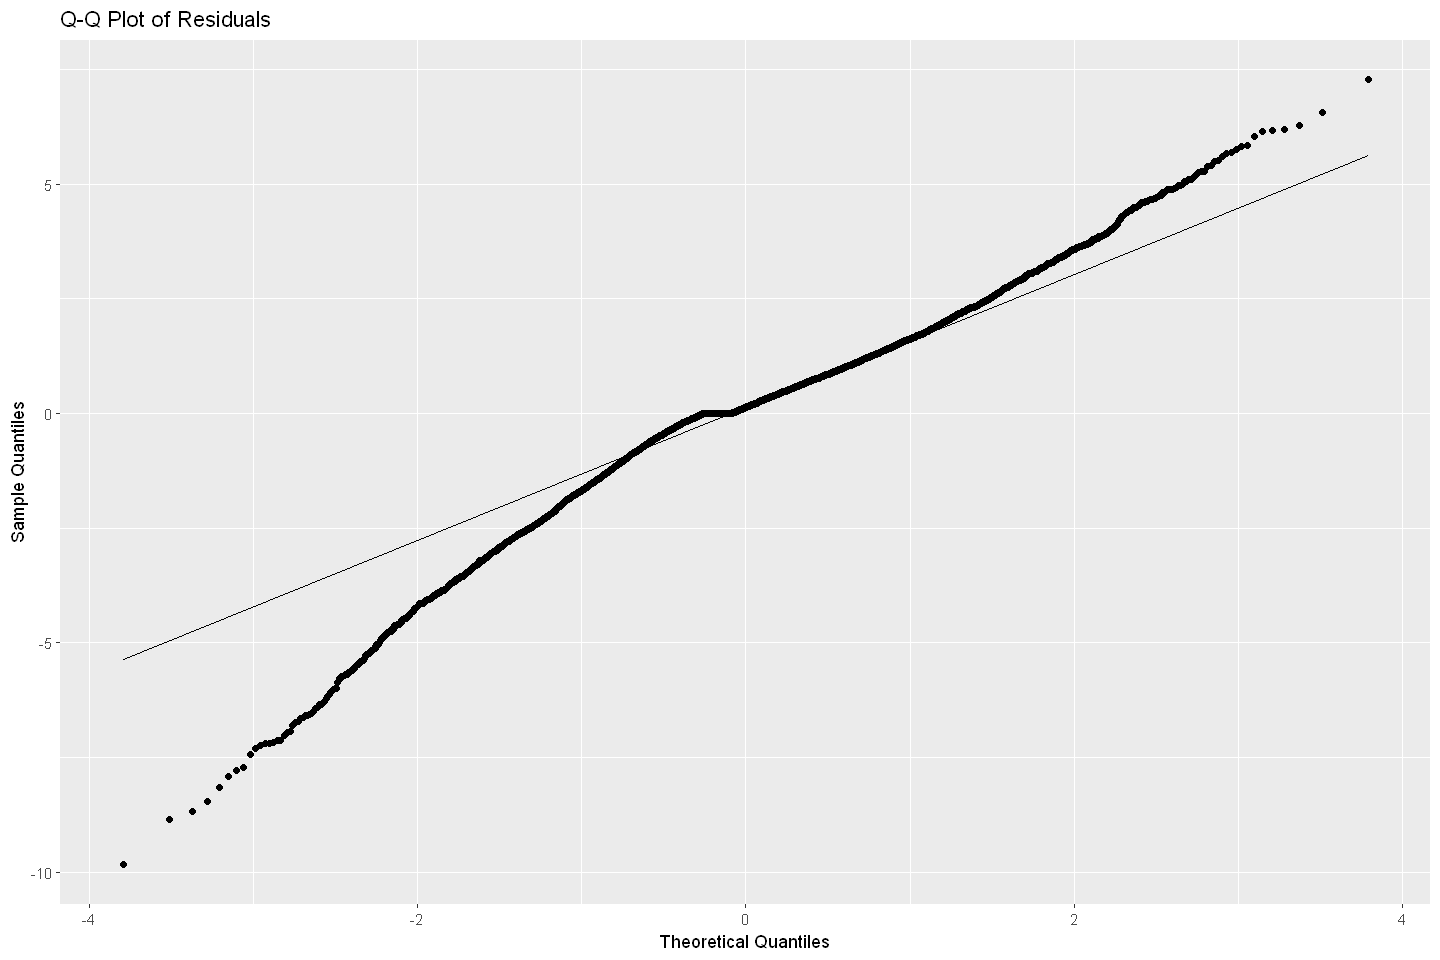

In [ ]:
actual <- filtered_dt4$production
prediction<- filtered_dt4$final_prediction

residuals <- actual - prediction

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

In [ ]:

test_dates <- unique(test_dates)

# Create a tibble with all combinations of test dates and hours
all_results <- expand.grid(date = test_dates, hour = 8:15) %>% as_tibble()

# Add the actual production values for the corresponding date and hour
all_results <- all_results %>%
left_join(filtered_dt, by = c("date", "hour")) %>%
rename(actual = production)


all_results <- all_results %>%
select(date, hour, actual) %>%
distinct()

forecast_ahead <- 1

results <- data.frame()
preds <- c()

i = 1
for (i in 1:length(test_dates)){
  for (j in 8:15){
      current_date <- test_dates[i] + (-forecast_ahead)
      train_data <- data %>% filter(date <= current_date)
      test_data <- data %>% filter(date == test_dates[i] & hour==j)
      model <- lm(production ~ . -production -date -hour, data = train_data)
      pred <- model %>% predict(test_data)
      preds <- c(preds,pred)
      train_res <- model %>% residuals()
      drop_vars <- c('production', 'date', 'predicted_lm')
      fit_res_tree <- rpart(residual ~ ., filtered_dt4[,-drop_vars, with = FALSE], method = 'anova', control = rpart.control(cp = 0.01, maxdepth =30))
      model_res <- fancyRpartPlot(fit_res_tree)
      test_res_pred <- forecast(model_res,h=forecast_ahead)$mean[1]
      pred <- predict(model,test_data) + test_res_pred
      preds <- c(preds,pred)
      result <- cbind(
          date=test_dates[i],
          actual=test_data$Consumption,
          pred=pred
  )
results <- rbind(results,result)
}}
results <- results %>% tibble()
all_results <- all_results %>% mutate(M2 = preds)
performance <- cbind(model="M3",accu(results$actual,results$pred))

all_results %>% head()
performance

## Hours 4, 5

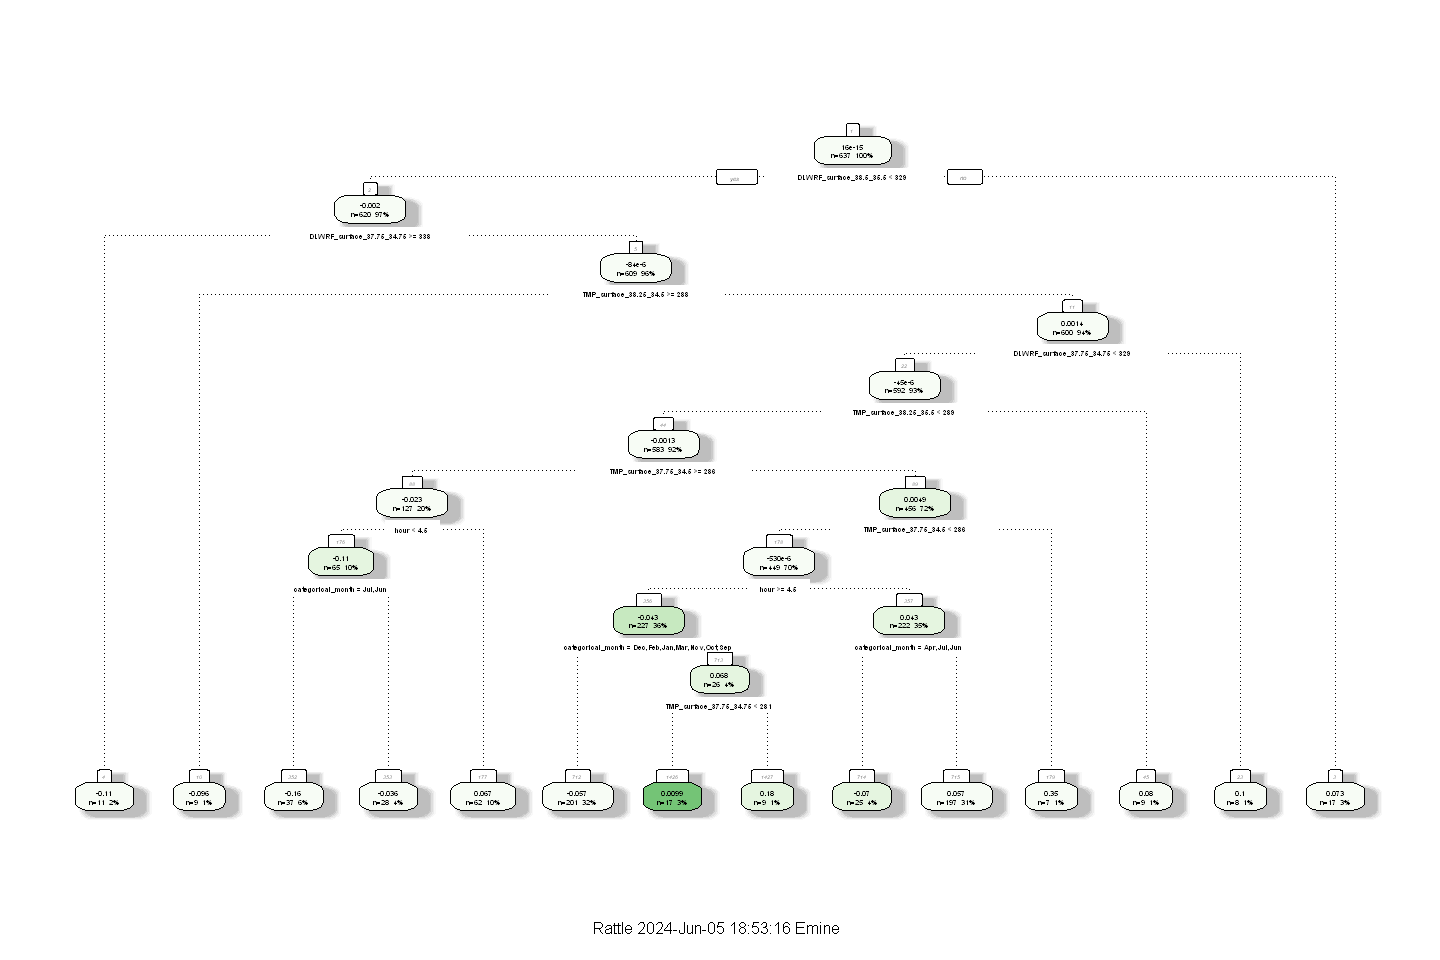

In [ ]:
# Filter data
filtered_dt5 <- dt[hour>=4 & hour<=5]

filtered_dt5[production > 10, production := 10]
filtered_dt5[, categorical_month := as.character(month(date, label = TRUE))]


# Find the first nonzero observation in the 'production' column
first_nonzero_index <- which(filtered_dt2$production != 0)[1]

# Truncate the data table from the first nonzero observation onwards
truncated_dt <- filtered_dt5[first_nonzero_index:.N]

lr_model_with_hour_month <- lm(production ~ . -production -date , data = truncated_dt)


# Forecast and calculate residuals
truncated_dt[, predicted_lm := predict(lr_model_with_hour_month, truncated_dt)]
truncated_dt[, residual := production - predicted_lm]

drop_vars <- c('production', 'date', 'predicted_lm')
fit_res_tree <- rpart(residual ~ ., truncated_dt[,-drop_vars, with = FALSE], method = 'anova', control = rpart.control(cp = 0.01, maxdepth =30))
fancyRpartPlot(fit_res_tree)

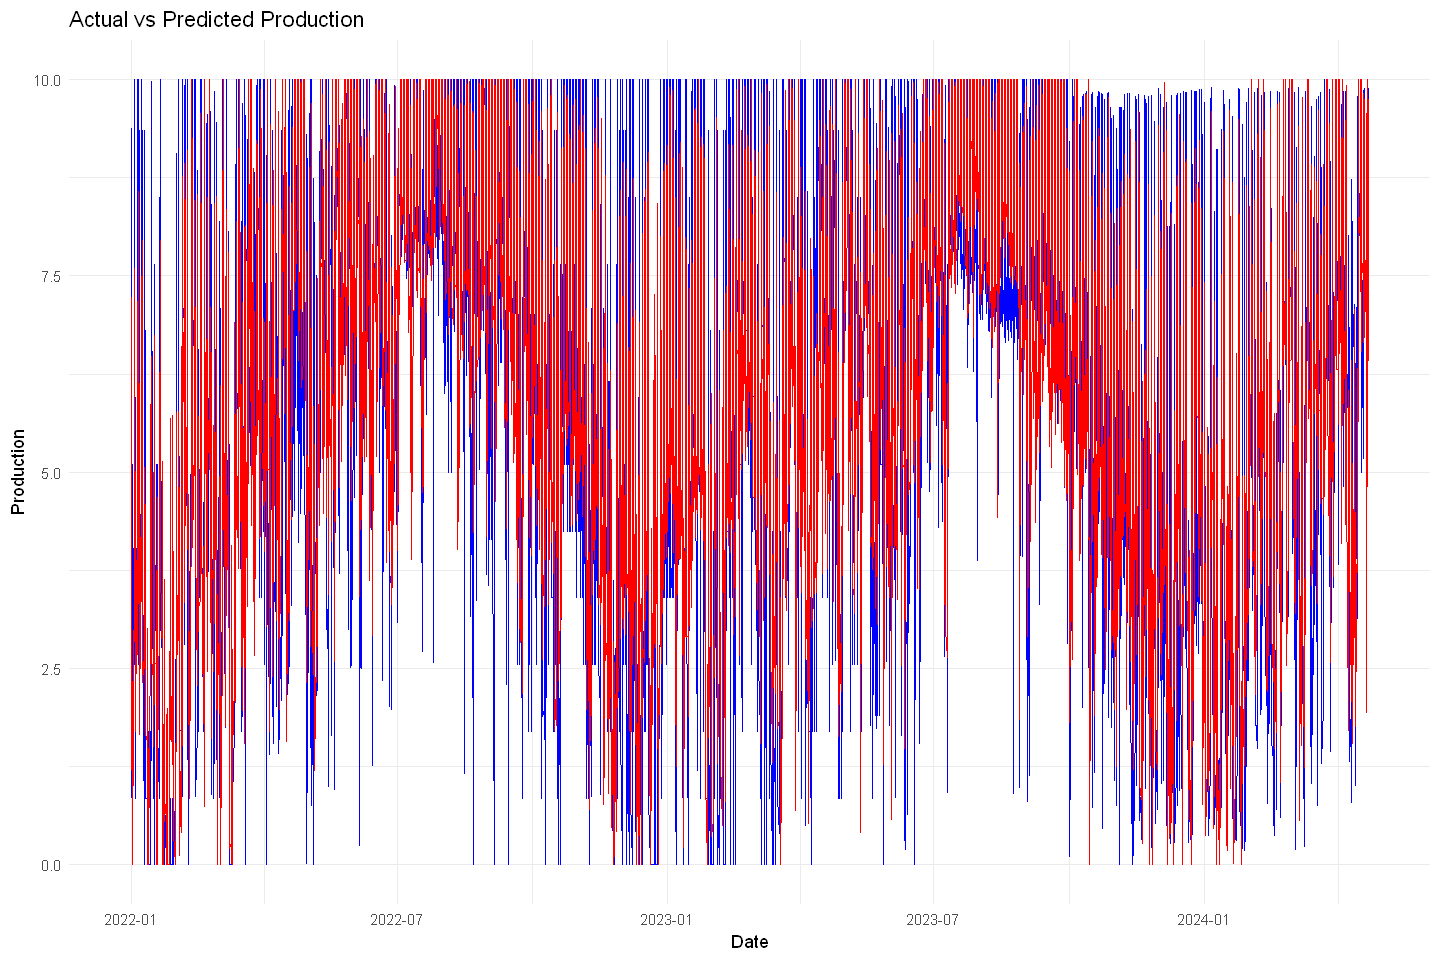

In [ ]:
# Predict the residuals using the decision tree
truncated_dt[, predicted_tree := predict(fit_res_tree, truncated_dt)]

# Combine predictions
truncated_dt[, final_prediction := predicted_lm + predicted_tree]

# Replace negative predictions with zero
truncated_dt[final_prediction < 0, final_prediction := 0]
truncated_dt[final_prediction > 10, final_prediction := 10]

# Visualize combined predictions
ggplot(filtered_dt4) +
  geom_line(aes(x = date, y = production), color = 'blue') +
  geom_line(aes(x = date, y = final_prediction), color = 'red') +
  theme_minimal() +
  labs(title = "Actual vs Predicted Production", x = "Date", y = "Production")

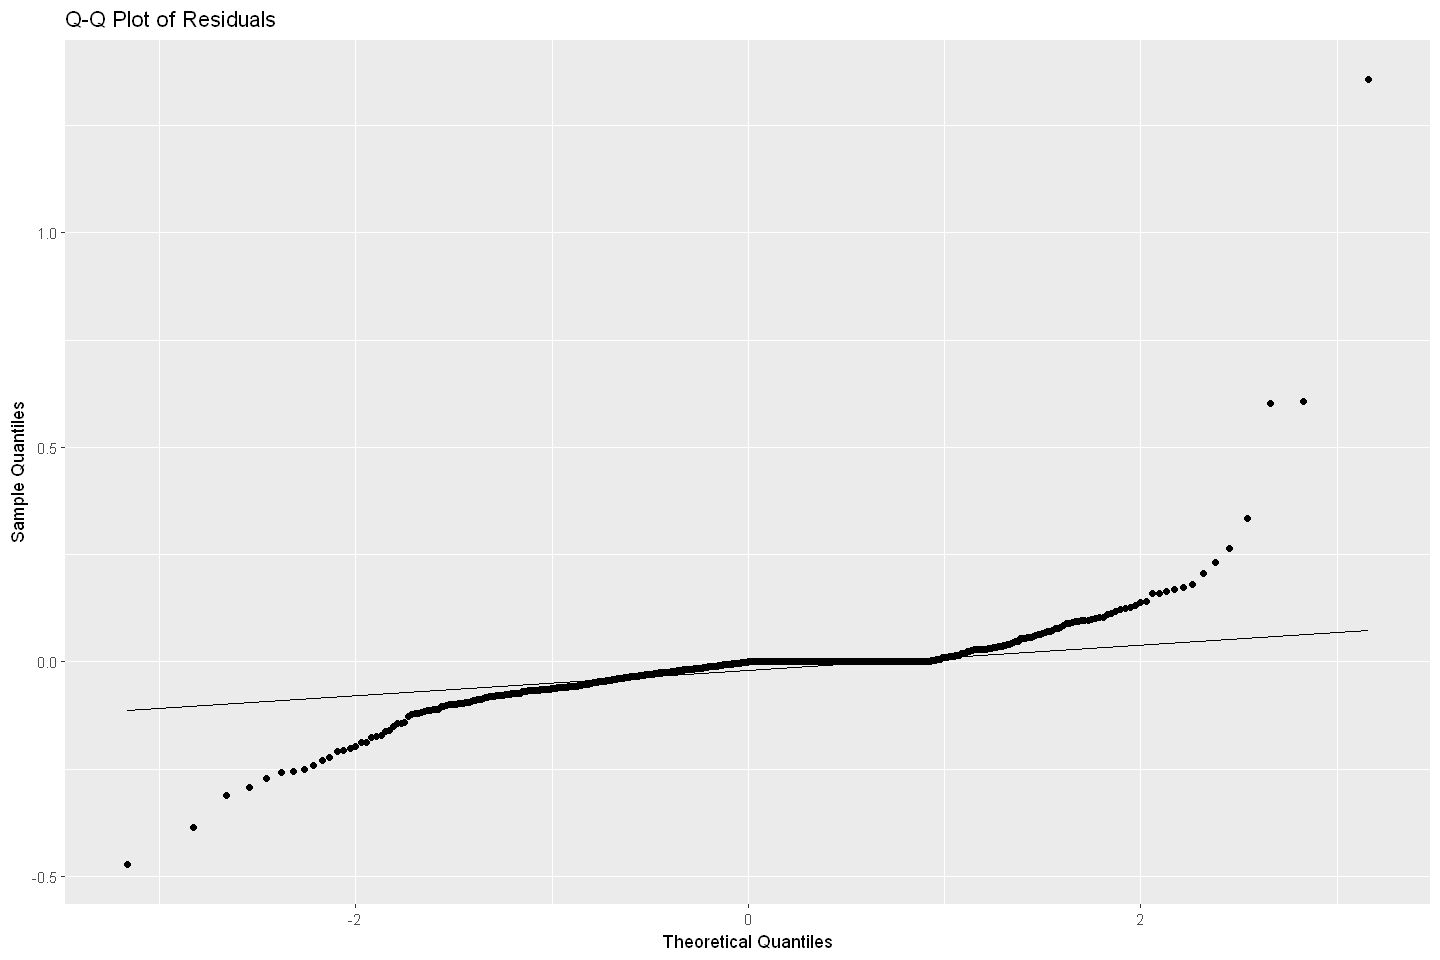

In [ ]:
actual <- truncated_dt$production
prediction <- truncated_dt$final_prediction

residuals <- actual - prediction

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

## Hours 6, 7, 16, 17, 18

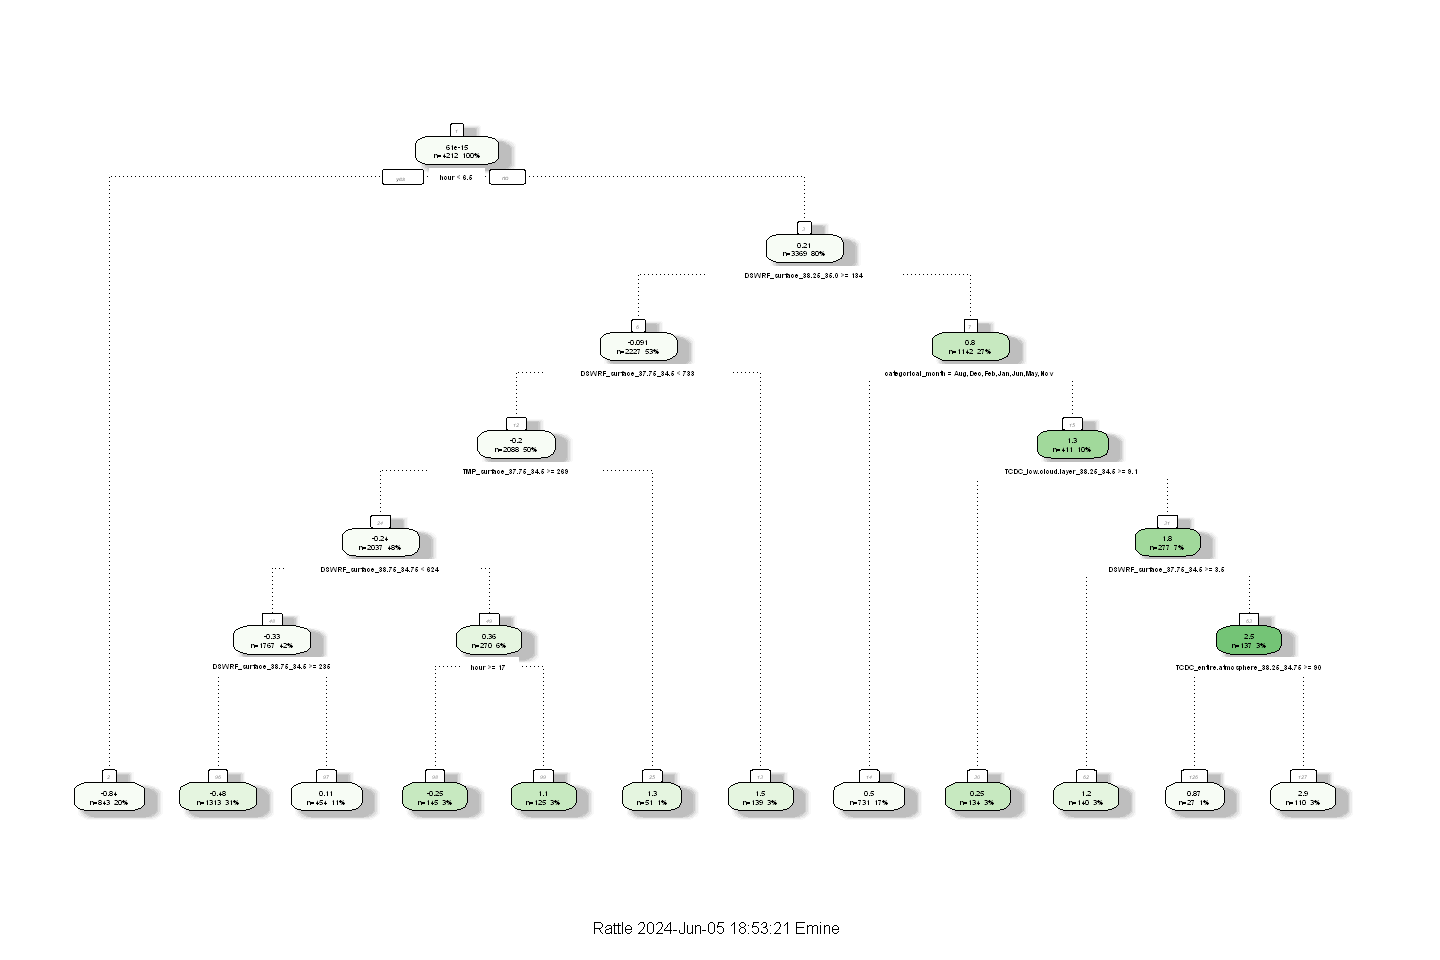

In [ ]:
# Filter data
filtered_dt6 <- dt[hour >= 16 & hour <= 18 | hour >= 6 & hour <= 7]

filtered_dt6[production > 10, production := 10]
filtered_dt6[, categorical_month := as.character(month(date, label = TRUE))]


lr_model_with_hour_month <- lm(production ~ . -production -date , data = filtered_dt6)


# Forecast and calculate residuals
filtered_dt6[, predicted_lm := predict(lr_model_with_hour_month, filtered_dt6)]
filtered_dt6[, residual := production - predicted_lm]

drop_vars <- c('production', 'date', 'predicted_lm')
fit_res_tree <- rpart(residual ~ ., filtered_dt6[,-drop_vars, with = FALSE], method = 'anova', control = rpart.control(cp = 0.01, maxdepth =30))
fancyRpartPlot(fit_res_tree)

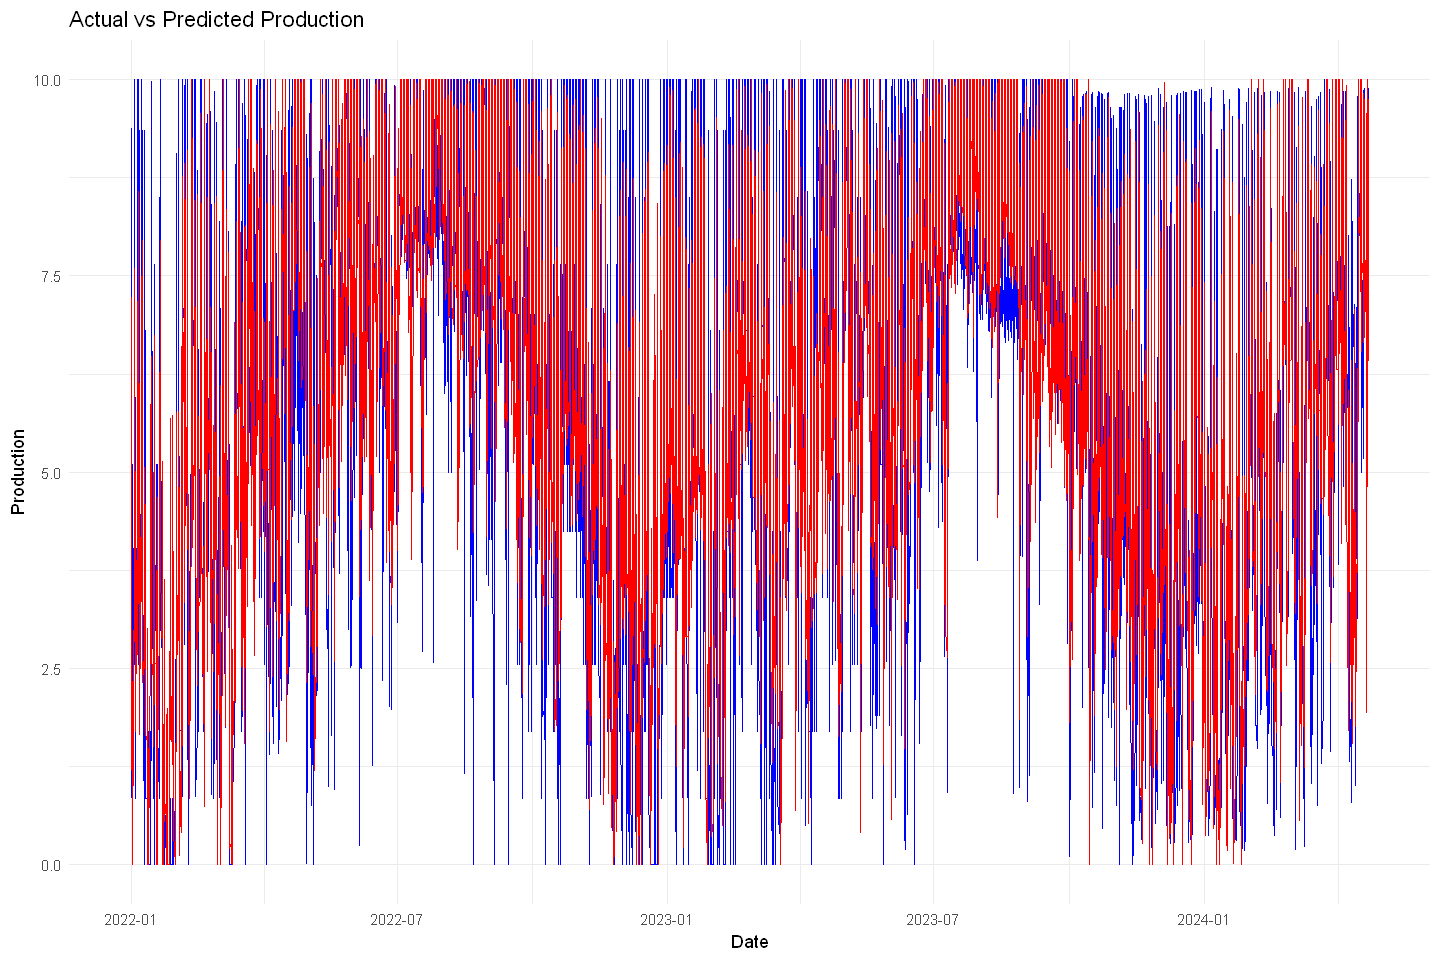

In [ ]:
# Predict the residuals using the decision tree
filtered_dt6[, predicted_tree := predict(fit_res_tree, filtered_dt6)]

# Combine predictions
filtered_dt6[, final_prediction := predicted_lm + predicted_tree]

# Replace negative predictions with zero
filtered_dt6[final_prediction < 0, final_prediction := 0]
filtered_dt6[final_prediction > 10, final_prediction := 10]

# Visualize combined predictions
ggplot(filtered_dt4) +
  geom_line(aes(x = date, y = production), color = 'blue') +
  geom_line(aes(x = date, y = final_prediction), color = 'red') +
  theme_minimal() +
  labs(title = "Actual vs Predicted Production", x = "Date", y = "Production")

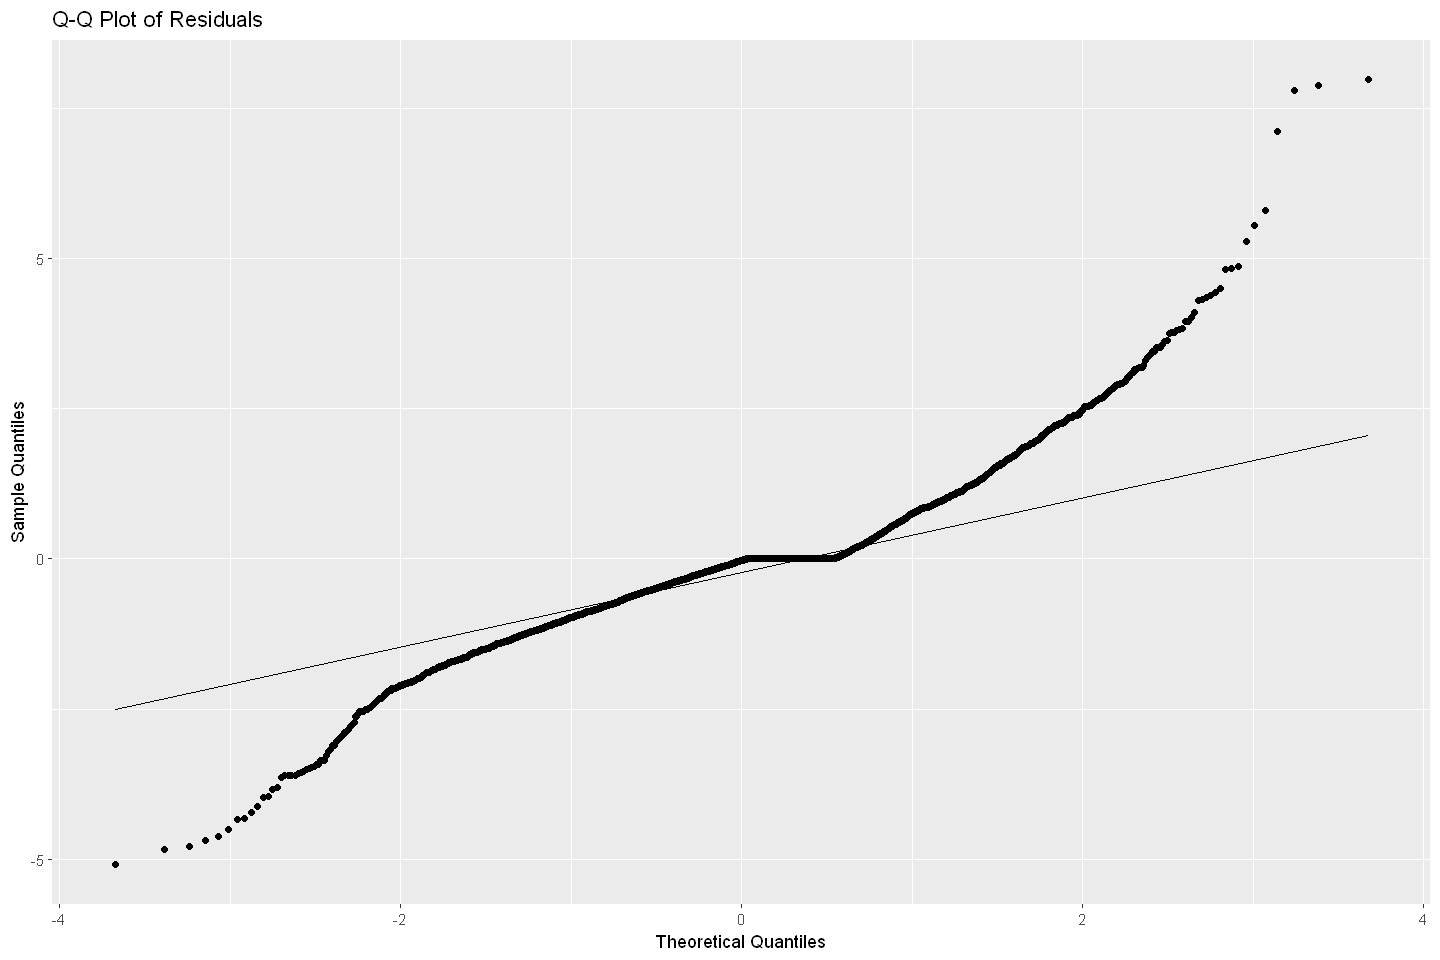

In [ ]:
actual <- filtered_dt6$production
prediction<- filtered_dt6$final_prediction

residuals <- actual - prediction

# Create a Q-Q plot
qq_plot <- ggplot(data = NULL, aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("Q-Q Plot of Residuals") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles")

# Display the plot
print(qq_plot)

# COMPARISON

In [ ]:
all_results %>% 
    data.table %>% 
    melt(c("date","actual")) %>% 
    as.data.table() %>% 
    .[,accu(actual,value),by=list(variable)]

In [ ]:
all_results %>% 
    data.table %>% 
    melt(c("date","actual")) %>% 
    as.data.table() %>% 
    .[,accu(actual,value),by=list(variable,date)] %>% 
        ggplot(aes(x=as.factor(variable), y=MAD)) + 
        geom_boxplot(fill="#c26ce7", alpha=0.2) +
        labs(title="Absolute deviations")

In [ ]:

 
all_residuals <- all_results %>% data.table %>% melt(c("date","actual")) %>% mutate(residual=actual-value) %>% rename(model=variable)

ggplot(all_residuals, aes(x = residual, y = model, fill = model)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") + 
  geom_vline(xintercept = 0) + labs(title = "Residual distributions of the models")